# Credit Card customers
#### Predict Churning customers


## 1.1 Deskripsi Tugas
BankChurners.csv adalah file yang berisi dataset dari sebuah bank yang memiliki pengguna sebesar 10127 orang. Pada dataset tersebut total memiliki 23 feature atau column, namun yang dapat dieksplorasi untuk dianalisis hanya ada 20 column.

### 1.1.1 Objective 

Manager suatu bank meminta untuk melakukan analisis terhadap data yang mereka punya untuk mengetahui kenapa member dari bank tersebut melakukan churned atau tidak melanjutkan layanan dari bank tersebut. Dengan melakukan analisis data manager bank tersebut berharap dapat melakukan perbaikan pada layanan mereka atau mengambil keputusan yang tepat sesuai data dan analisis yang telah dilakukan.

## 1.2 Prepare and Load Data
Install dan load packages tidyverse dan RColorBrewer. \
tidyverse untuk pengolahan data. \
treemap untuk melakukan chart pada treemap. \
RColorBrewer untuk color pallete. \
reshape2 untuk pengolahan data.


In [ ]:
install.packages("tidyverse")
install.packages("treemap")
install.packages("RColorBrewer")
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘data.table’, ‘gridBase’, ‘igraph’, ‘shiny’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [ ]:
library(tidyverse)
library(treemap)
library(RColorBrewer)
library(reshape2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




Load dan Removing column yang tidak digunakan pada Data dari GDRIVE ke variabel data

In [ ]:
# https://drive.google.com/file/d/1t8ZXk7RNp1PYgwhYBNkVwMPmWVdM2-Xf
system("gdown --id 1t8ZXk7RNp1PYgwhYBNkVwMPmWVdM2-Xf")
data <- read.csv("BankChurners.csv")
data <- select(data, -c("CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"))

Melihat head pada data dengan 1 baris saja. \
Dan mengambil jumlah row untuk digunakan selanjutnya kedalam variabel jmlRow.

In [ ]:
head(data, 1)
jmlRow <- nrow(data)
jmlRow

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691,777,11914,1.335,1144,42,1.625,0.061


[1] 10127

Melakukan resize plot dengan options.\
Dan mengambil color pallete untuk chart dari brewer. Menggunakan kategori pallete 'Paired'

In [ ]:
resizePlot <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

In [ ]:
# resize the plot
resizePlot(15,6)

[1] "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99" "#E31A1C" "#FDBF6F"
 [8] "#FF7F00" "#CAB2D6" "#6A3D9A" "#FFFF99" "#B15928"

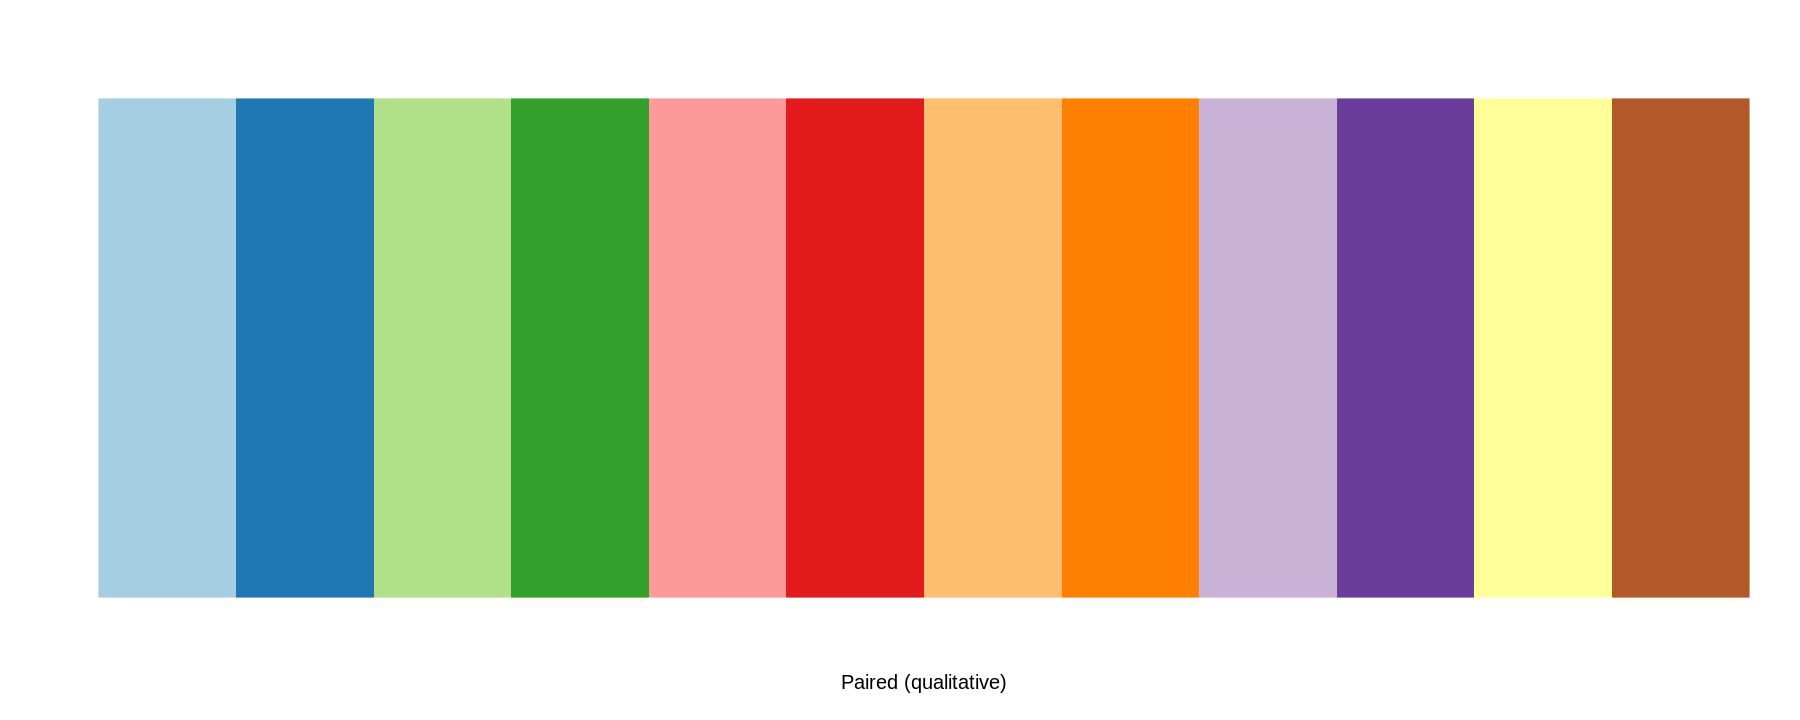

In [ ]:
# color palettes for chart
display.brewer.pal(n = 12, name = 'Paired')
theColors <- brewer.pal(n = 12, name = 'Paired')
theColors

## 1.3 Metode Visualisasi atau Eksplorasi
Metode yang kami gunakan dalam eksplorasi kali ini adalah sebagai berikut:
1. Pie Chart
2. Bar Chart
3. Boxplot
4. Histogram
5. Heatmap
6. Treemap
7. Density Chart

## 2.1 Eksplorasi tiap columnnya

[1] "Attrited Customer" "Existing Customer"


Attrited Customer Existing Customer 
             1627              8500 

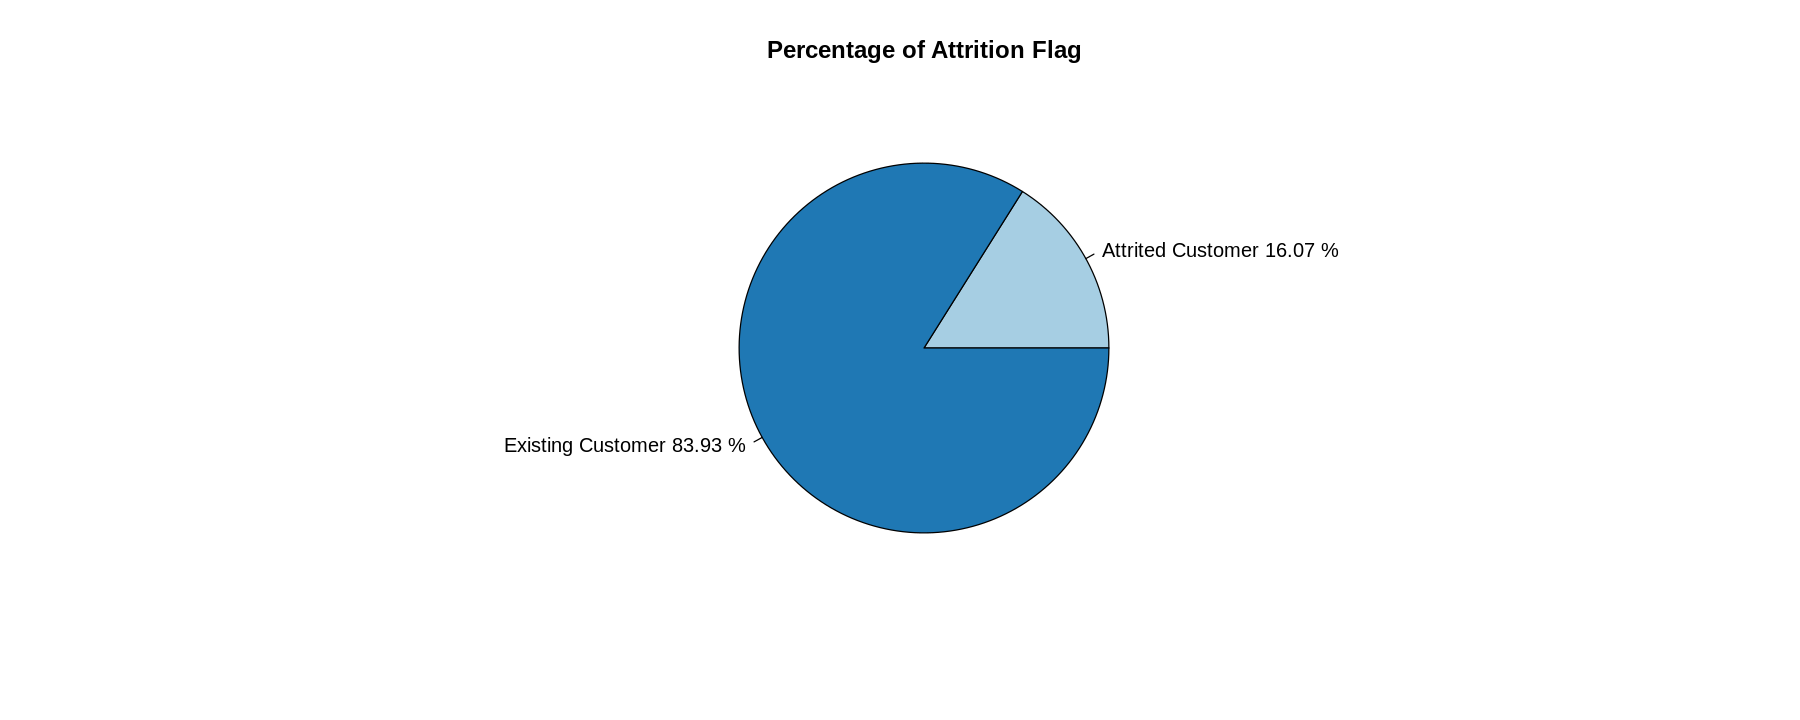

In [15]:
theVariable <- names(table(data$Attrition_Flag))
theVariable
amount <- table(data$Attrition_Flag)
amount
numbers <- round(amount/jmlRow, digits = 4)*100
theLabels <- paste(theVariable, numbers, '%')
pie(amount, labels = theLabels, col= theColors, main = 'Percentage of Attrition Flag')

Terlihat bahwa Attrited Customer/Customer yang churn terdapat 1627(16.07%) sedang Existing Customer terdapat 8500(83.93%). 

[1] "F" "M"


   F    M 
5358 4769 

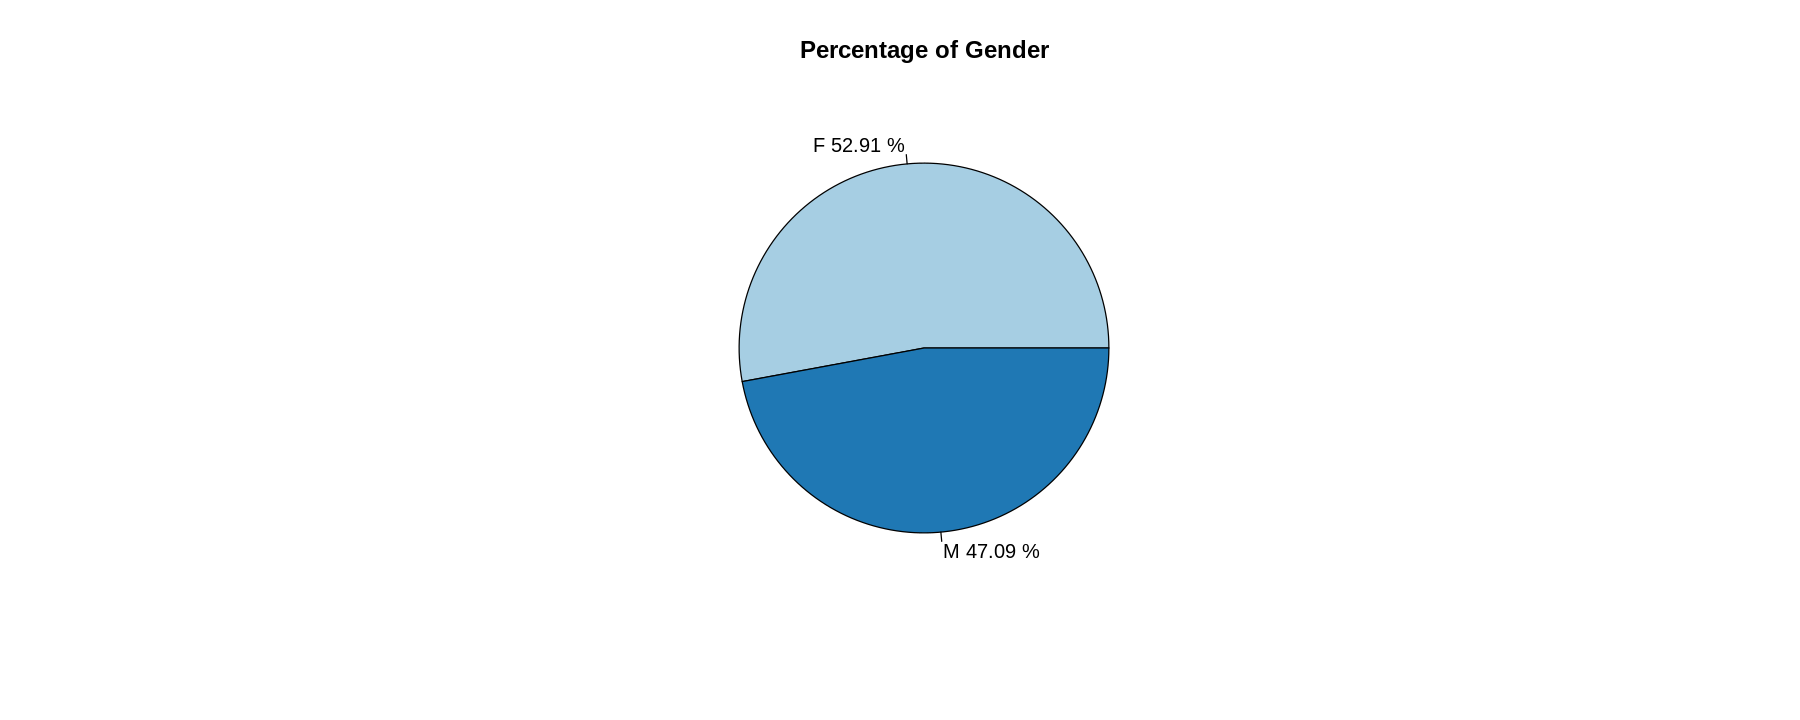

In [16]:
theVariable <- names(table(data$Gender))
theVariable
amount <- table(data$Gender)
amount
numbers <- round(amount/jmlRow, digits = 4)*100
theLabels <- paste(theVariable, numbers, '%')
pie(amount, labels = theLabels, col= theColors, main = 'Percentage of Gender')

Terlihat dari Chart bahwa jumlah dari pengguna yang berkeliman Perempuan(F) adalah 5358 dengan persentase 52.91%, sedangkan Laki-laki(M) adalah 4769 dengan persentase 47.09%

Kategori yang ada di column Education Level sbb:

[1] "College"       "Doctorate"     "Graduate"      "High School"  
[5] "Post-Graduate" "Uneducated"    "Unknown"


Jumlah masing-masing kategori


      College     Doctorate      Graduate   High School Post-Graduate 
         1013           451          3128          2013           516 
   Uneducated       Unknown 
         1487          1519 

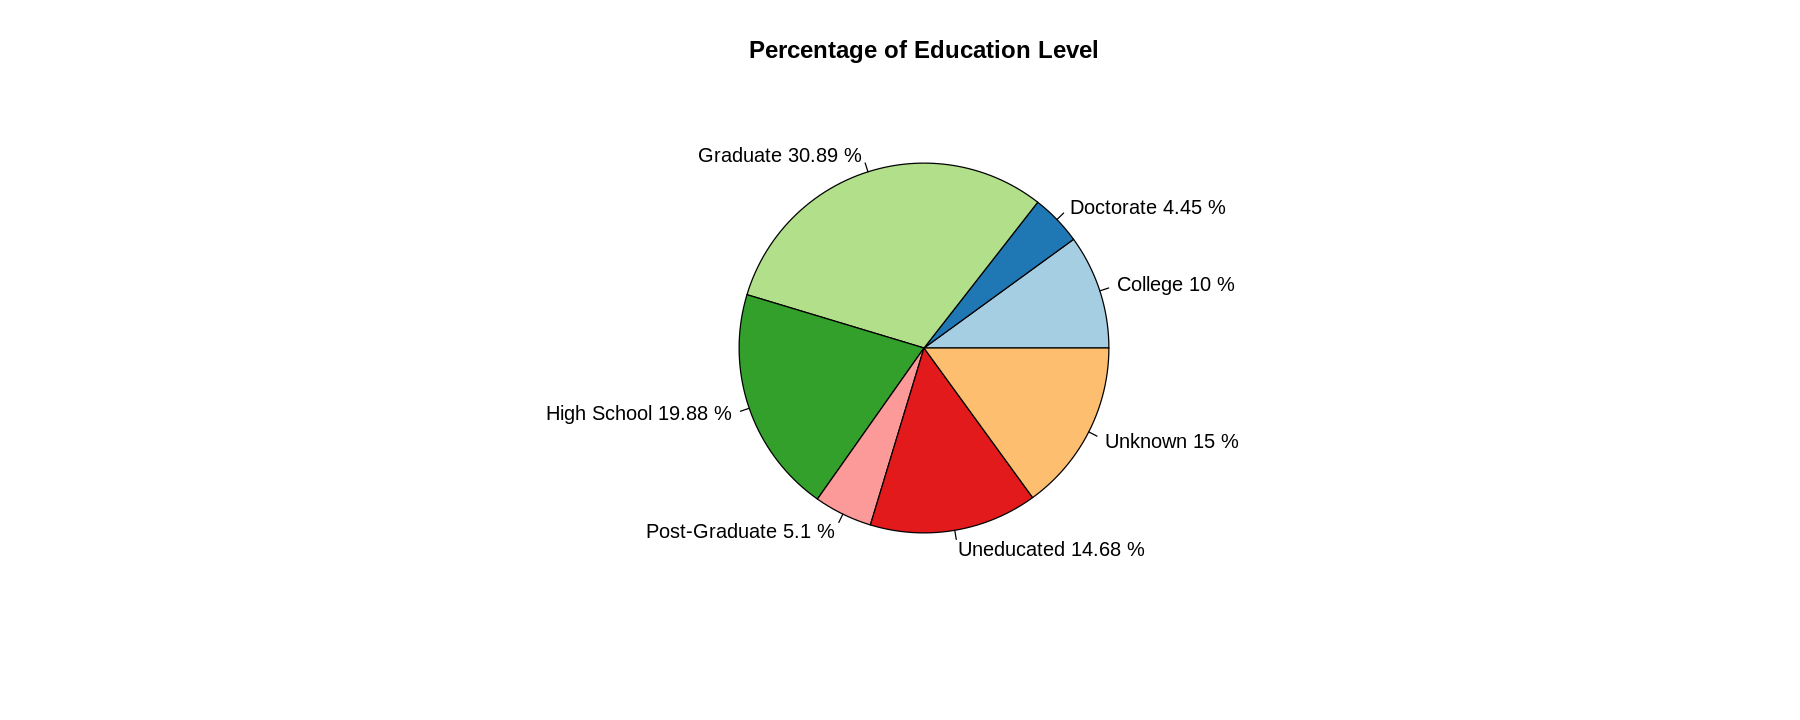

In [17]:
theVariable <- names(table(data$Education_Level))
cat("Kategori yang ada di column Education Level sbb:")
theVariable
amount <- table(data$Education_Level)
cat("\n")
cat("Jumlah masing-masing kategori")
amount
numbers <- round(amount/jmlRow, digits = 4)*100
theLabels <- paste(theVariable, numbers, '%')
pie(amount, labels = theLabels, col= theColors, main = 'Percentage of Education Level')

Jika dilihat dari columnnya terlihat bahwa education levelnya terdiri dari 7 kategori dengan jumlah dan persentase seperti diatas. Dan hampir 70% member mendapatkan pedidikan formal.

Kategori yang ada di column Income Category sbb:

[1] "$120K +"        "$40K - $60K"    "$60K - $80K"    "$80K - $120K"  
[5] "Less than $40K" "Unknown"


Jumlah masing-masing kategori


       $120K +    $40K - $60K    $60K - $80K   $80K - $120K Less than $40K 
           727           1790           1402           1535           3561 
       Unknown 
          1112 

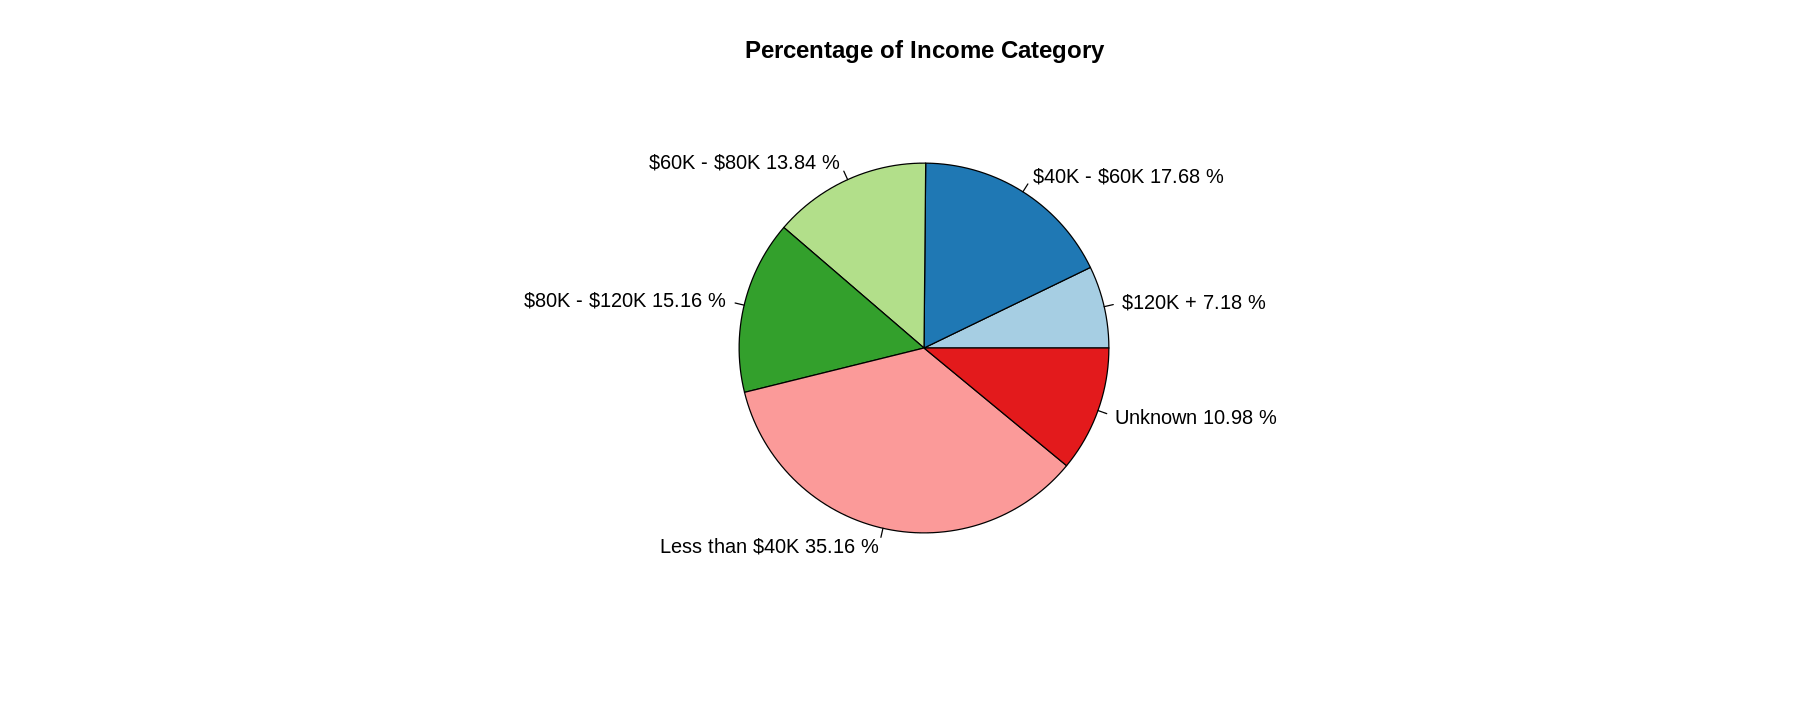

In [18]:
theVariable <- names(table(data$Income_Category))
cat("Kategori yang ada di column Income Category sbb:")
theVariable
amount <- table(data$Income_Category)
cat("\n")
cat("Jumlah masing-masing kategori")
amount
numbers <- round(amount/jmlRow, digits = 4)*100
theLabels <- paste(theVariable, numbers, '%')
pie(amount, labels = theLabels, col= theColors, main = 'Percentage of Income Category')

Pada column Income Category terdapat 6 kategori dengan karakteristik seperti diatas. Dan yang terbanyak adalah pada kategori Less than $40k.

Kategori yang ada di column Card Category sbb:

[1] "Blue"     "Gold"     "Platinum" "Silver"


Jumlah masing-masing kategori


    Blue     Gold Platinum   Silver 
    9436      116       20      555 


Karena Persentase pada chart tidak terlalu jelas, berikut persentase pada masing-masing kategori

[1] "Blue 93.18 %"   "Gold 1.15 %"    "Platinum 0.2 %" "Silver 5.48 %"

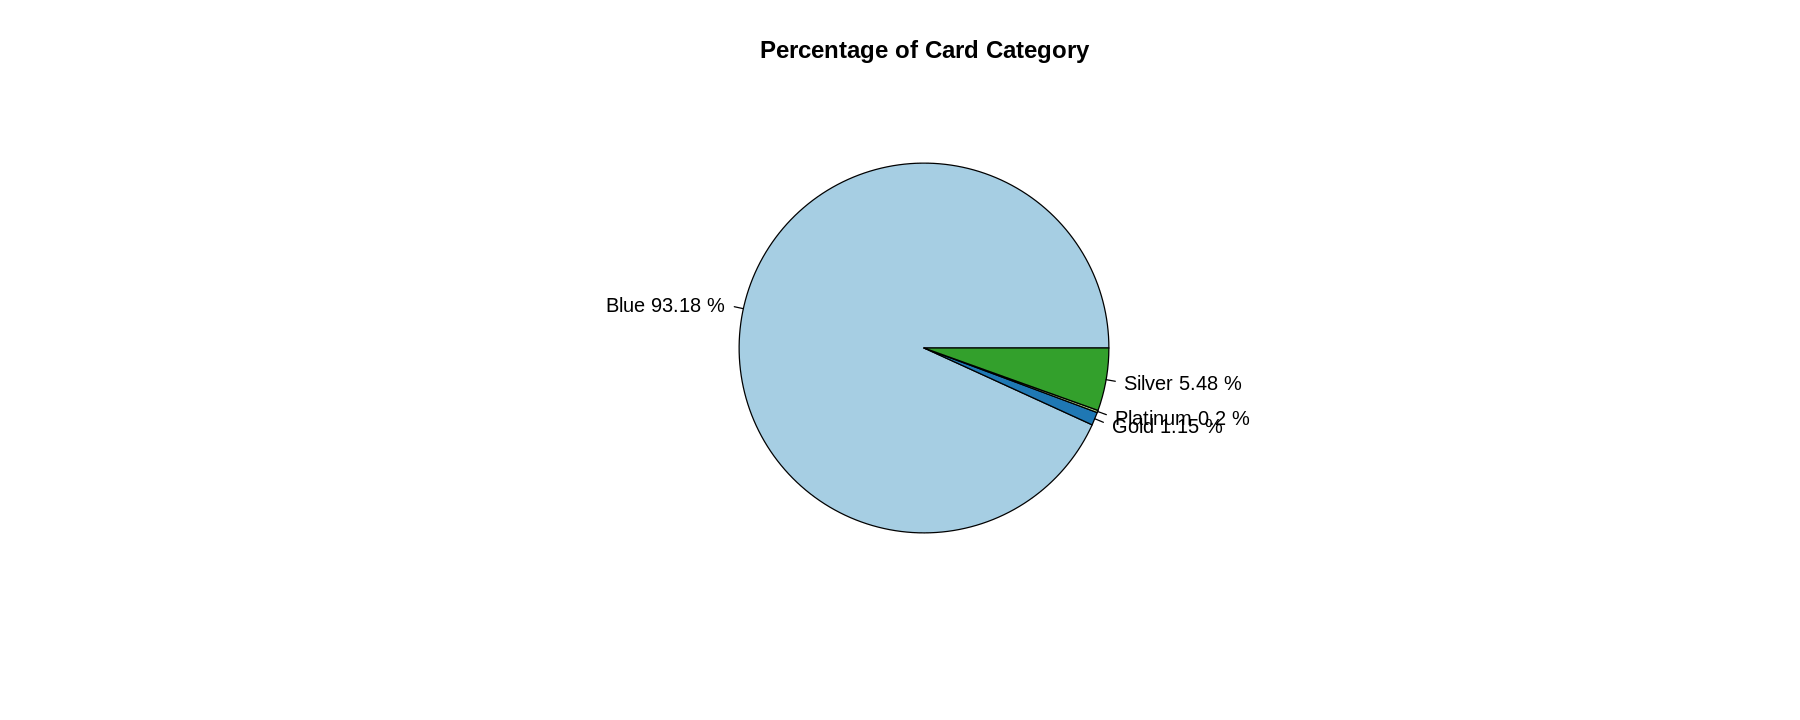

In [19]:
theVariable <- names(table(data$Card_Category))
cat("Kategori yang ada di column Card Category sbb:")
theVariable
amount <- table(data$Card_Category)
cat("\n")
cat("Jumlah masing-masing kategori")
amount
numbers <- round(amount/jmlRow, digits = 4)*100
theLabels <- paste(theVariable, numbers, '%')
cat("\n")
cat("Karena Persentase pada chart tidak terlalu jelas, berikut persentase pada masing-masing kategori")
theLabels
pie(amount, labels = theLabels, col= theColors, main = 'Percentage of Card Category')

Terlihat pada chart diatas bahwa member pada bank tersebut kebanyakan menggunakan kategori Blue Card. Dan member yang paling sedikit adalah member platinum.

Kategori yang ada di column Dependent count sbb:

[1] "0" "1" "2" "3" "4" "5"


Jumlah masing-masing kategori


   0    1    2    3    4    5 
 904 1838 2655 2732 1574  424 

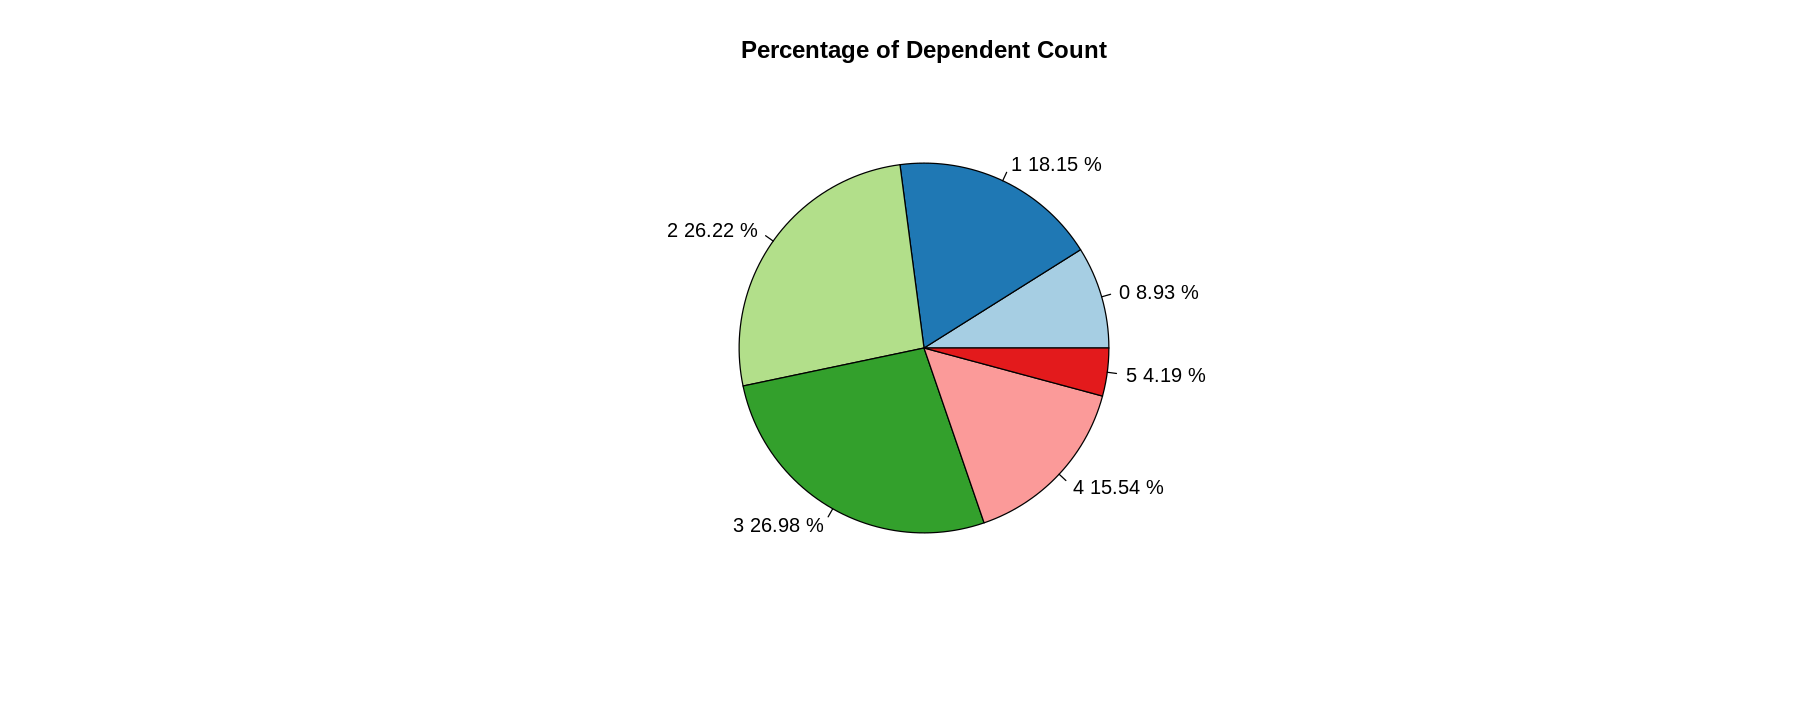

In [20]:
theVariable <- names(table(data$Dependent_count))
cat("Kategori yang ada di column Dependent count sbb:")
theVariable
amount <- table(data$Dependent_count)
cat("\n")
cat("Jumlah masing-masing kategori")
amount
numbers <- round(amount/jmlRow, digits = 4)*100
theLabels <- paste(theVariable, numbers, '%')
pie(amount, labels = theLabels, col= theColors, main = 'Percentage of Dependent Count')

Depedent Count adalah banyaknya anggota keluarga yang ditanggung. Terlihat bahwa terbanyak adalah 3 dan 2 anggota keluarga dengan sebanyak secara terutur 2732 dan 2655 member pada bank tersebut.

Kategori yang ada di column Dependent count sbb:

[1] "Divorced" "Married"  "Single"   "Unknown"


Jumlah masing-masing kategori


Divorced  Married   Single  Unknown 
     748     4687     3943      749 

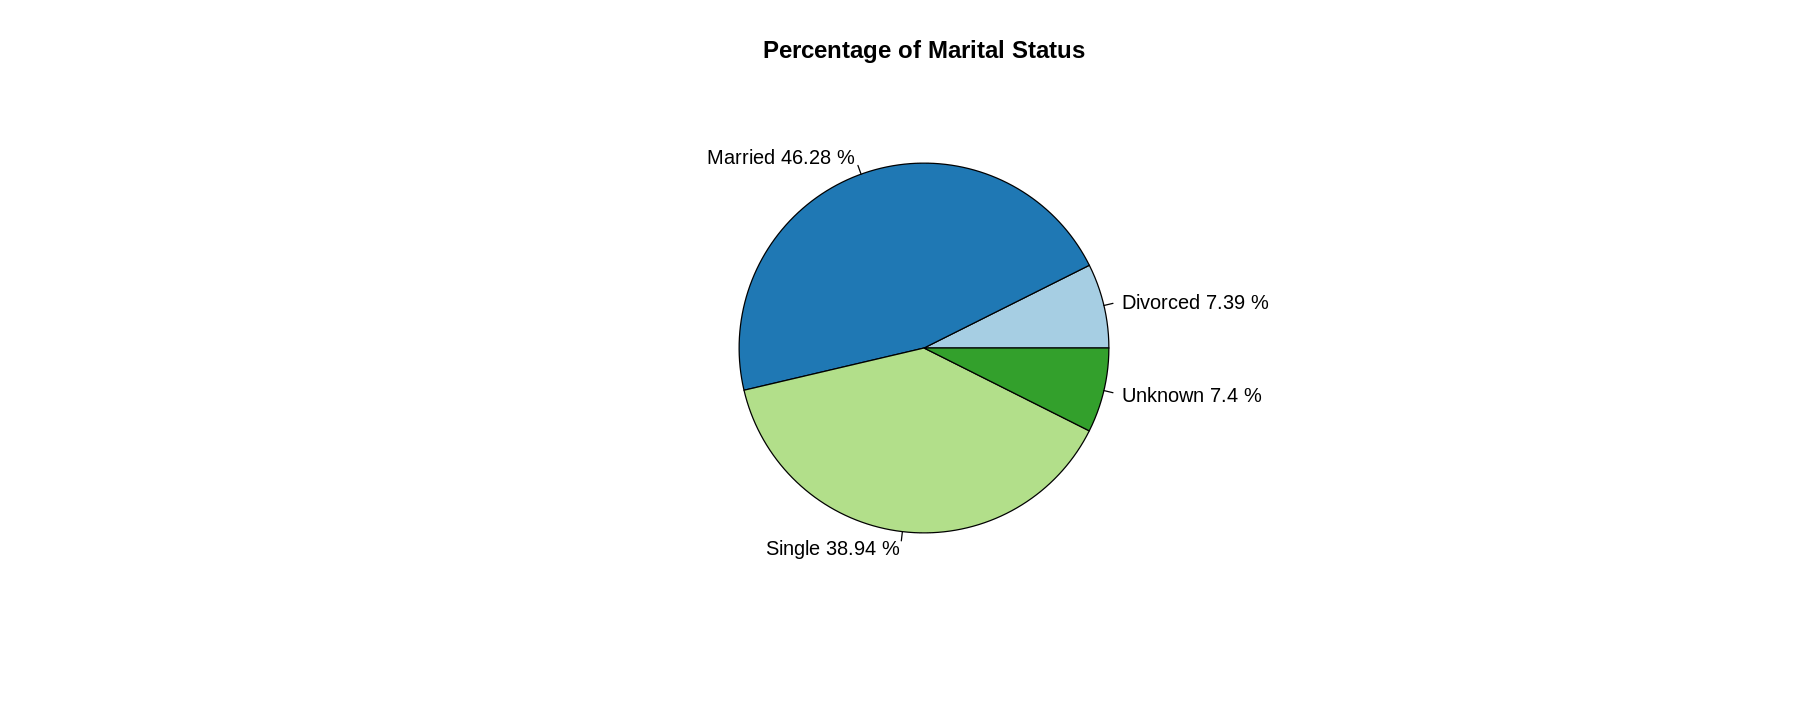

In [21]:
theVariable <- names(table(data$Marital_Status))
cat("Kategori yang ada di column Dependent count sbb:")
theVariable
amount <- table(data$Marital_Status)
cat("\n")
cat("Jumlah masing-masing kategori")
amount
numbers <- round(amount/jmlRow, digits = 4)*100
theLabels <- paste(theVariable, numbers, '%')
pie(amount, labels = theLabels, col= theColors, main = 'Percentage of Marital Status')

Terlihat bahwa Married dan Single adalah top 2 yang terbanyak, Married adalah yang terbanyak dengan 4687 member pada bank tersebut.

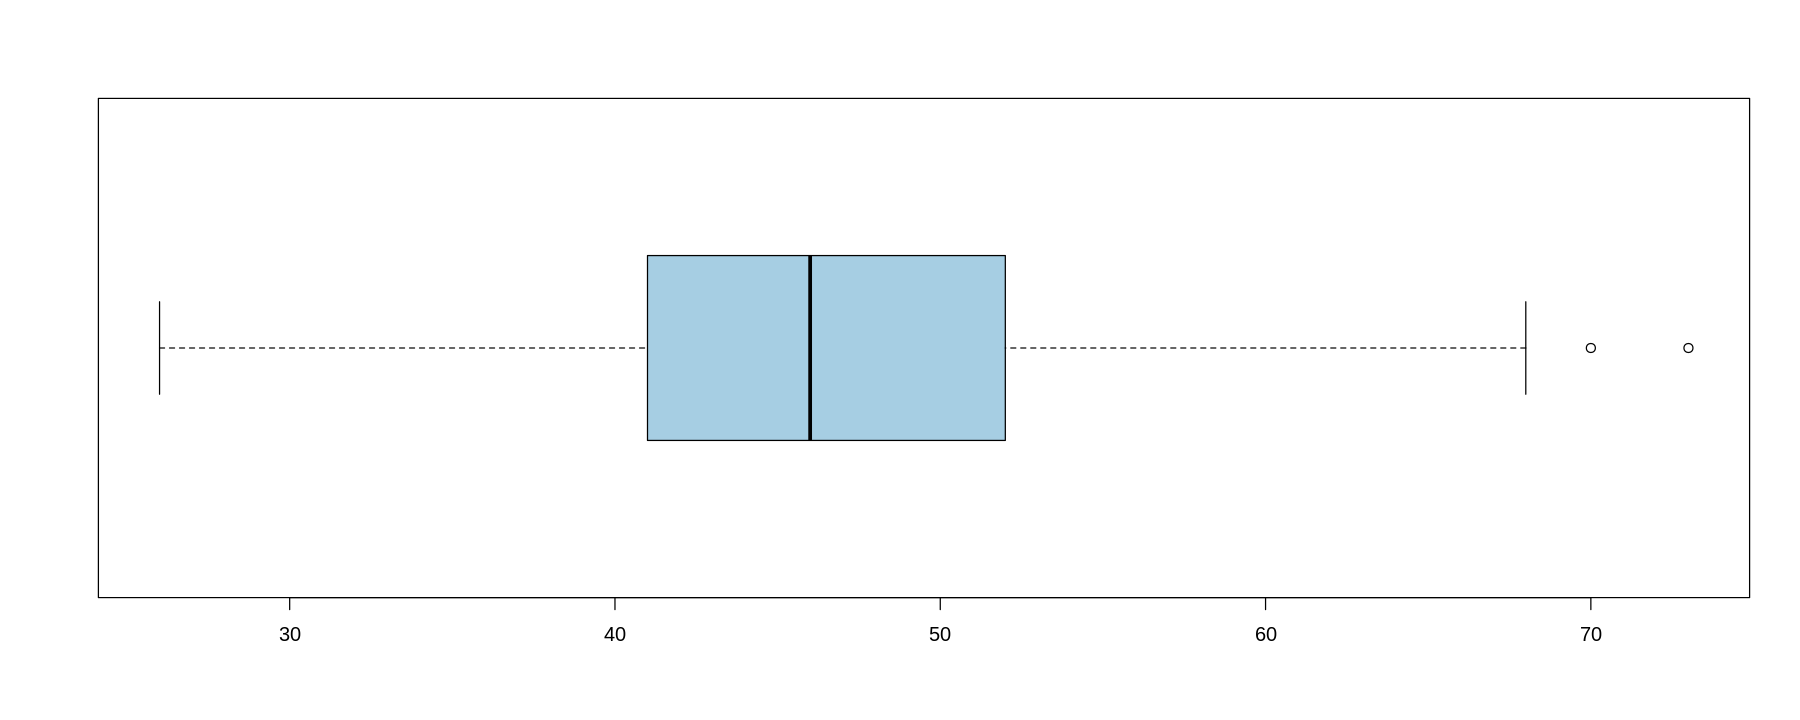

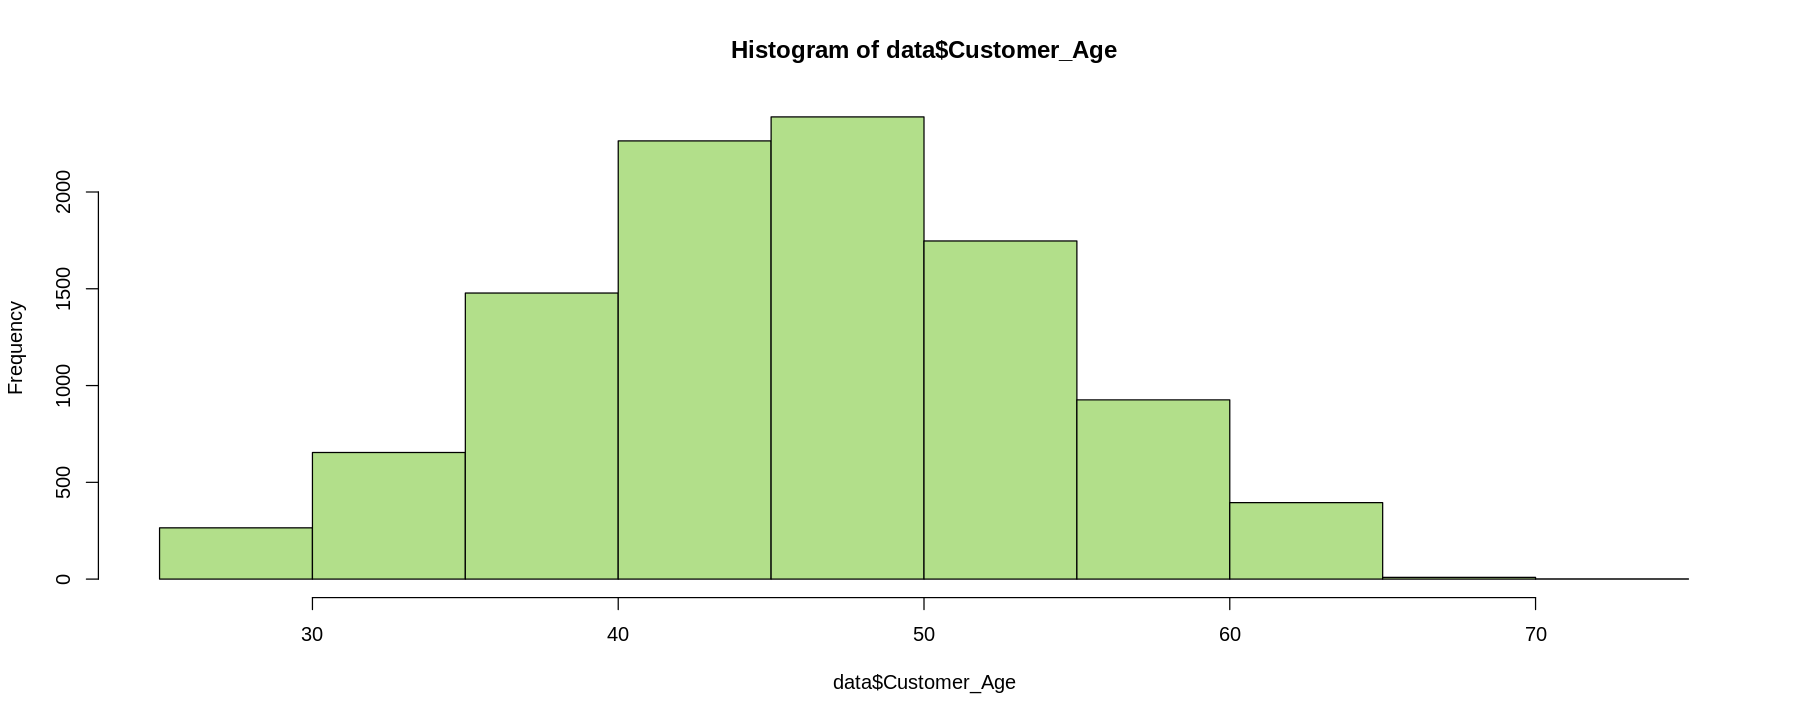

In [22]:
boxplot(data$Customer_Age, horizontal=TRUE, col= theColors)
hist(data$Customer_Age, col=theColors[3])

Terdapat chart boxplot dan histogram yang menggambar karakteristik Customer Age, dengan tipe histogramnya adalah distribusi normal dengan bentuk loncek hampir sempurna, dan pada boxplot terdapat pencilan pada nilai tertingginya.

Mediannya

[1] 36

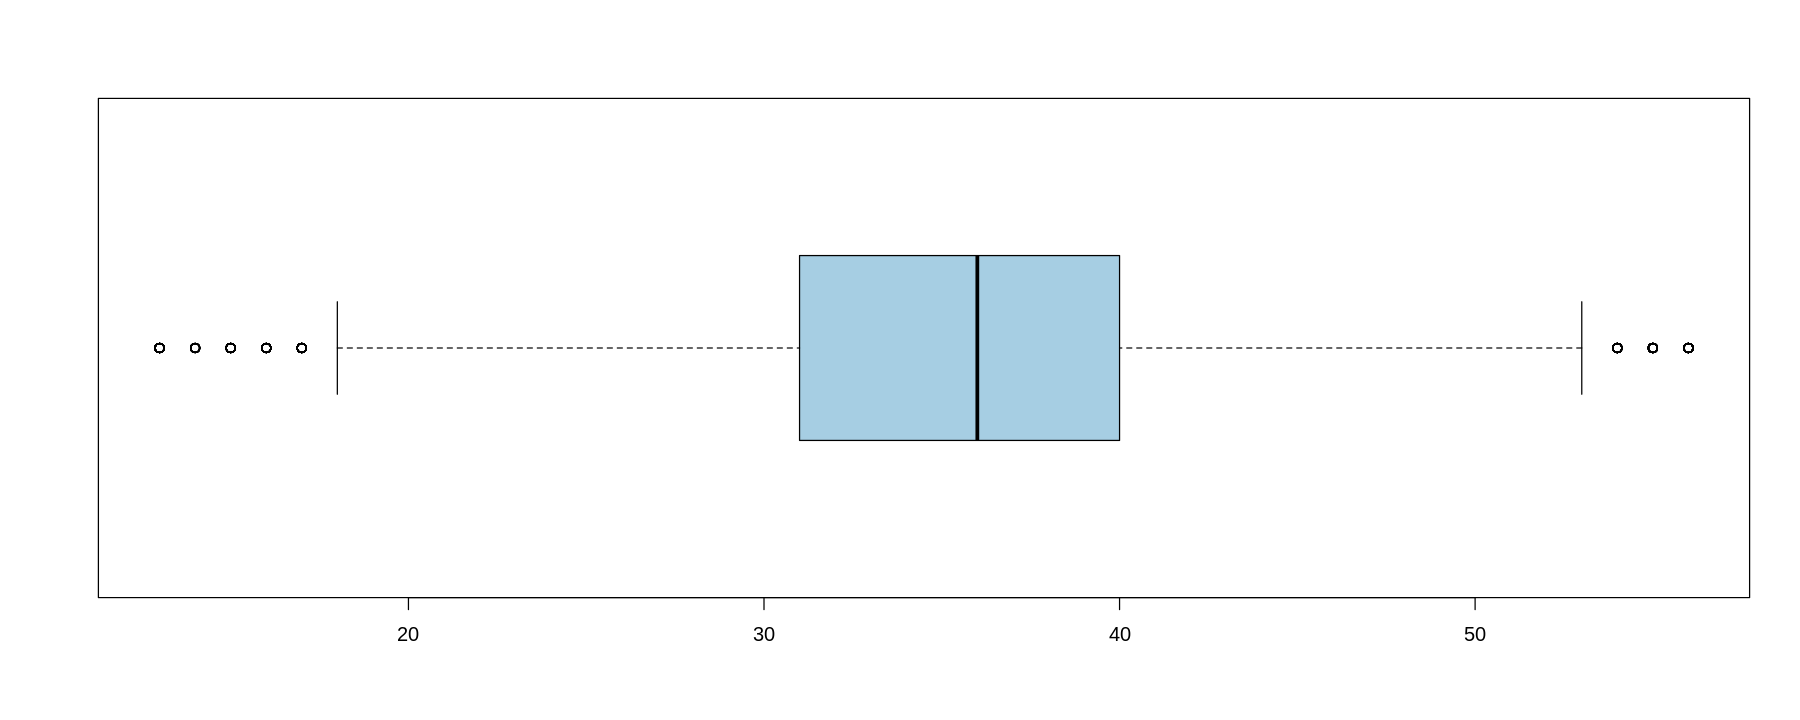

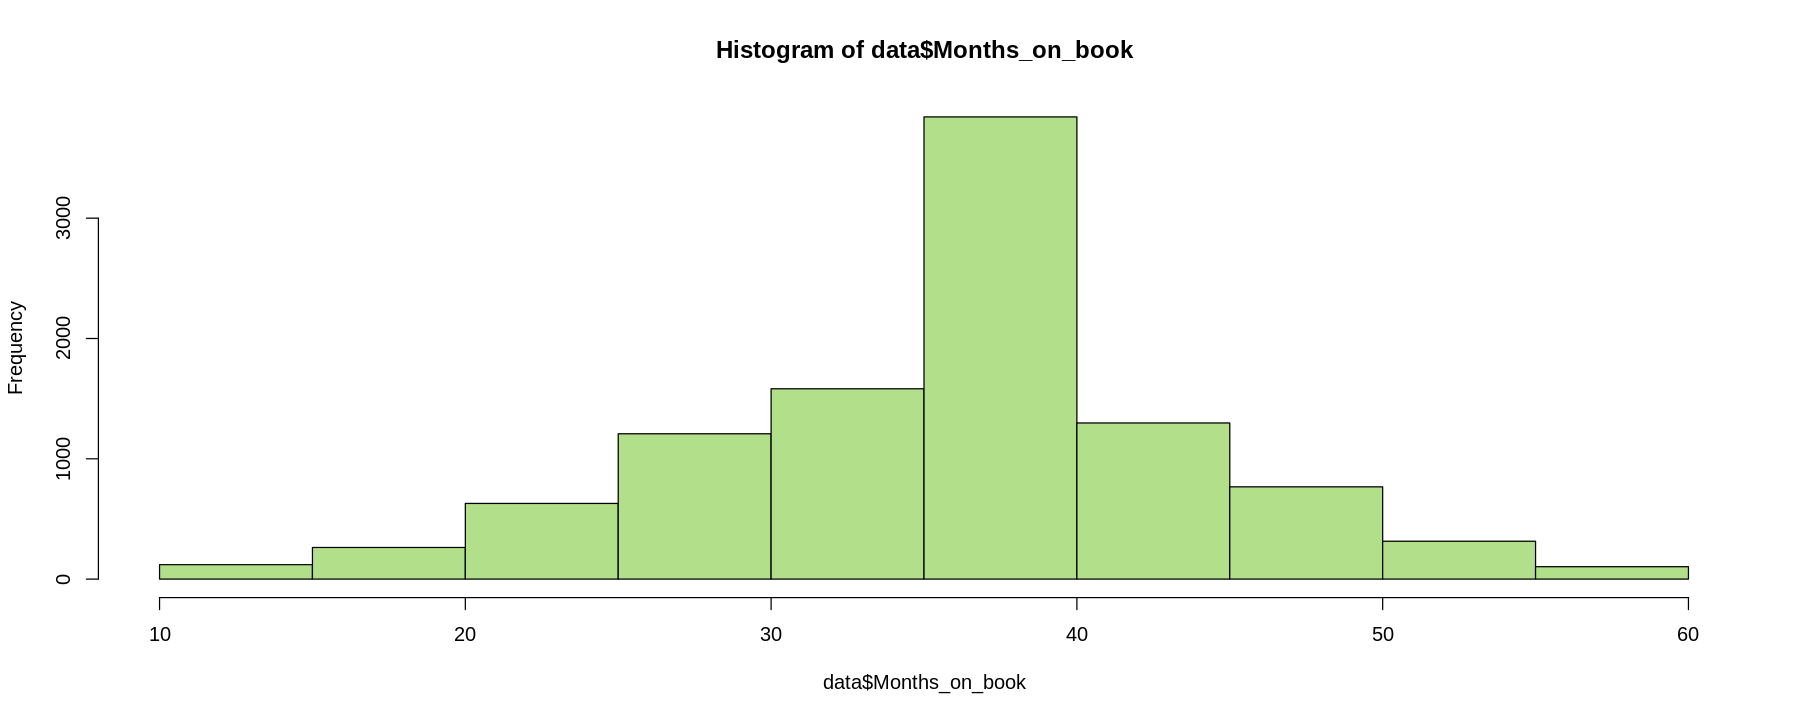

In [ ]:
cat("Mediannya")
median(data$Months_on_book)
boxplot(data$Months_on_book, horizontal = TRUE, col= theColors)
hist(data$Months_on_book, col=theColors[3])

Terlihat bentuk histogramnya hampir distribusi normal sempurna dengan kemiringan ke kanan. Jika dilihat dari boxplitnya column Months_on_book memiliki outlier dan nilai ekstrem di nilai tertinggi dan terendah. Dendgan mediannya adalah 36 bulan.

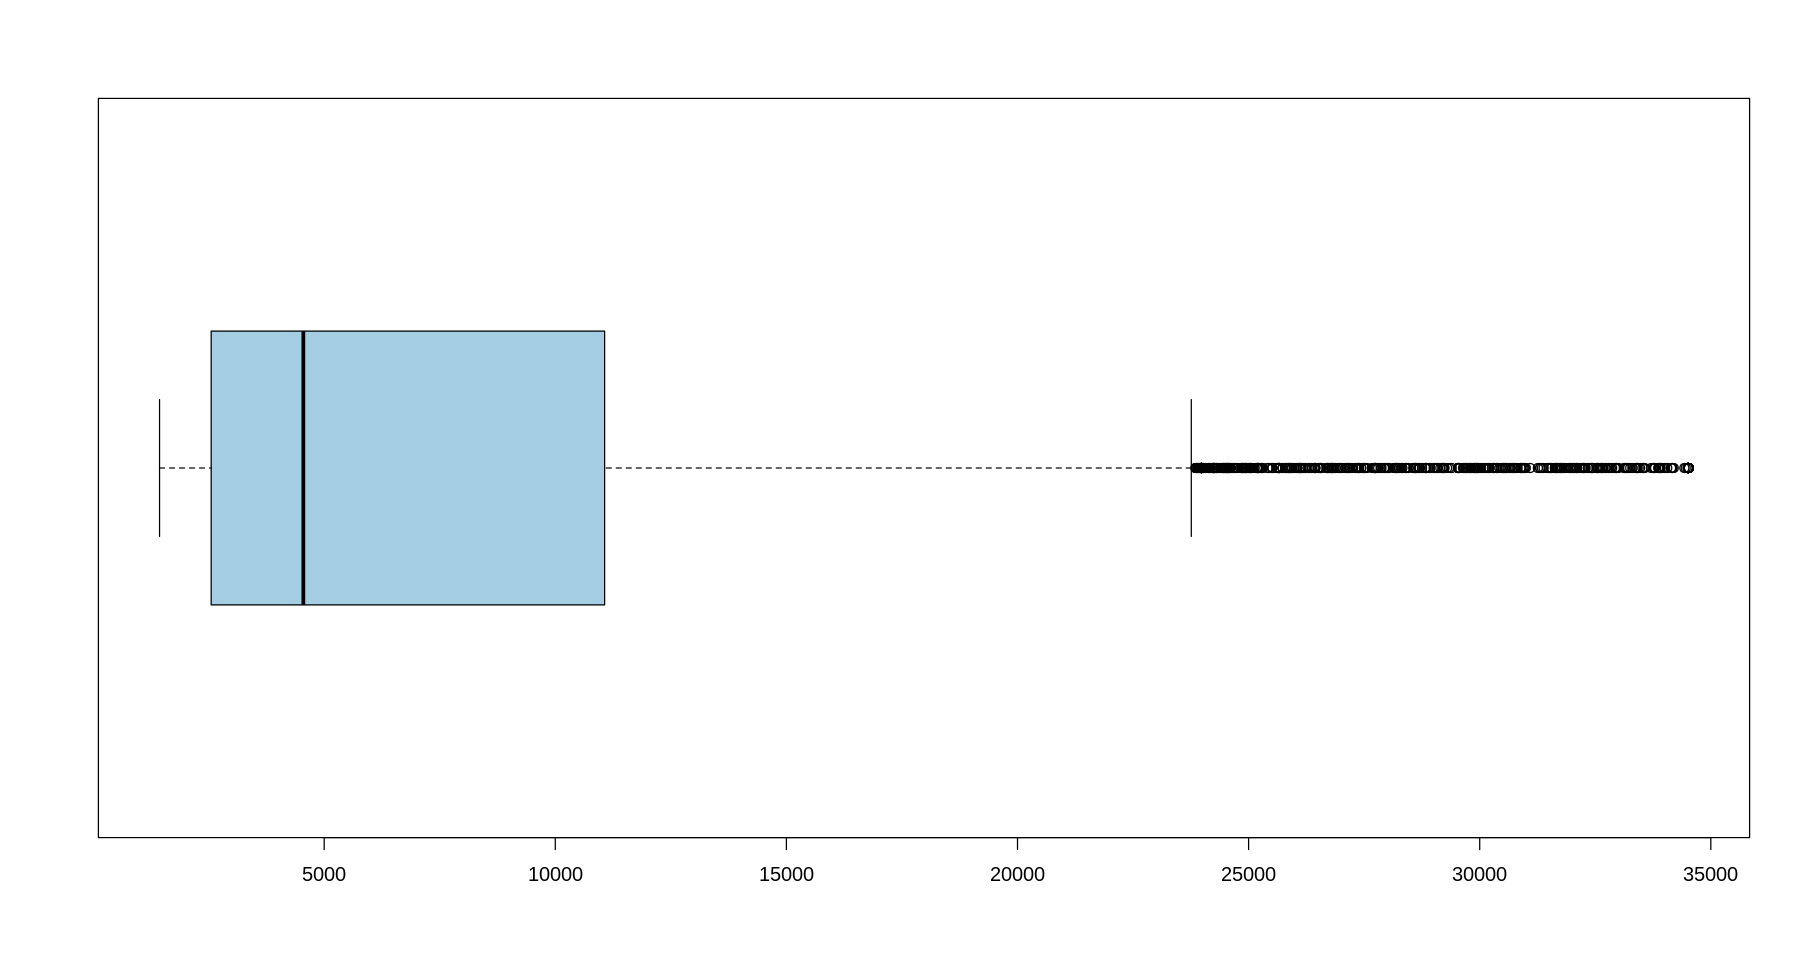

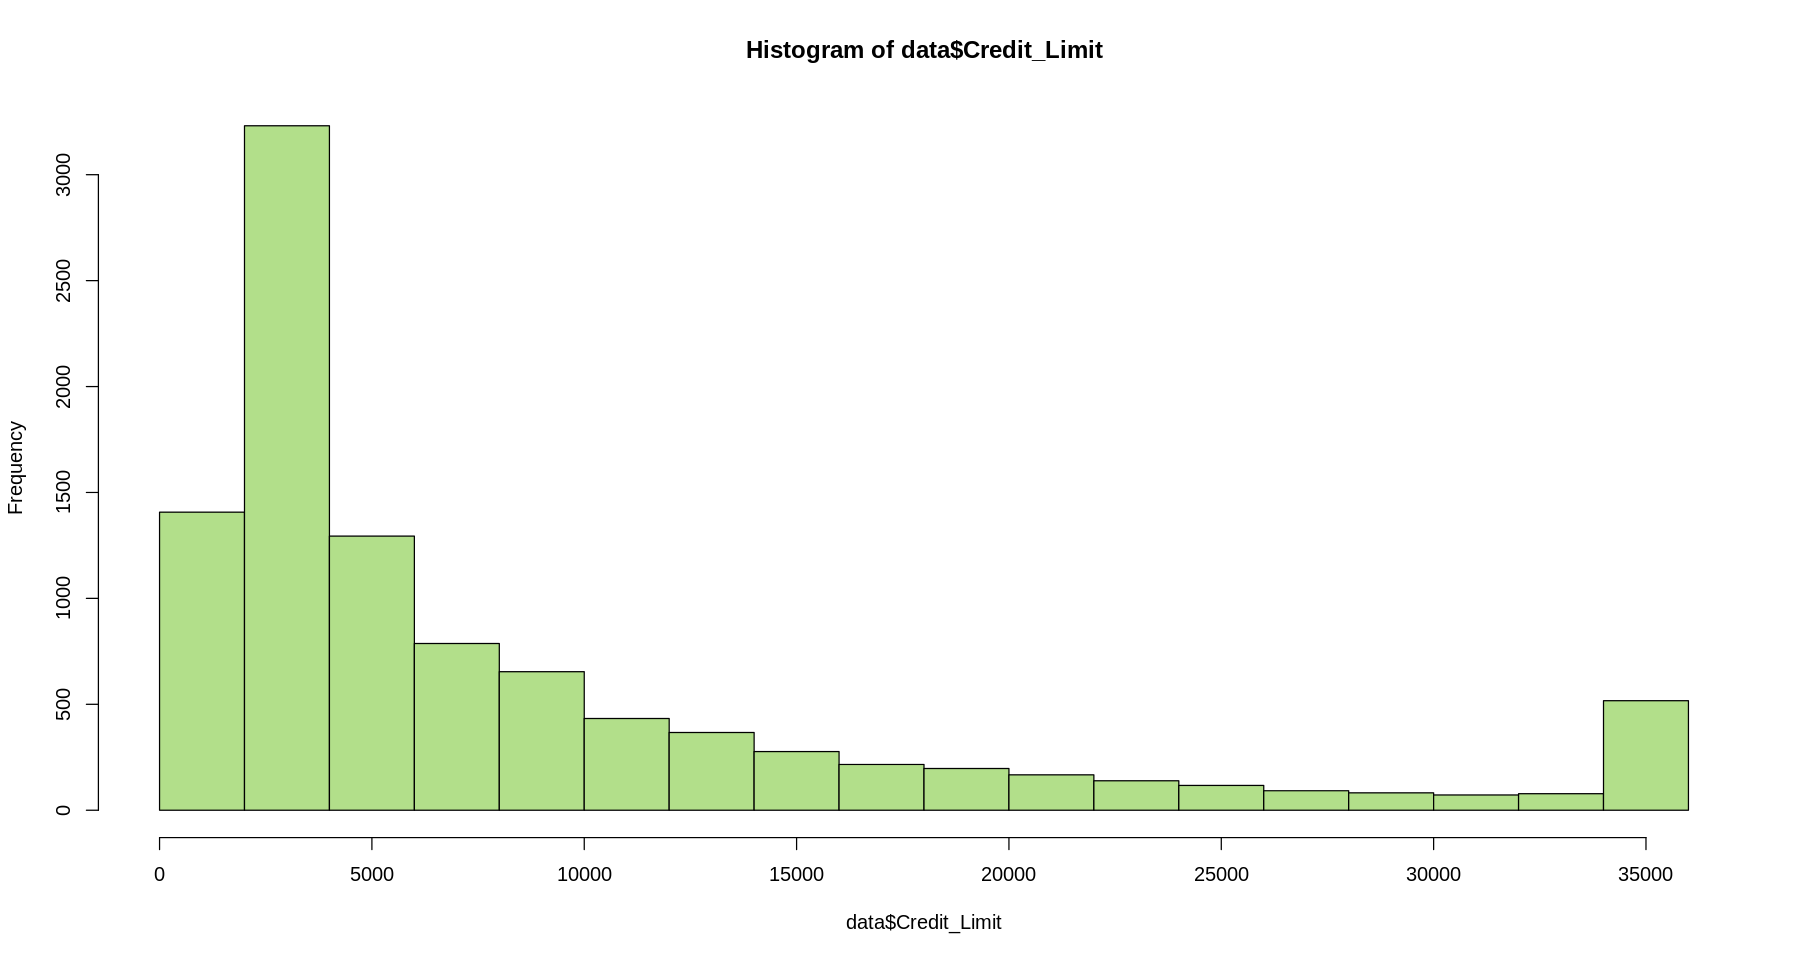

In [ ]:
boxplot(data$Credit_Limit, horizontal=TRUE, col= theColors)
hist(data$Credit_Limit, col=theColors[3])

Dilihat dari histogram terlihat bahwa bentuk grafik histogramnya miring/curam ke arah kiri, dan hampir memiliki dua puncak yang berada di nilai tertingginya. Jika dilihat dari boxplot terlihat sekali bahwa column Credit_Limit ini memiliki pencilan/outlier yang sangat banyak di sebelah kanan atau pada nilai tertinggi diatas 25000 dollar atau bisa dibilang boxplotnya cenderung menjulur ke arah kanan(positive/right skewness).

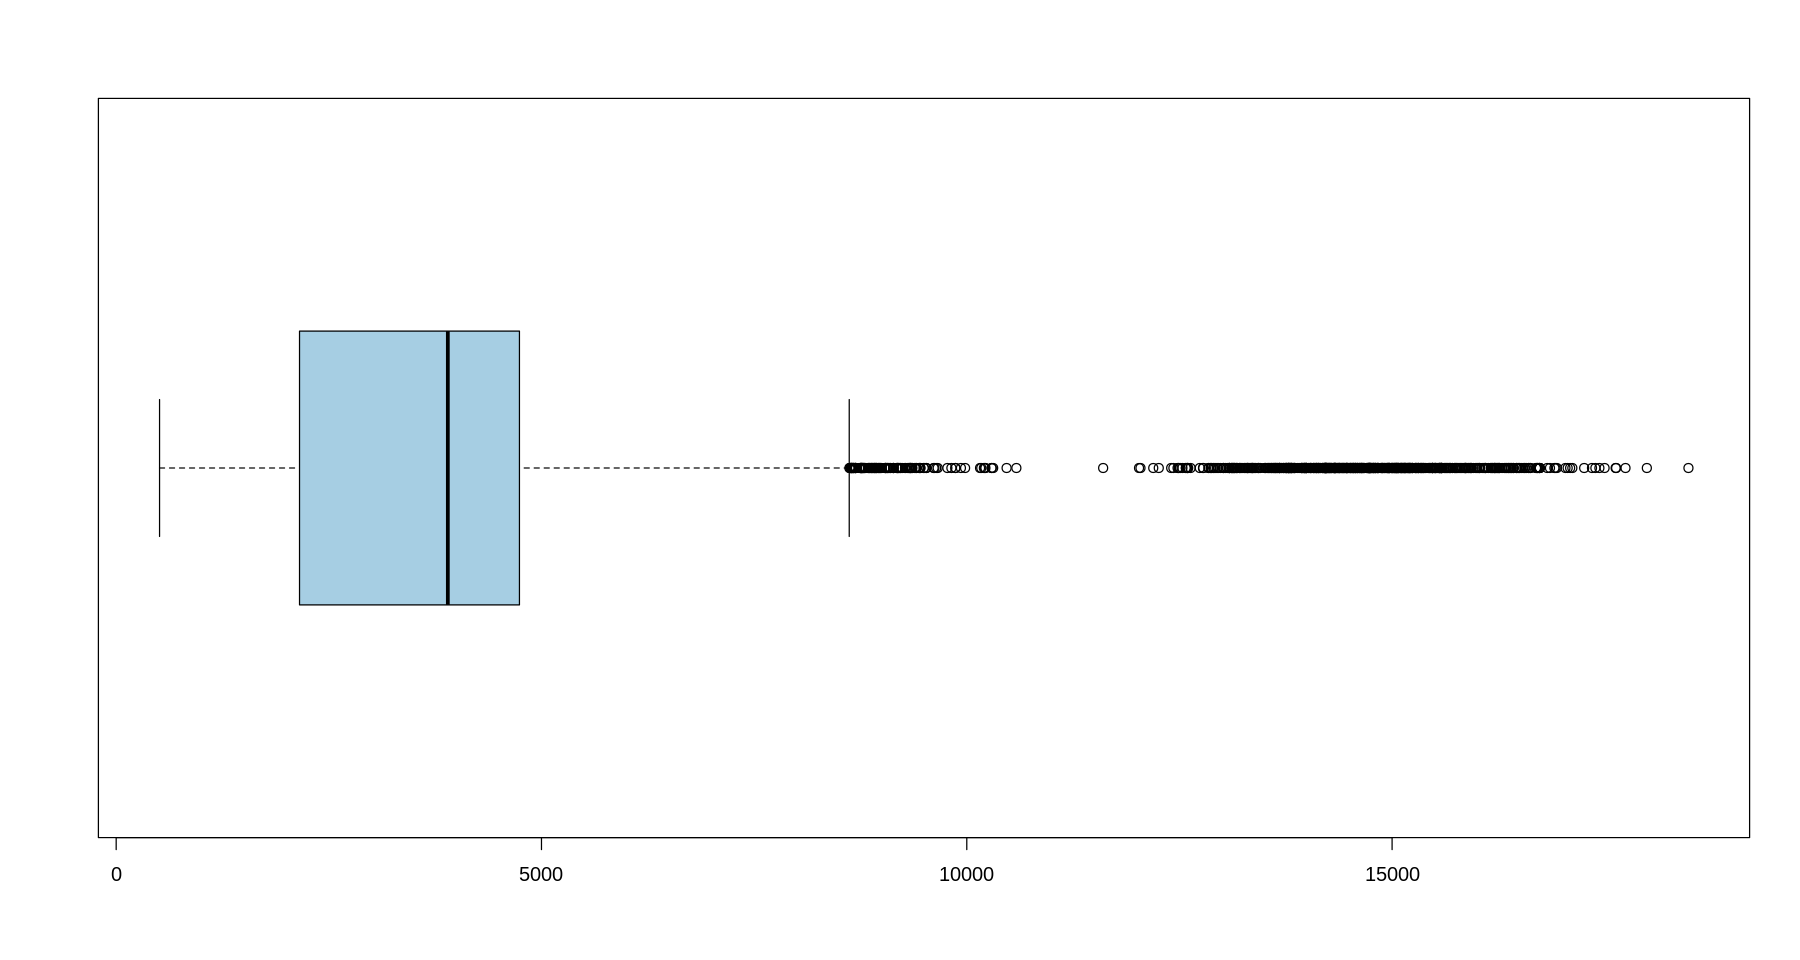

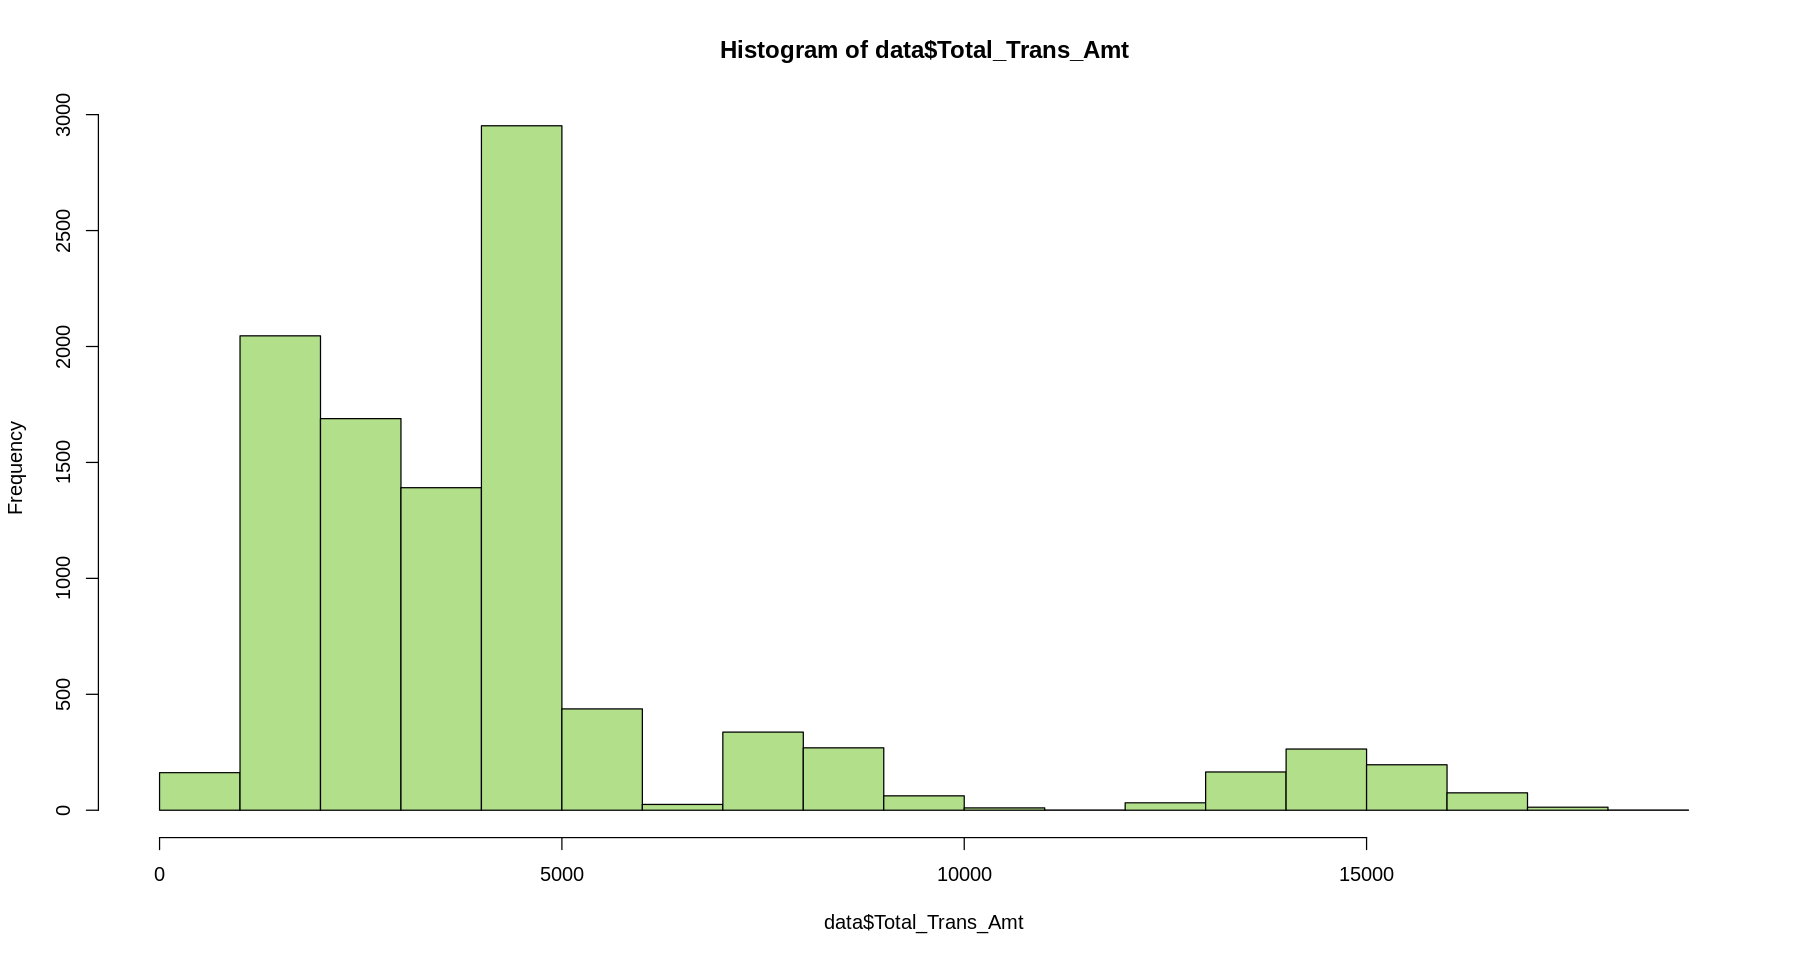

In [ ]:
boxplot(data$Total_Trans_Amt, horizontal=TRUE, col= theColors)
hist(data$Total_Trans_Amt, col=theColors[3])

Pada histogram terlihat bahwa seperti di atas hampir memiliki 2 puncak atau bisa dibilang hampir bimodal, tetapi yang pasti histogram dan boxplot diatas menunjukkan hampir semua pengguna melakukan total transfer amountnya dibawah 5000 dollar. Jika dilihat dari boxplotnya terlihat bahwa memiliki outlier yang menumpuk dititik tertentu yaitu pada 10.000 dollar hingga nilai tertingginya, dan juga seperti pada Credit_Limit bahwa boxplotnya cenderung menjulur ke kanan atau right skewness.

## 2.2 Heatmap Data

Sebelum memulai mengeksplorasi lebih jauh, kita cari correlation yang sangat erat dengan Churned atau tidaknya pelanggan dengan column lainnya yang ada.

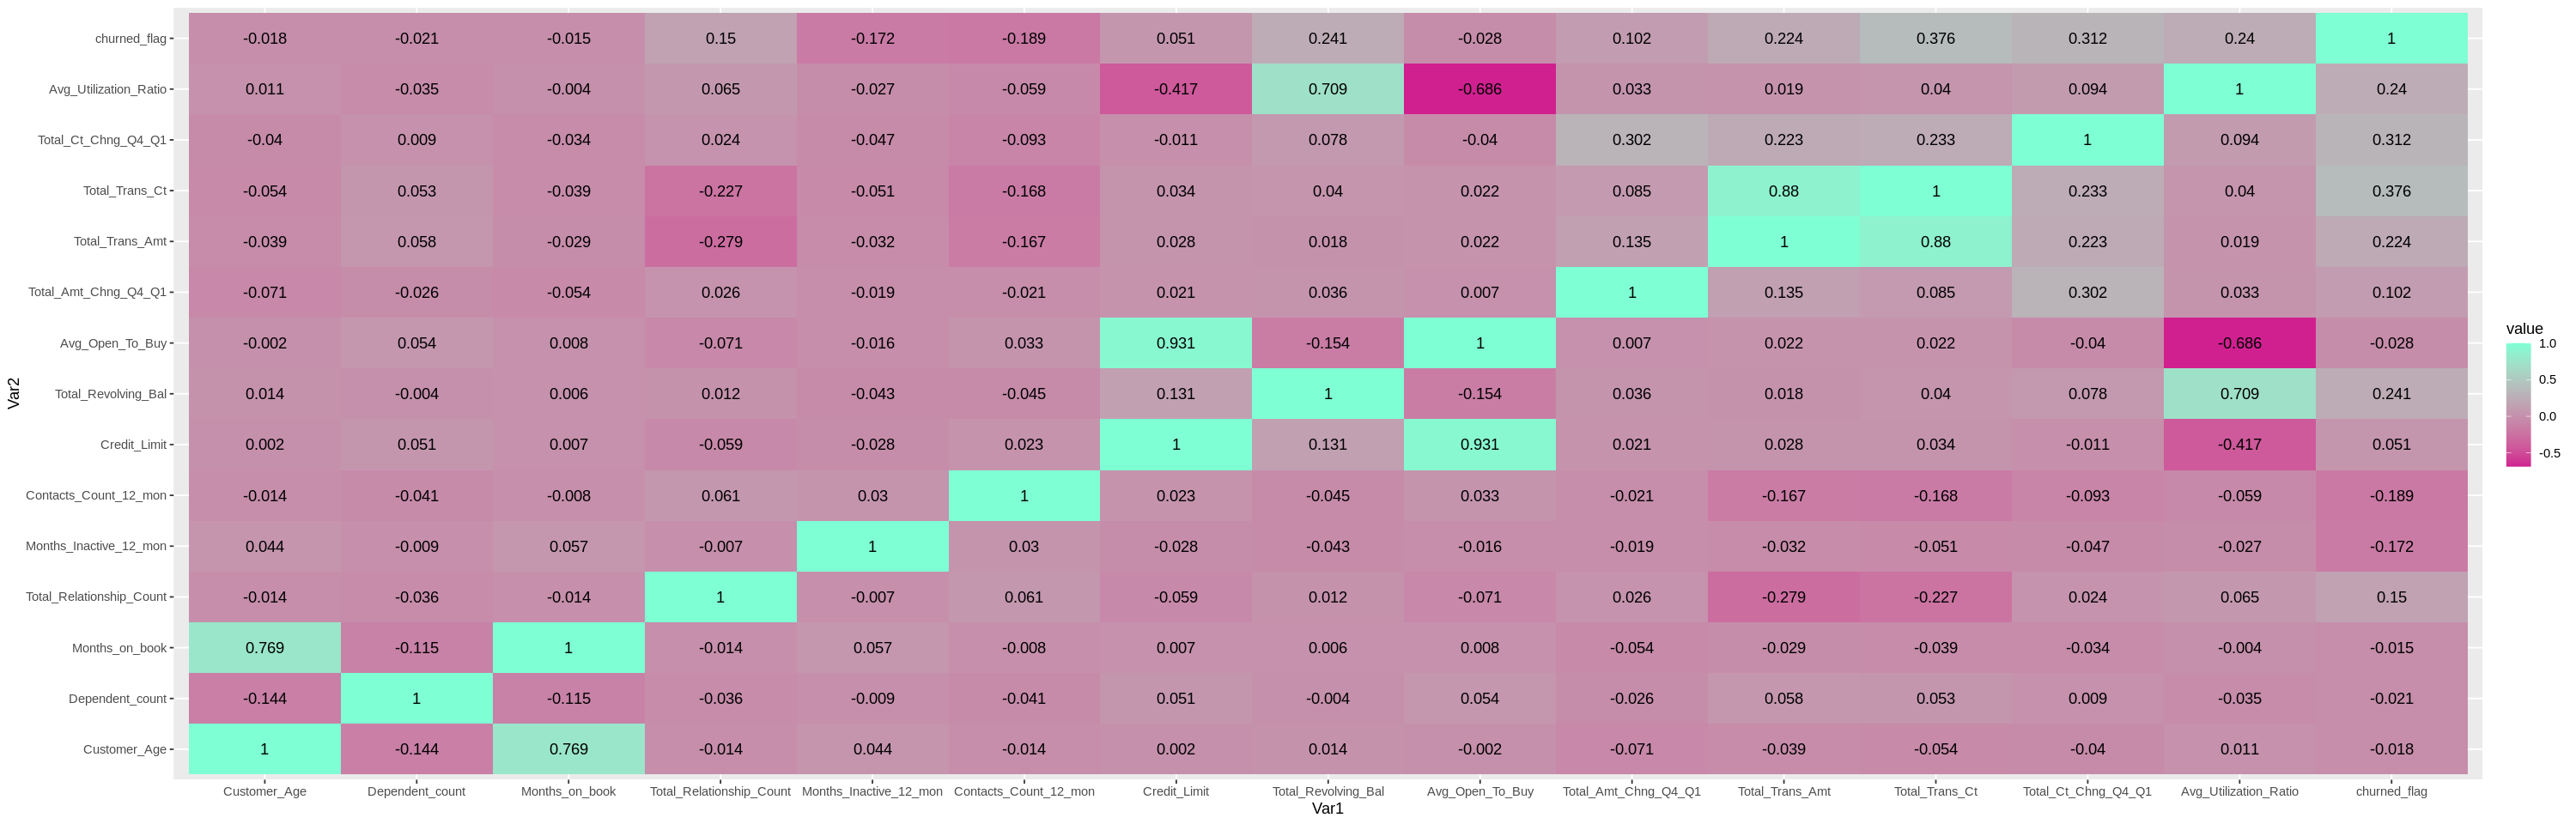

In [23]:
resizePlot(25,8)
data$churned_flag <- as.numeric(factor(data$Attrition_Flag))
cor_data <- cor(data[, sapply(data, is.numeric)], method = 'spearman')
ggplot(melt(cor_data), aes(x = Var1, Var2)) +
  geom_tile(aes(fill = value)) +
  geom_text(aes(label = round(value, 3))) +
  scale_fill_continuous(low = "violetred", high = "aquamarine")

resizePlot(15,8)

Terlihat bahwa terdapat beberapa yang memiliki hubungan sangat erat antara Avg_Open_To_Buy dengan Credit_Limit, Costumer_Age dengan Months_on_book, Total_Trans_Ct dengan Total_Trans_Amt, dan Total_Revolving_Bal dengan Avg_Utilization_Ratio yang memiliki hubungan yang kuat secara positif atau searah atau berbanding lurus. Kita juga bisa melihat hubungan Avg_Utilization_Ratio dengan Avg_Open_To_Buy dan Avg_Utilization_Ratio dengan Credit_Limit yang memiliki hubungan yang kuat secara negatif.

Karena kita fokus pada Churned atau tidaknya pelanggan kita fokus untuk mencari hubungan kuat churned_flag dengan column lain. Jika dilihat churned_flag memiliki hubungan yang sangat kuat dengan Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, Avg_Utilization_Ratio yaitu korelasi tertinggi secara positif.

## 2.3 Eksplorasi column quantitative

Karena yang didapat pada heatmap adalah variabel quantitative, maka terlebih dahulu liat hubungan churned dengan variabel-variabel qualitative terlebih dahulu.

In [ ]:
head(data[, sapply(data, is.character)])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Existing Customer,M,High School,Married,$60K - $80K,Blue
2,Existing Customer,F,Graduate,Single,Less than $40K,Blue
3,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
4,Existing Customer,F,High School,Unknown,Less than $40K,Blue
5,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
6,Existing Customer,M,Graduate,Married,$40K - $60K,Blue


Terlihat terdapat 5 column/variabel quantitative. Selanjutnya kita melihat karakteristik dari Attrition_Flag dengan kelima variabel tersebut.

In [ ]:
head(data)

,group,value
,<chr>,<dbl>
1,group-1,13
2,group-2,5
3,group-3,22


Banyaknya masing-masing element: 


  F   M 
930 697 

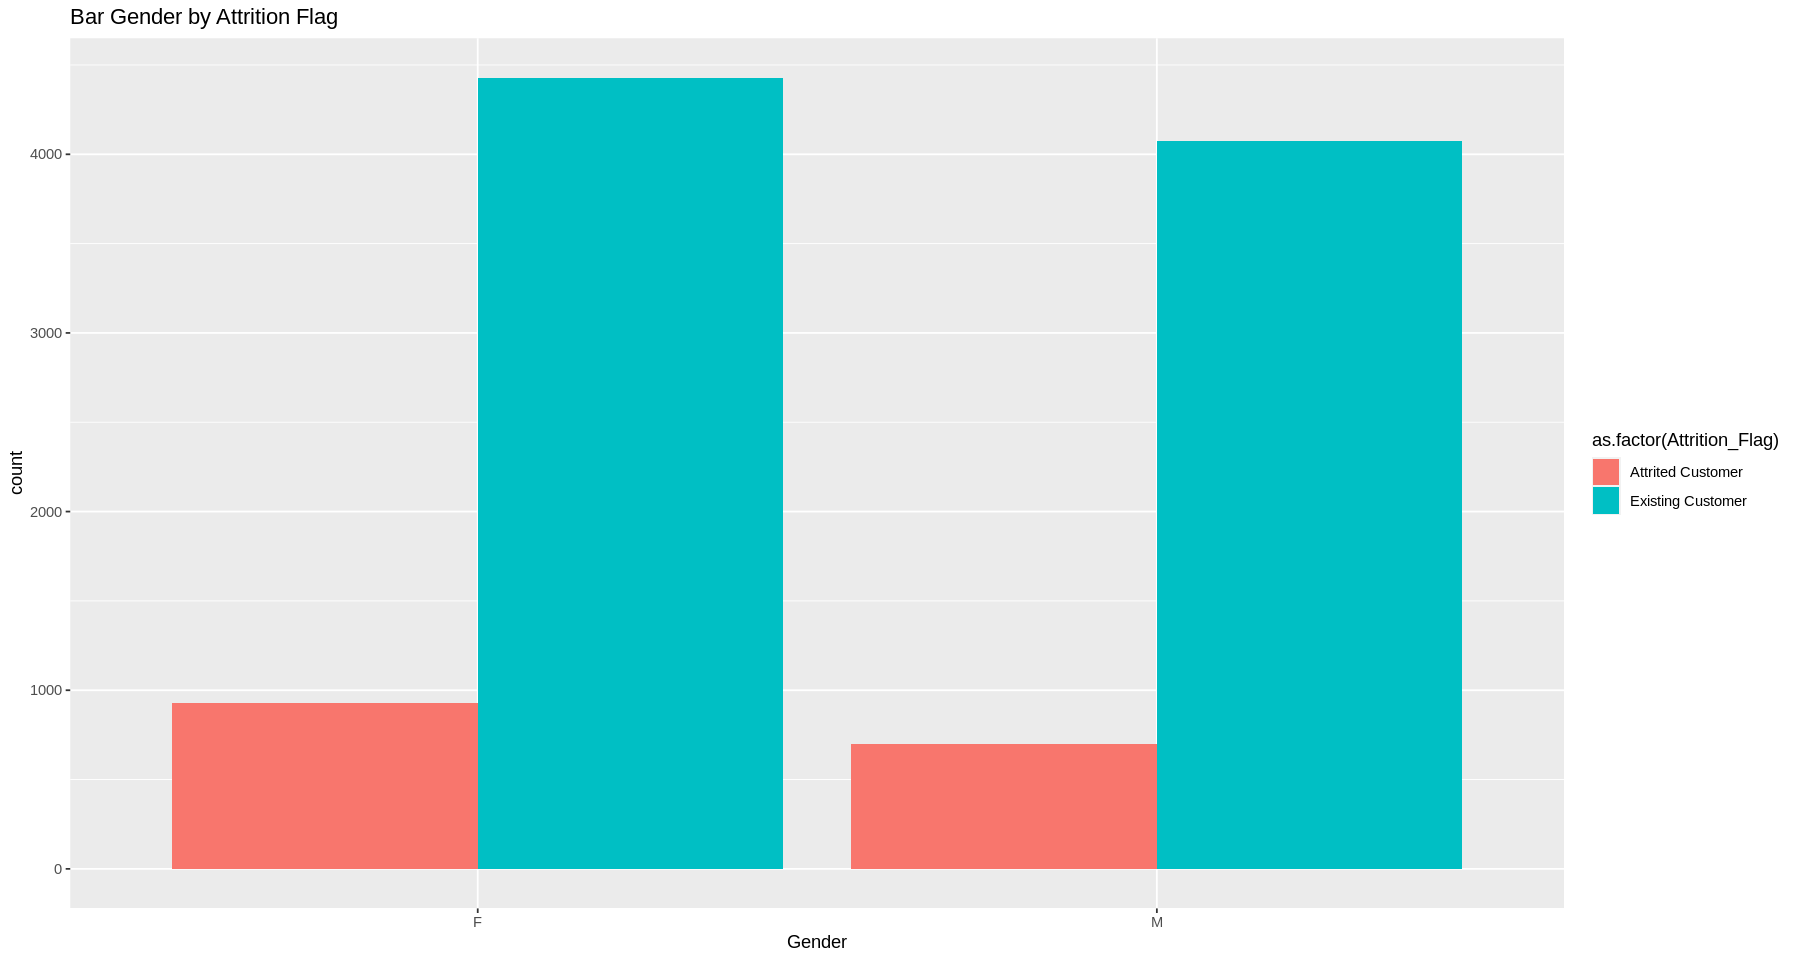

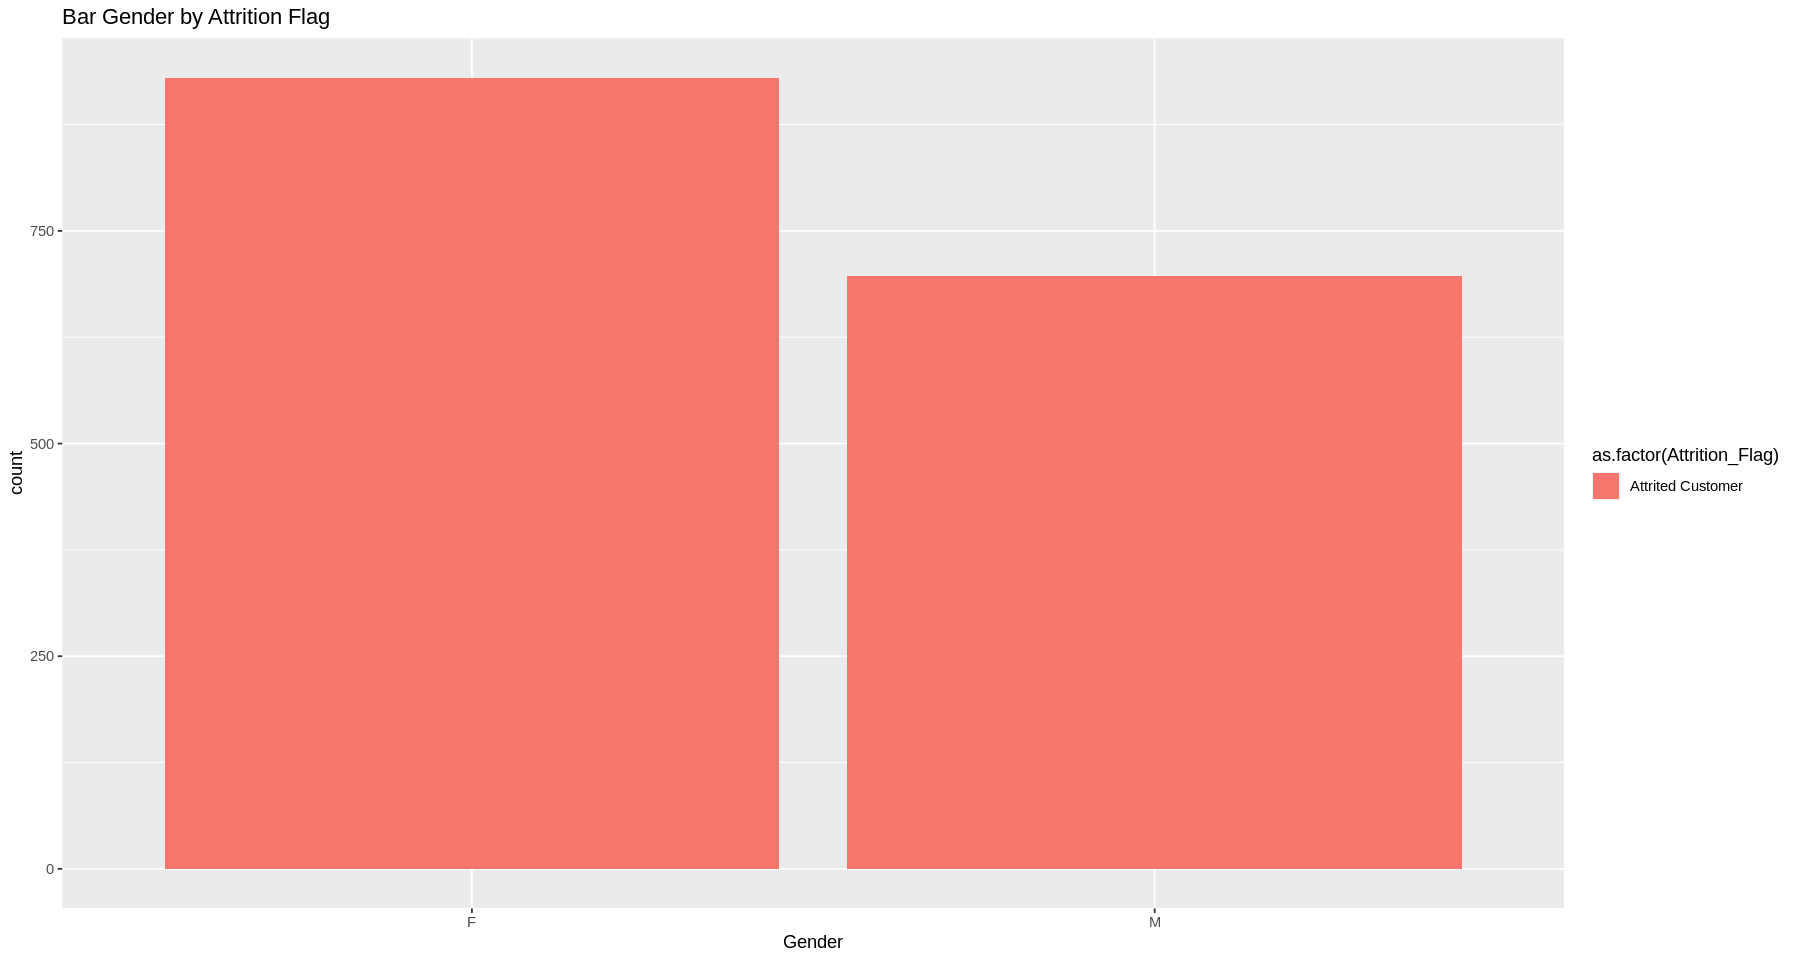

In [24]:
cat("Banyaknya masing-masing element: ")
table(filter(data, data$Attrition_Flag == "Attrited Customer")$Gender)
ggplot(data, aes(x=Gender, fill=as.factor(Attrition_Flag))) + 
    geom_bar(position="dodge") +
    ggtitle(label = "Bar Gender by Attrition Flag")

ggplot(filter(data, data$Attrition_Flag == "Attrited Customer"), aes(x=Gender, fill=as.factor(Attrition_Flag))) + 
    geom_bar(position="dodge") +
    ggtitle(label = "Bar Gender by Attrition Flag")

Terlihat pada bar chart diatas bahwa gender Female lebih banyak yang churned pada kartu kredit bank tersebut sebanyak 930 member. Dan gender Male sebanyak 697 member.

Banyaknya masing-masing element: 


      College     Doctorate      Graduate   High School Post-Graduate 
          154            95           487           306            92 
   Uneducated       Unknown 
          237           256 

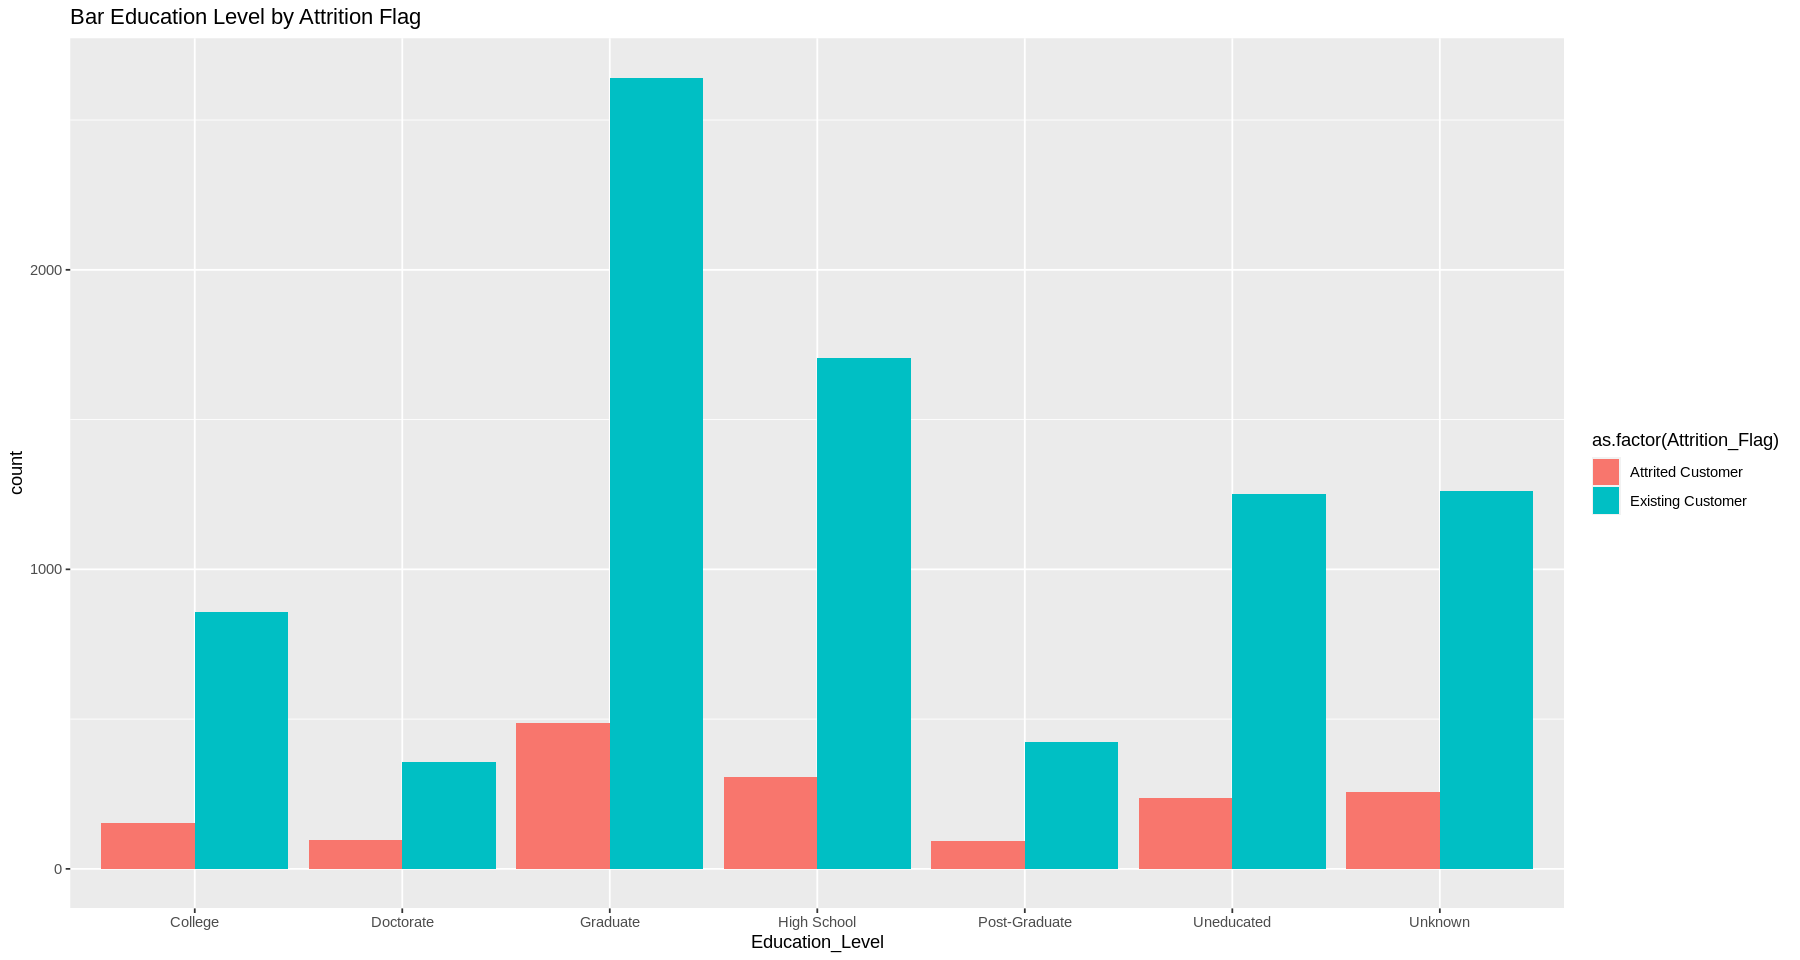

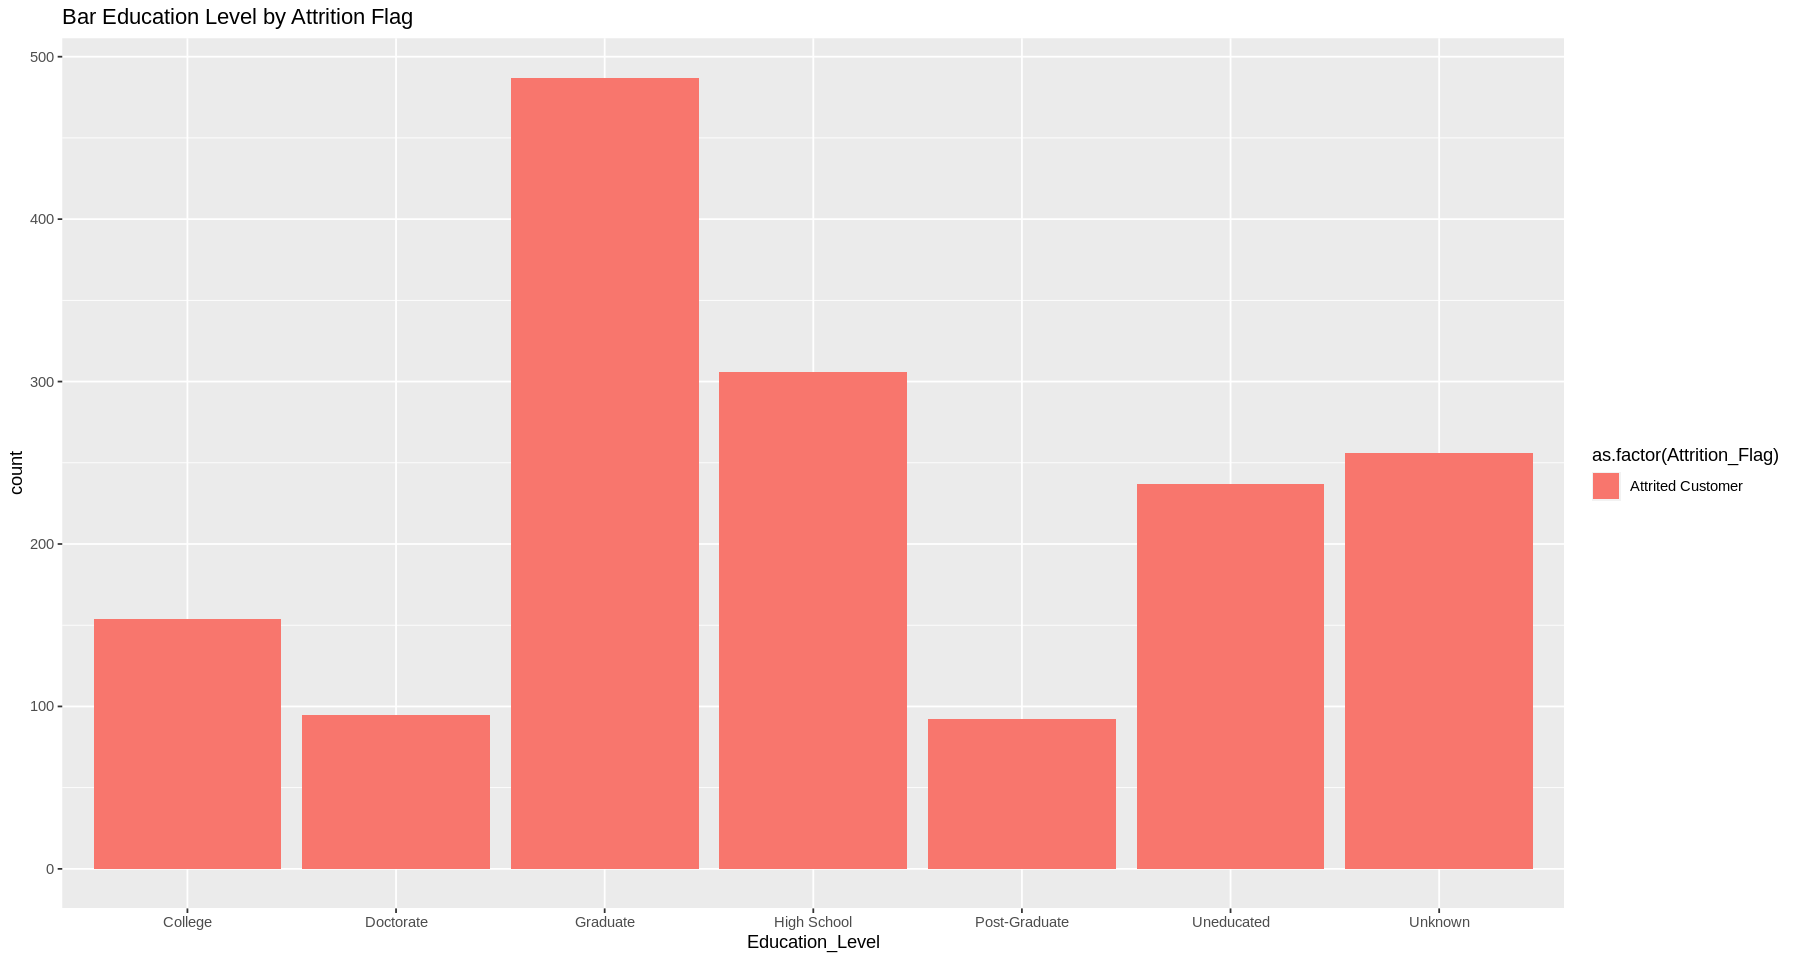

In [ ]:
cat("Banyaknya masing-masing element: ")
table(filter(data, data$Attrition_Flag == "Attrited Customer")$Education_Level)
ggplot(data, aes(x=Education_Level, fill=as.factor(Attrition_Flag))) + 
    geom_bar(position="dodge") +
    ggtitle(label = "Bar Education Level by Attrition Flag")

ggplot(filter(data, data$Attrition_Flag == "Attrited Customer"), aes(x=Education_Level, fill=as.factor(Attrition_Flag))) + 
    geom_bar(position="dodge") +
    ggtitle(label = "Bar Education Level by Attrition Flag")

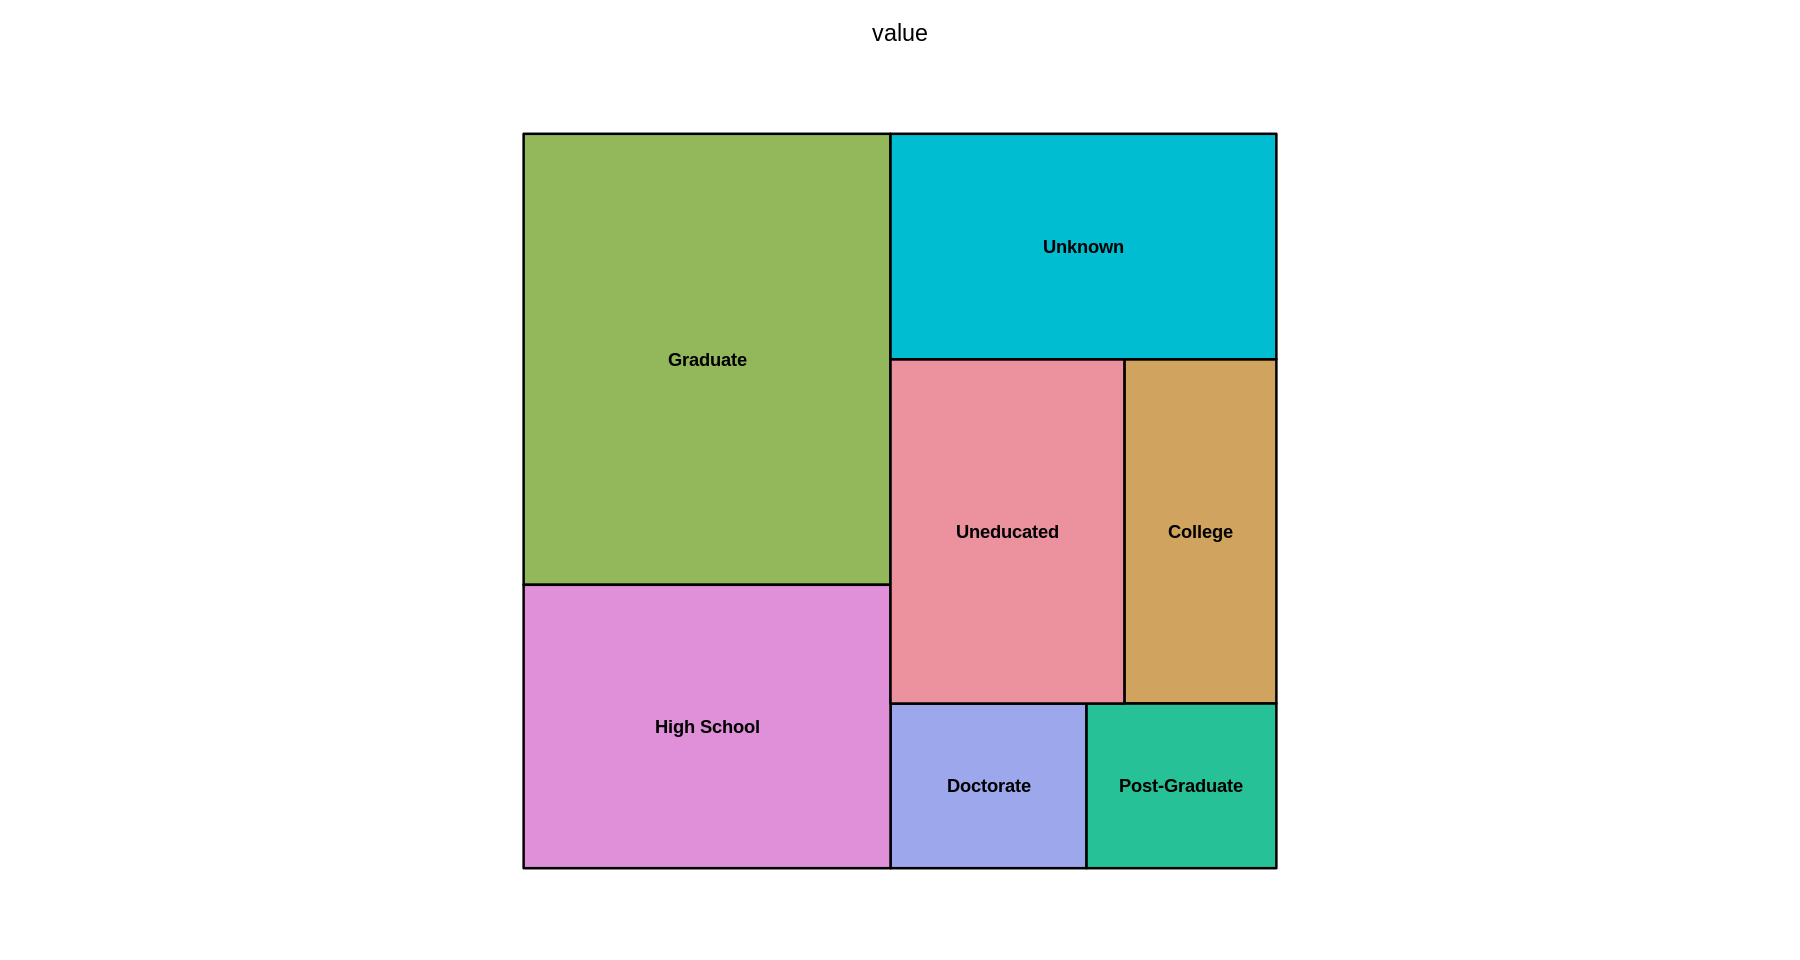

In [ ]:
data_filtered <- melt(table(filter(data, Attrition_Flag == "Attrited Customer")$Education_Level))
group <- as.character(data_filtered$Var1)
value <- as.numeric(data_filtered$value)
data_filtered <- data.frame(group,value)
treemap(data_filtered, index="group", vSize="value")

Terlihat bahwa education level Graduate lebih banyak yang melakukan churned pada kartu kreditnya dengan jumlah 487 member diikuti dengan high School.

Banyaknya masing-masing element: 


Divorced  Married   Single  Unknown 
     121      709      668      129 

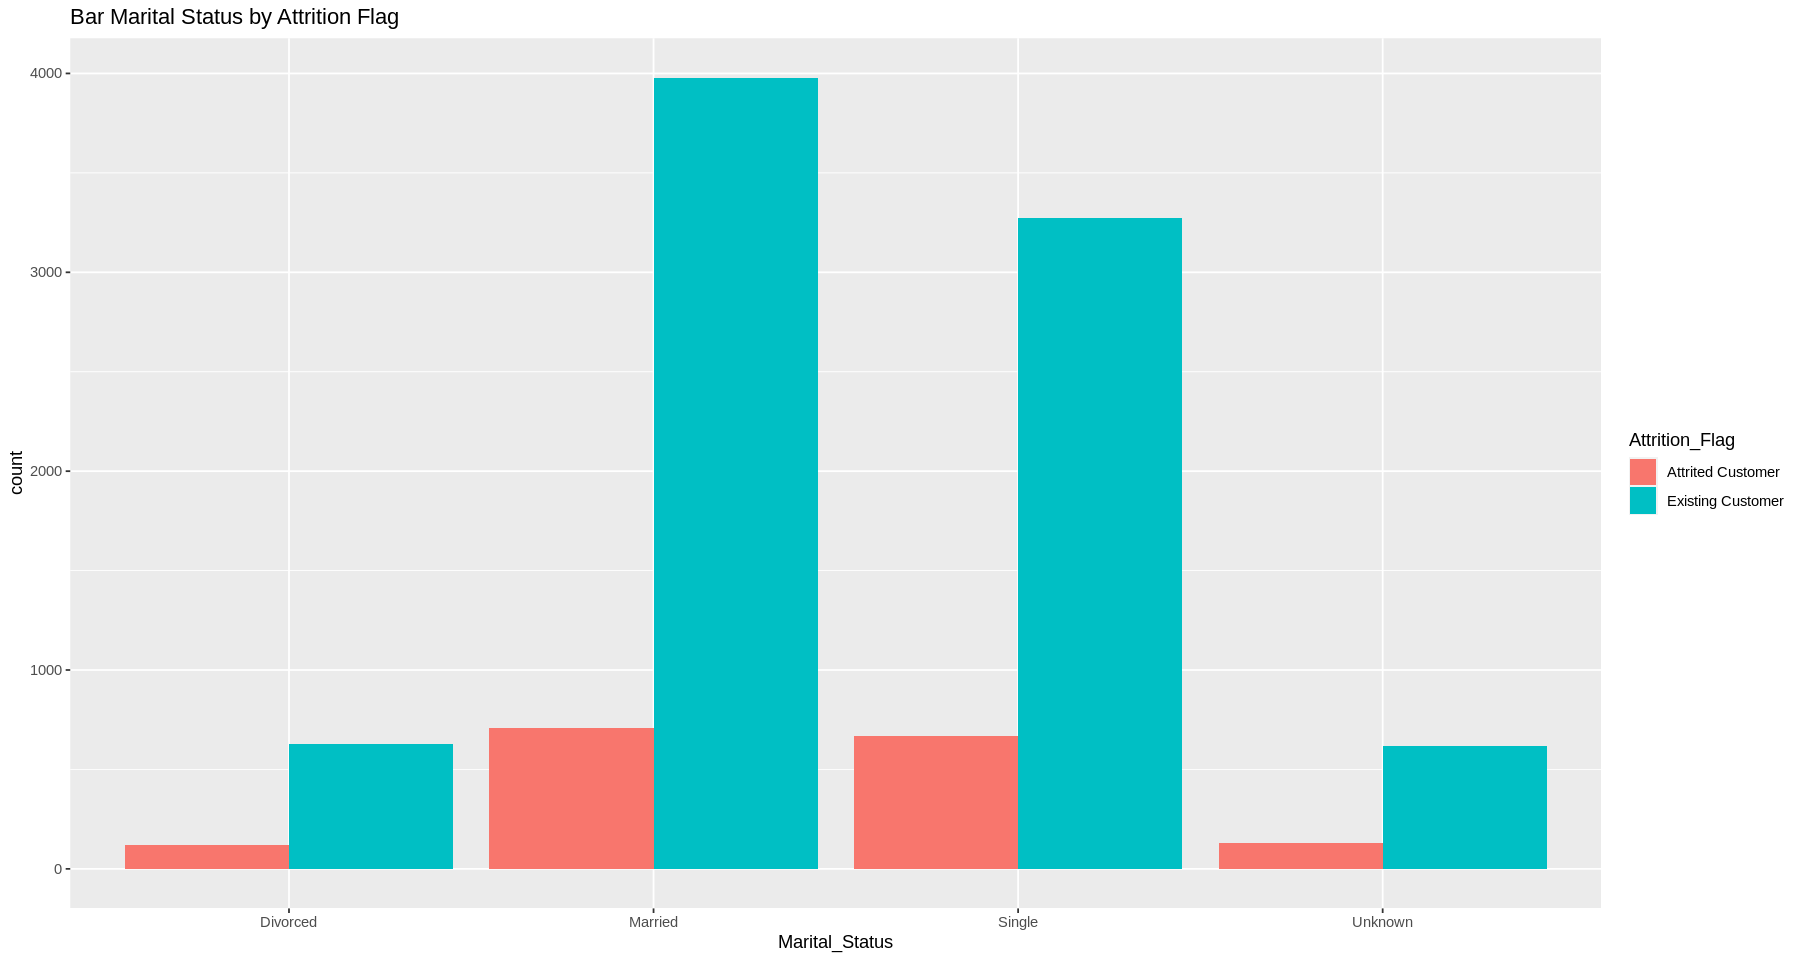

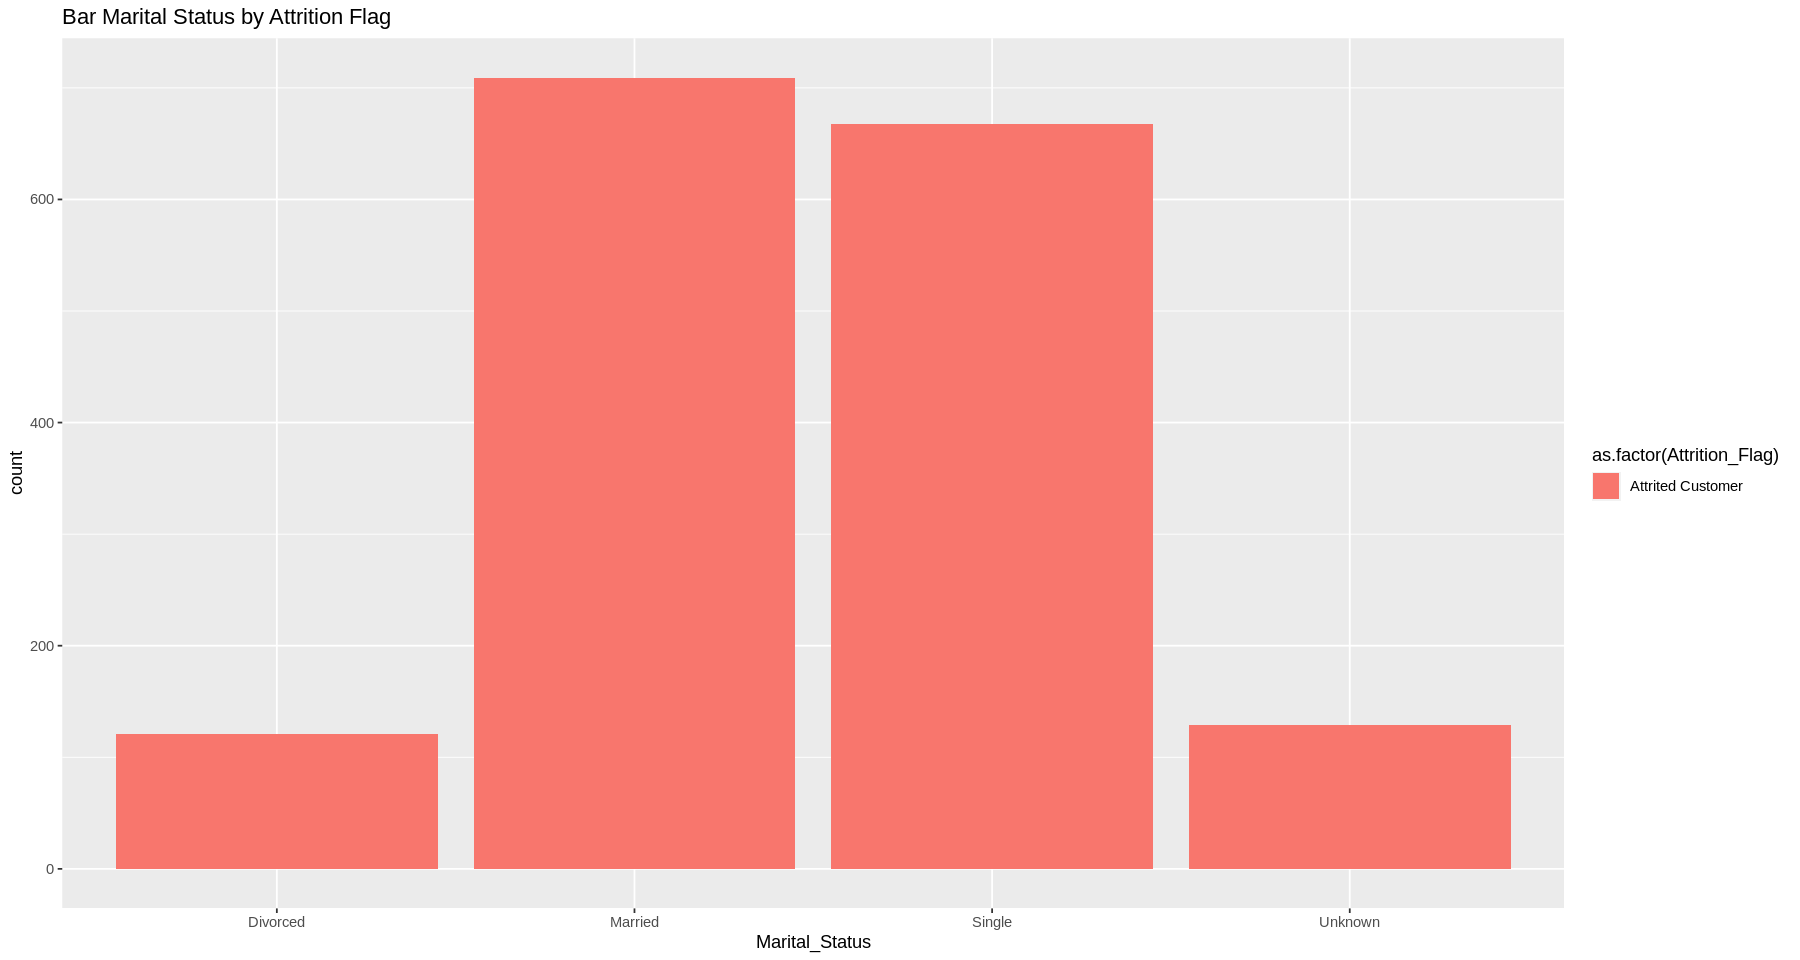

In [ ]:
cat("Banyaknya masing-masing element: ")
table(filter(data, data$Attrition_Flag == "Attrited Customer")$Marital_Status)
ggplot(data, aes(x=Marital_Status, fill=Attrition_Flag)) + 
    geom_bar(position="dodge") +
    ggtitle(label = "Bar Marital Status by Attrition Flag")

ggplot(filter(data, data$Attrition_Flag == "Attrited Customer"), aes(x=Marital_Status, fill=as.factor(Attrition_Flag))) + 
    geom_bar(position="dodge") +
    ggtitle(label = "Bar Marital Status by Attrition Flag")

Marital Status Married lebih banyak yang melakukan churned pada kartu kredit bank tersebut dengan jumlah 709 member lalu diikuti dengan Single sebanyak 668 member.

Banyaknya masing-masing element: 


    Blue     Gold Platinum   Silver 
    1519       21        5       82 

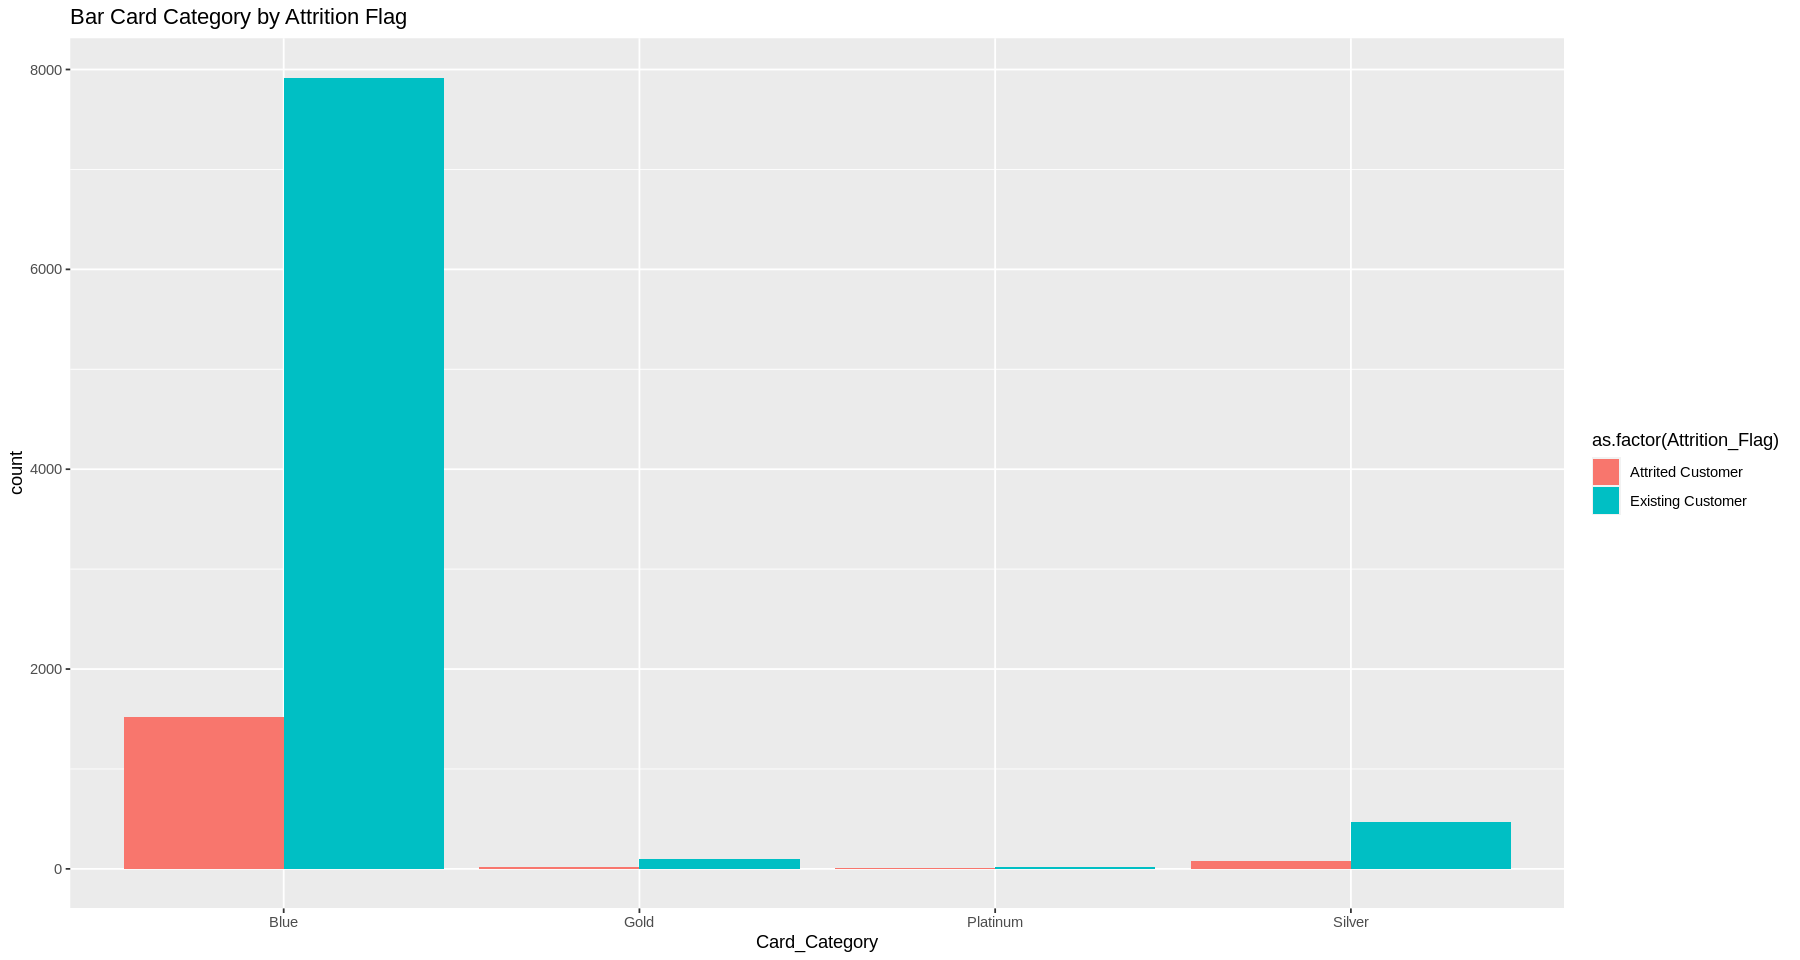

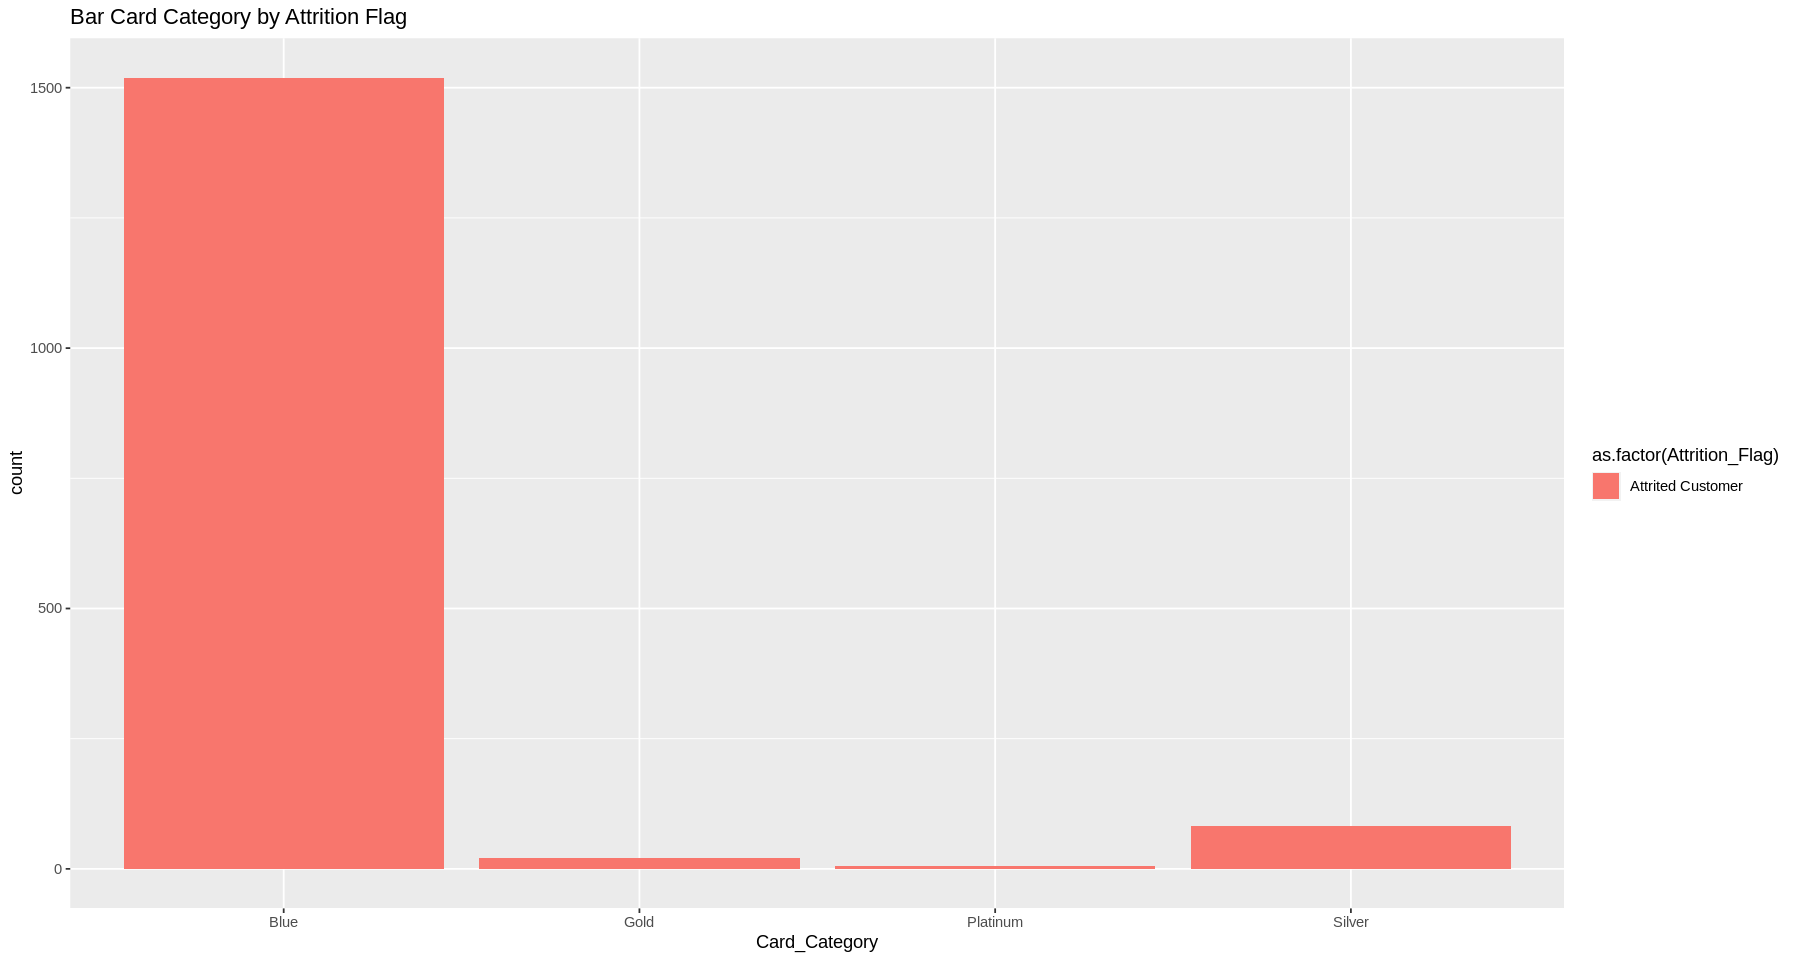

In [ ]:
cat("Banyaknya masing-masing element: ")
table(filter(data, data$Attrition_Flag == "Attrited Customer")$Card_Category)
ggplot(data, aes(x=Card_Category, fill=as.factor(Attrition_Flag))) + 
    geom_bar(position="dodge") +
    ggtitle(label = "Bar Card Category by Attrition Flag")

ggplot(filter(data, data$Attrition_Flag == "Attrited Customer"), aes(x=Card_Category, fill=as.factor(Attrition_Flag))) + 
    geom_bar(position="dodge") +
    ggtitle(label = "Bar Card Category by Attrition Flag")

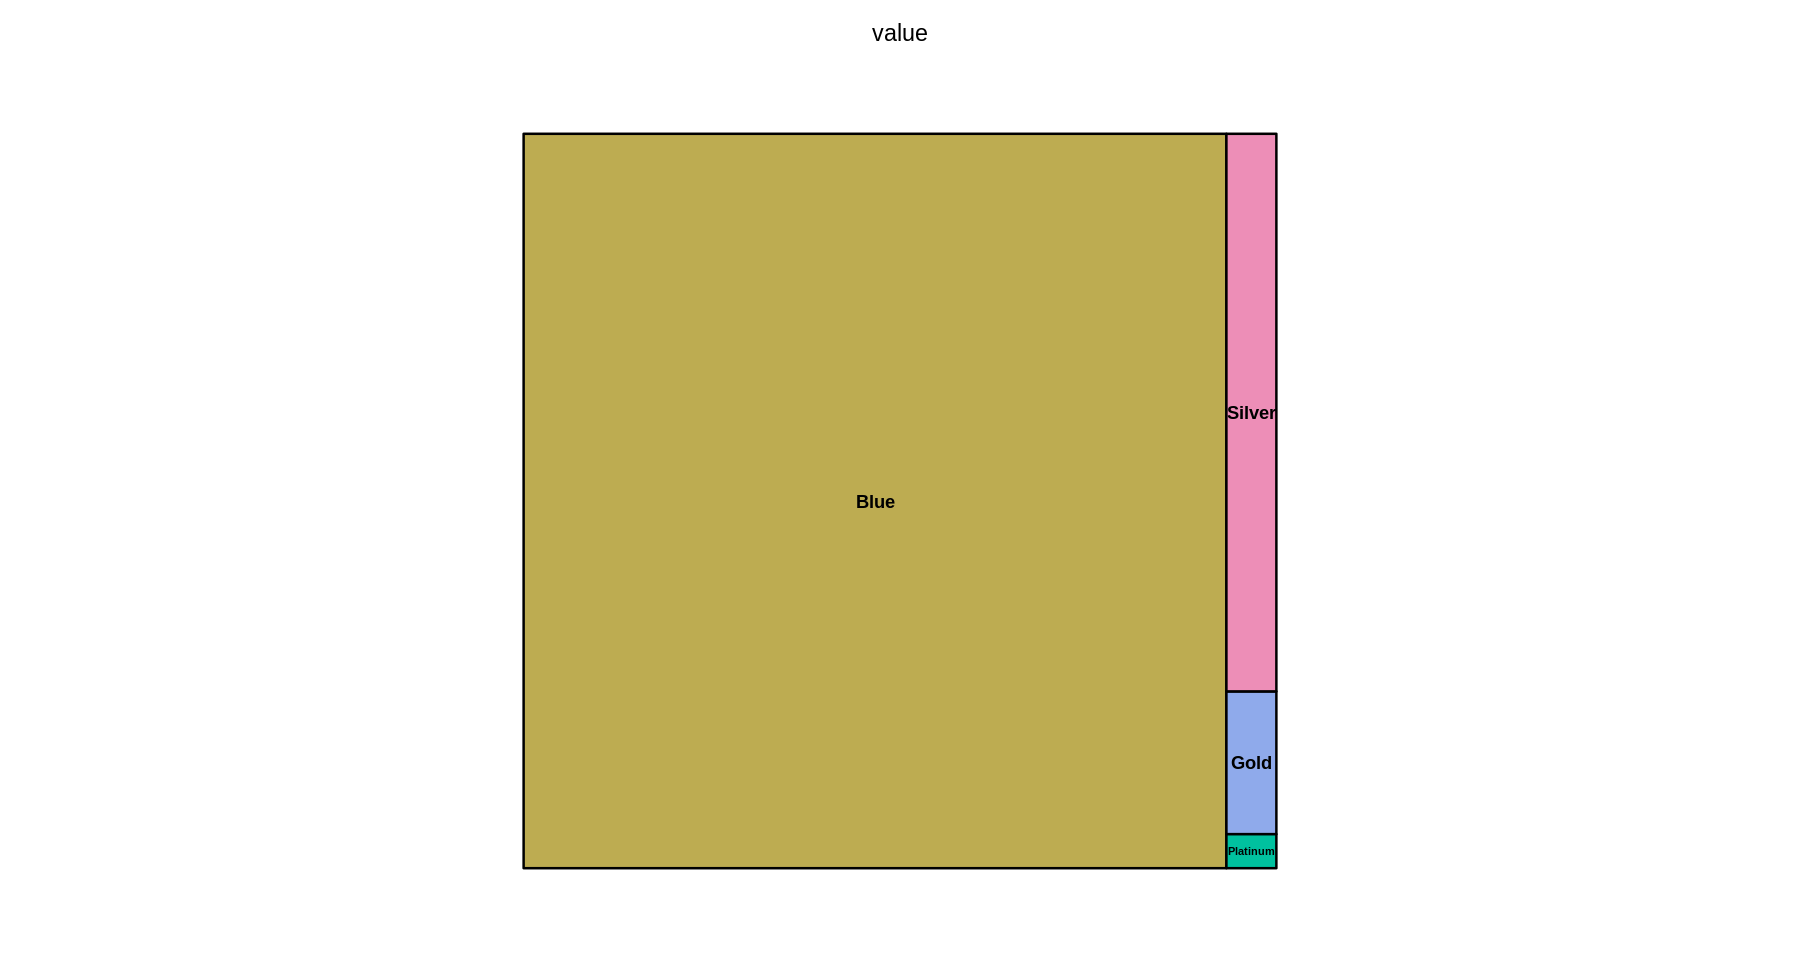

In [ ]:
data_filtered <- melt(table(filter(data, Attrition_Flag == "Attrited Customer")$Card_Category))
group <- as.character(data_filtered$Var1)
value <- as.numeric(data_filtered$value)
data_filtered <- data.frame(group,value)
treemap(data_filtered, index="group", vSize="value")

Blue Card memiliki 1519 member yang melakukan churned pada kartu kredit bank tersebut lalu diikuti Silver Card yang memiliki 87 member yang churned.

Banyaknya masing-masing element: 


       $120K +    $40K - $60K    $60K - $80K   $80K - $120K Less than $40K 
           126            271            189            242            612 
       Unknown 
           187 

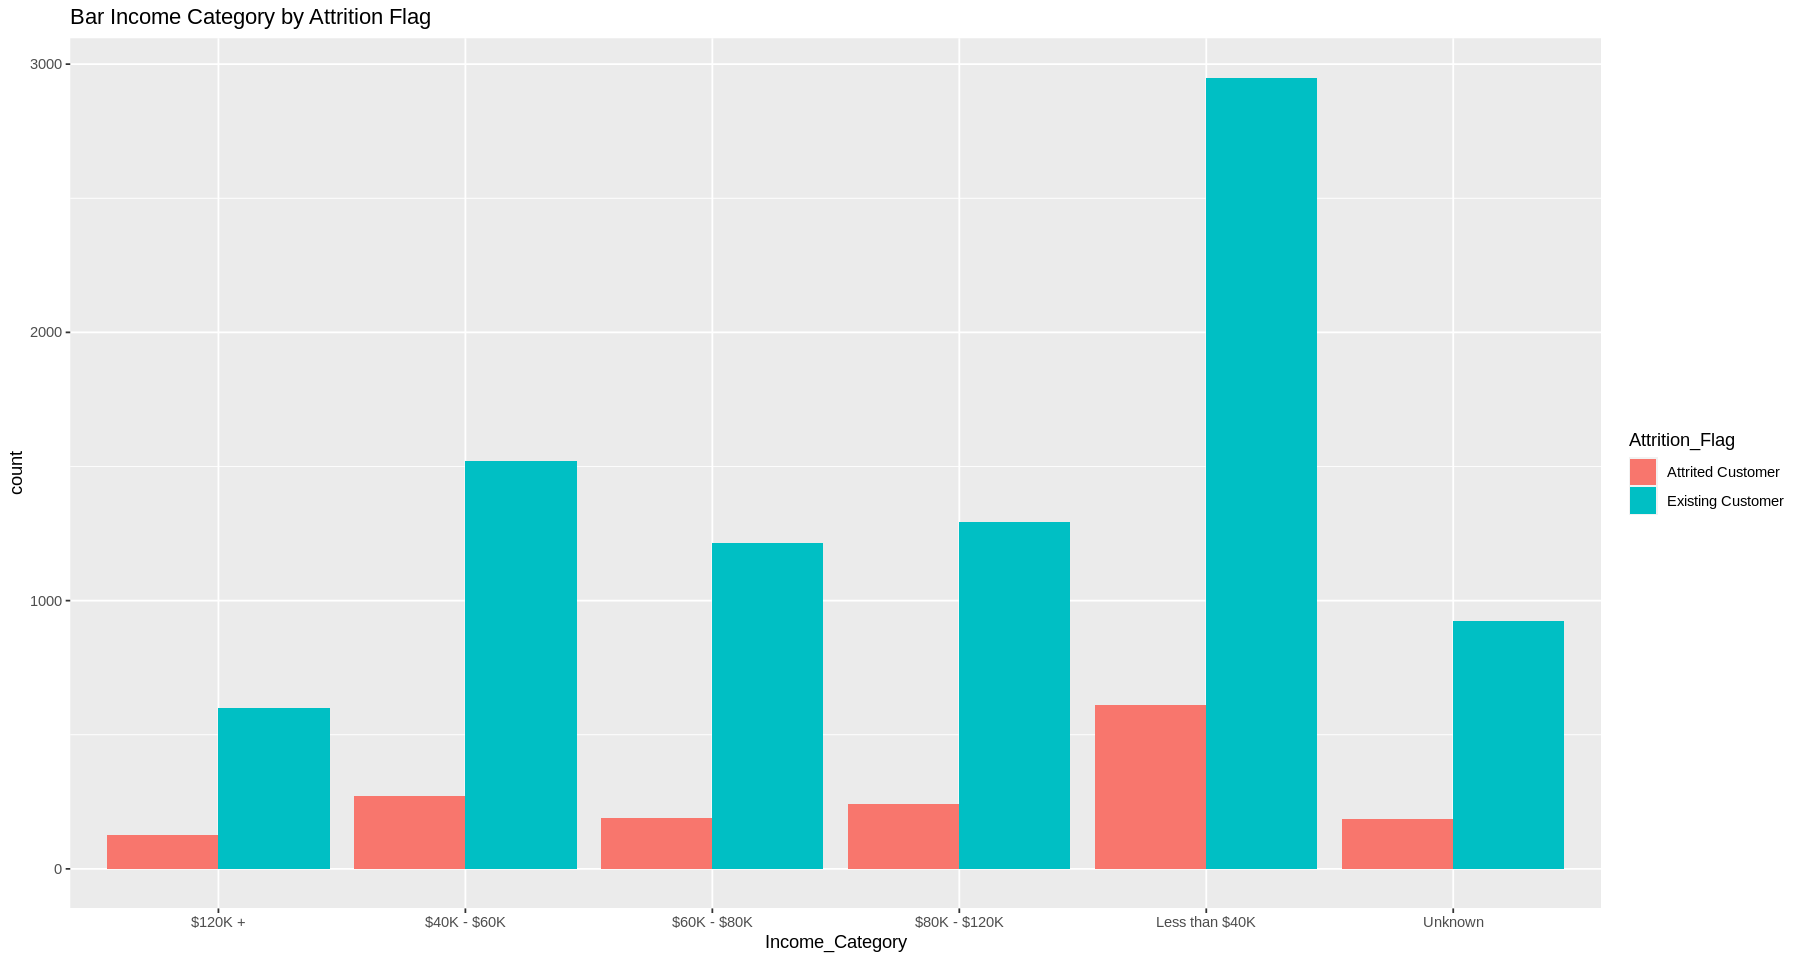

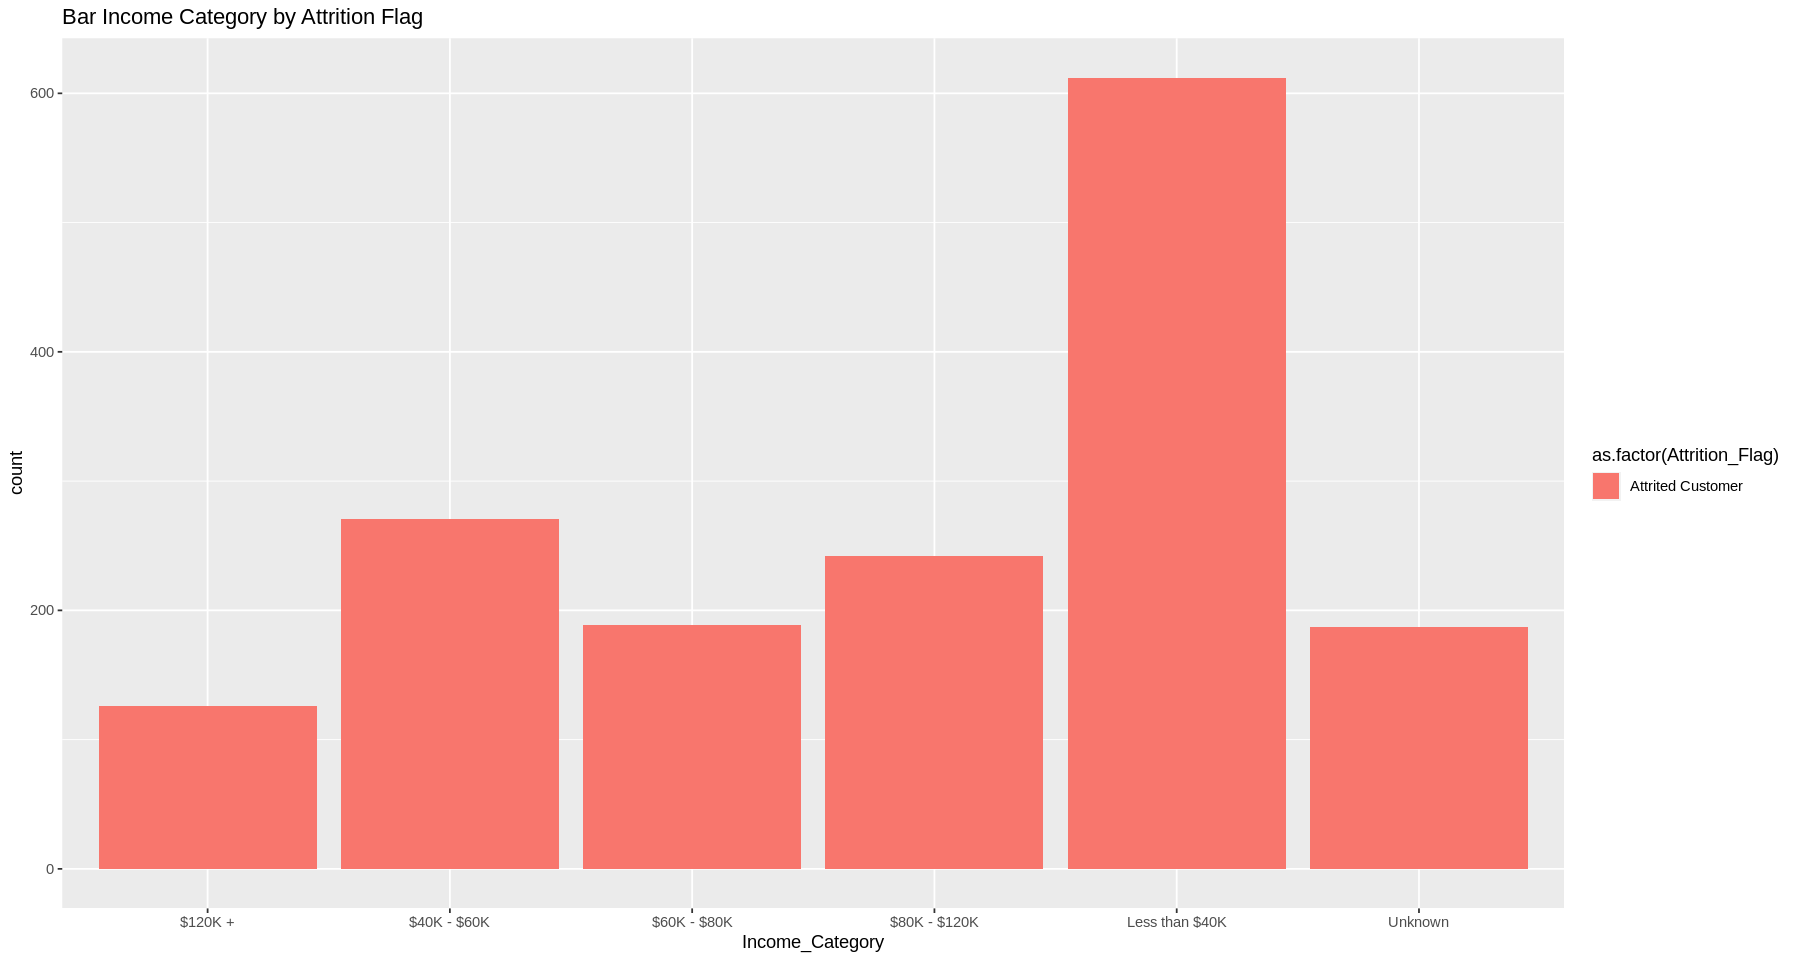

In [ ]:
cat("Banyaknya masing-masing element: ")
table(filter(data, data$Attrition_Flag == "Attrited Customer")$Income_Category)
ggplot(data, aes(x=Income_Category, fill=Attrition_Flag)) + 
    geom_bar(position="dodge") +
    ggtitle(label = "Bar Income Category by Attrition Flag")

ggplot(filter(data, data$Attrition_Flag == "Attrited Customer"), aes(x=Income_Category, fill=as.factor(Attrition_Flag))) + 
    geom_bar(position="dodge") +
    ggtitle(label = "Bar Income Category by Attrition Flag")

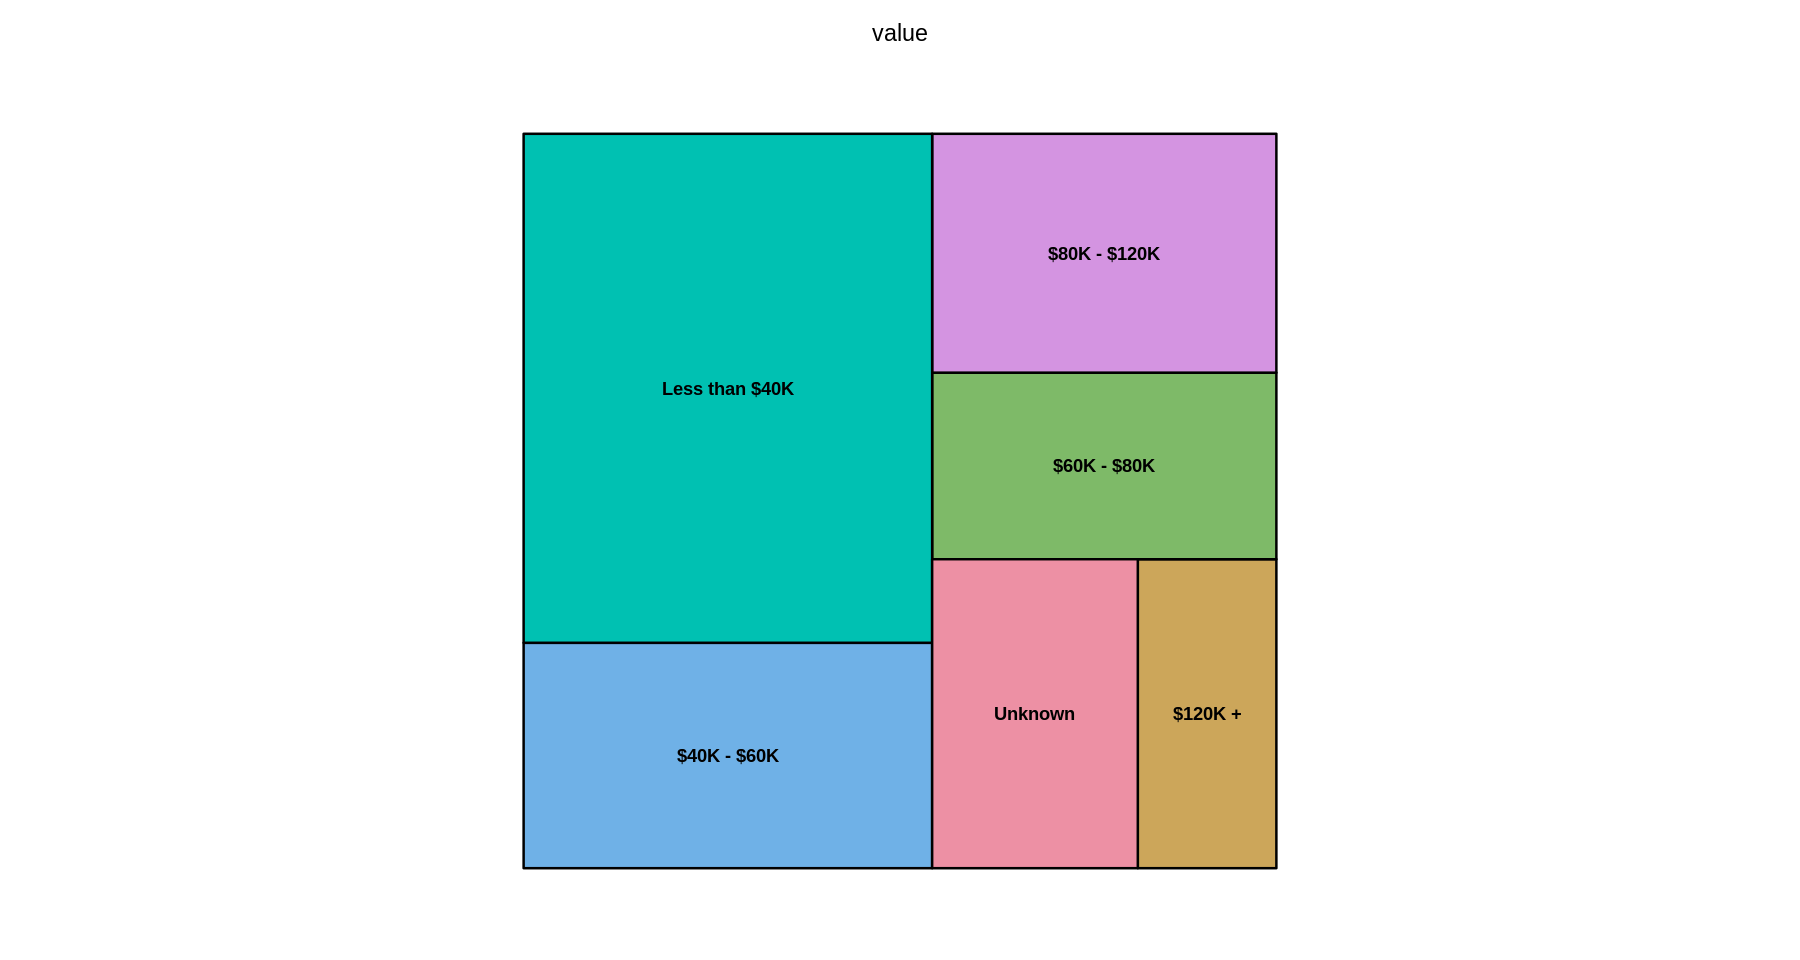

In [ ]:
data_filtered <- melt(table(filter(data, Attrition_Flag == "Attrited Customer")$Income_Category))
group <- as.character(data_filtered$Var1)
value <- as.numeric(data_filtered$value)
data_filtered <- data.frame(group,value)
treemap(data_filtered, index="group", vSize="value")

Terlihat bahwa penghasilan Less than $40K melakukan churned sebanyak 612 member pada bank tersebut.

### 2.3.1 Kesimpulan column quantitative

Jadi dapat disimpulkan bahwa member yang melakukan churned adalah yang mempunyai salah satu ciri sbb: \ 
1. Female
2. Graduate
3. Married
4. Blue
5. Income Less than $40K

dan member terbanyak bank tersebut yang melakukan churned adalah yang memiliki kelima ciri diatas.


## 2.4 Eksplorasi column sesuai Heatmap

Selanjutnya eksplorasi variabel quantitative yang memiliki hubungan yang erat dengan churned_flag atau Attrition_Flag, yaitu Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, Avg_Utilization. Keempat column tersebut dapat disebut sebagai indikator/parameter untuk melihat prilaku/kebiasaan pengguna/member dalam traksaksi atau menggunakan kartu kreditnya.

Summary data dari Total_Trans_Ct berdasarkan Existing Customer

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.00   54.00   71.00   68.67   82.00  139.00 


Summary data dari Total_Trans_Ct berdasarkan Attrited Customer

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   37.00   43.00   44.93   51.00   94.00 

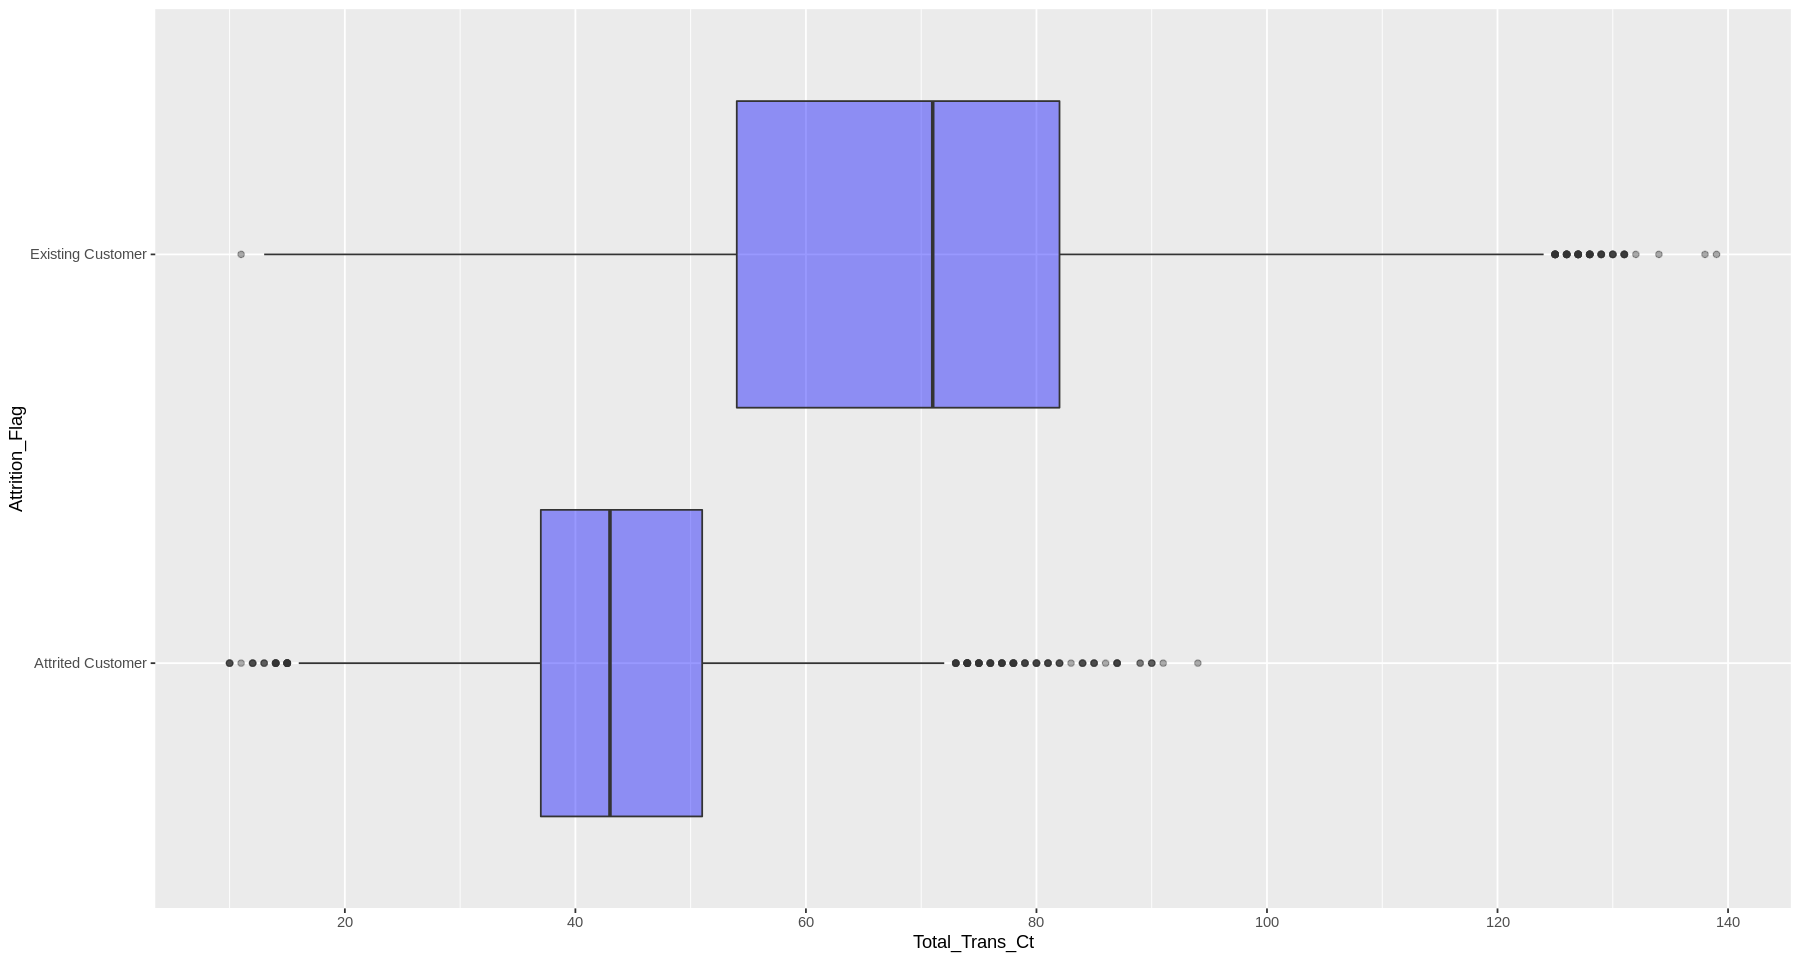

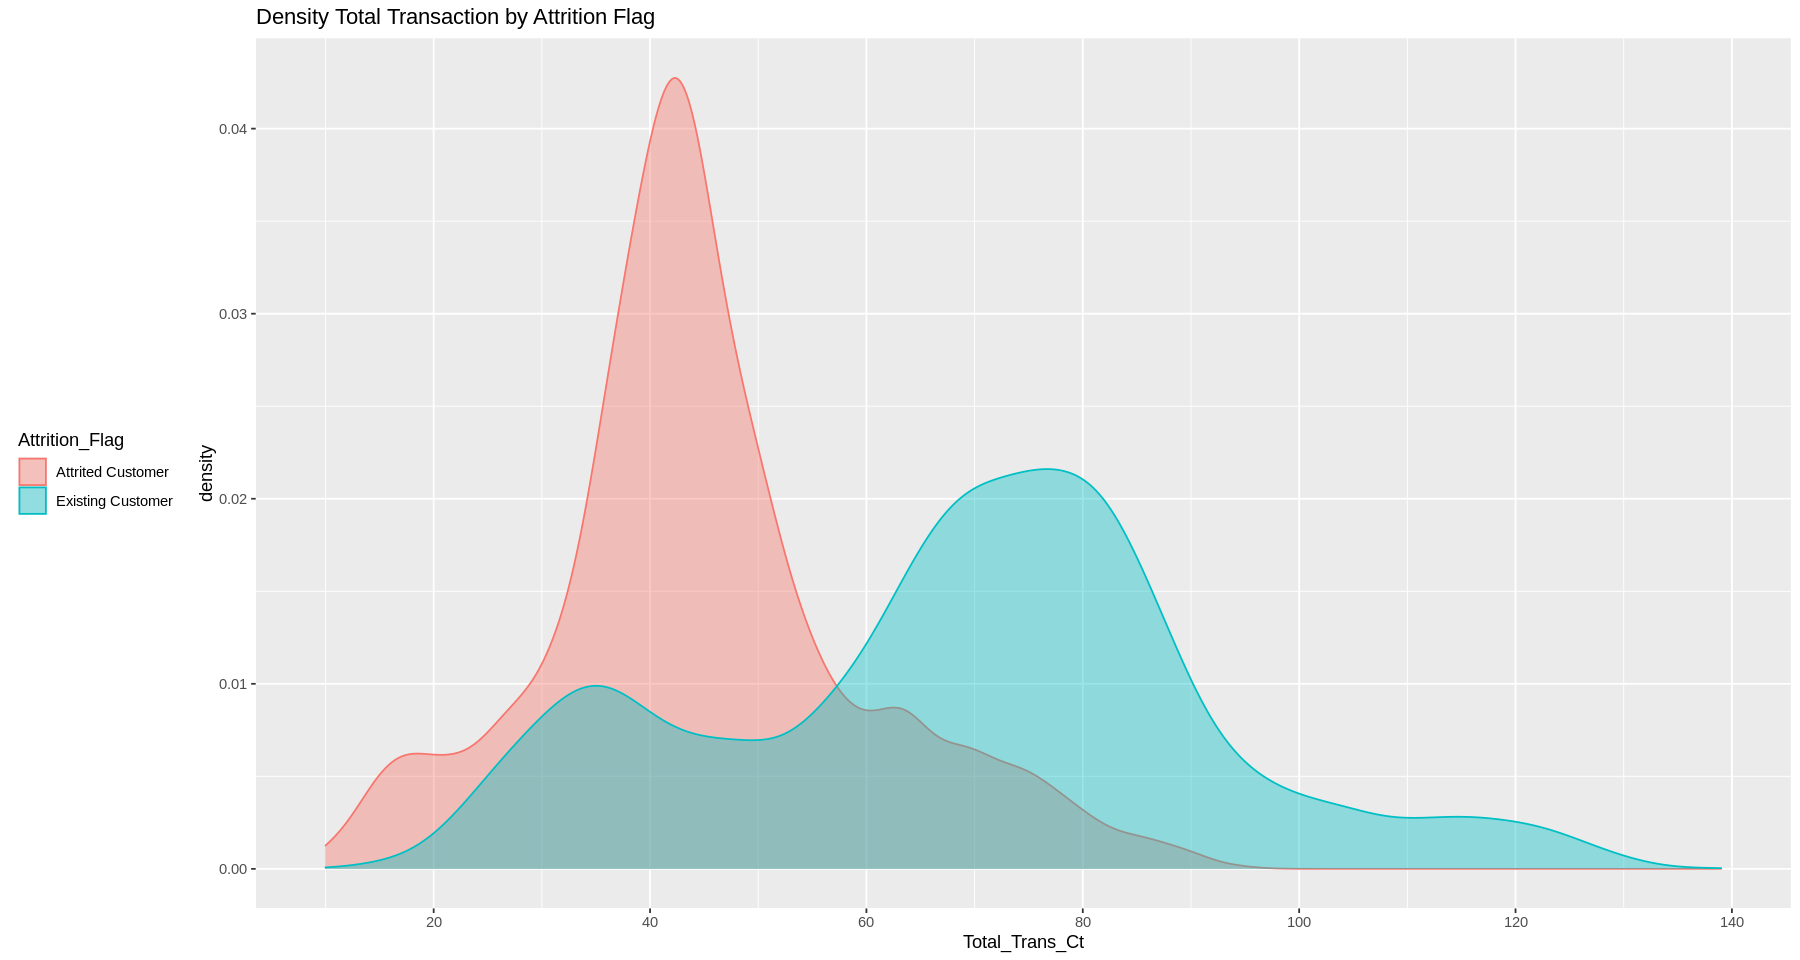

In [ ]:
cat("Summary data dari Total_Trans_Ct berdasarkan Existing Customer")
summary(filter(data, Attrition_Flag == "Existing Customer")$Total_Trans_Ct)
cat("\n")
cat("Summary data dari Total_Trans_Ct berdasarkan Attrited Customer")
summary(filter(data, Attrition_Flag == "Attrited Customer")$Total_Trans_Ct)
ggplot(data, aes(x=Total_Trans_Ct, y=Attrition_Flag)) + 
    geom_boxplot(fill="blue", alpha=0.4) +
    scale_x_continuous(breaks = pretty(c(10,200), n = 10))

ggplot(data, aes(x = Total_Trans_Ct, color = `Attrition_Flag`, fill = Attrition_Flag)) +
  geom_density(alpha = 0.4) +
  labs(title = "Density Total Transaction by Attrition Flag") +
  scale_x_continuous(breaks = pretty(c(10,200), n = 10)) + 
  theme(legend.position="left")

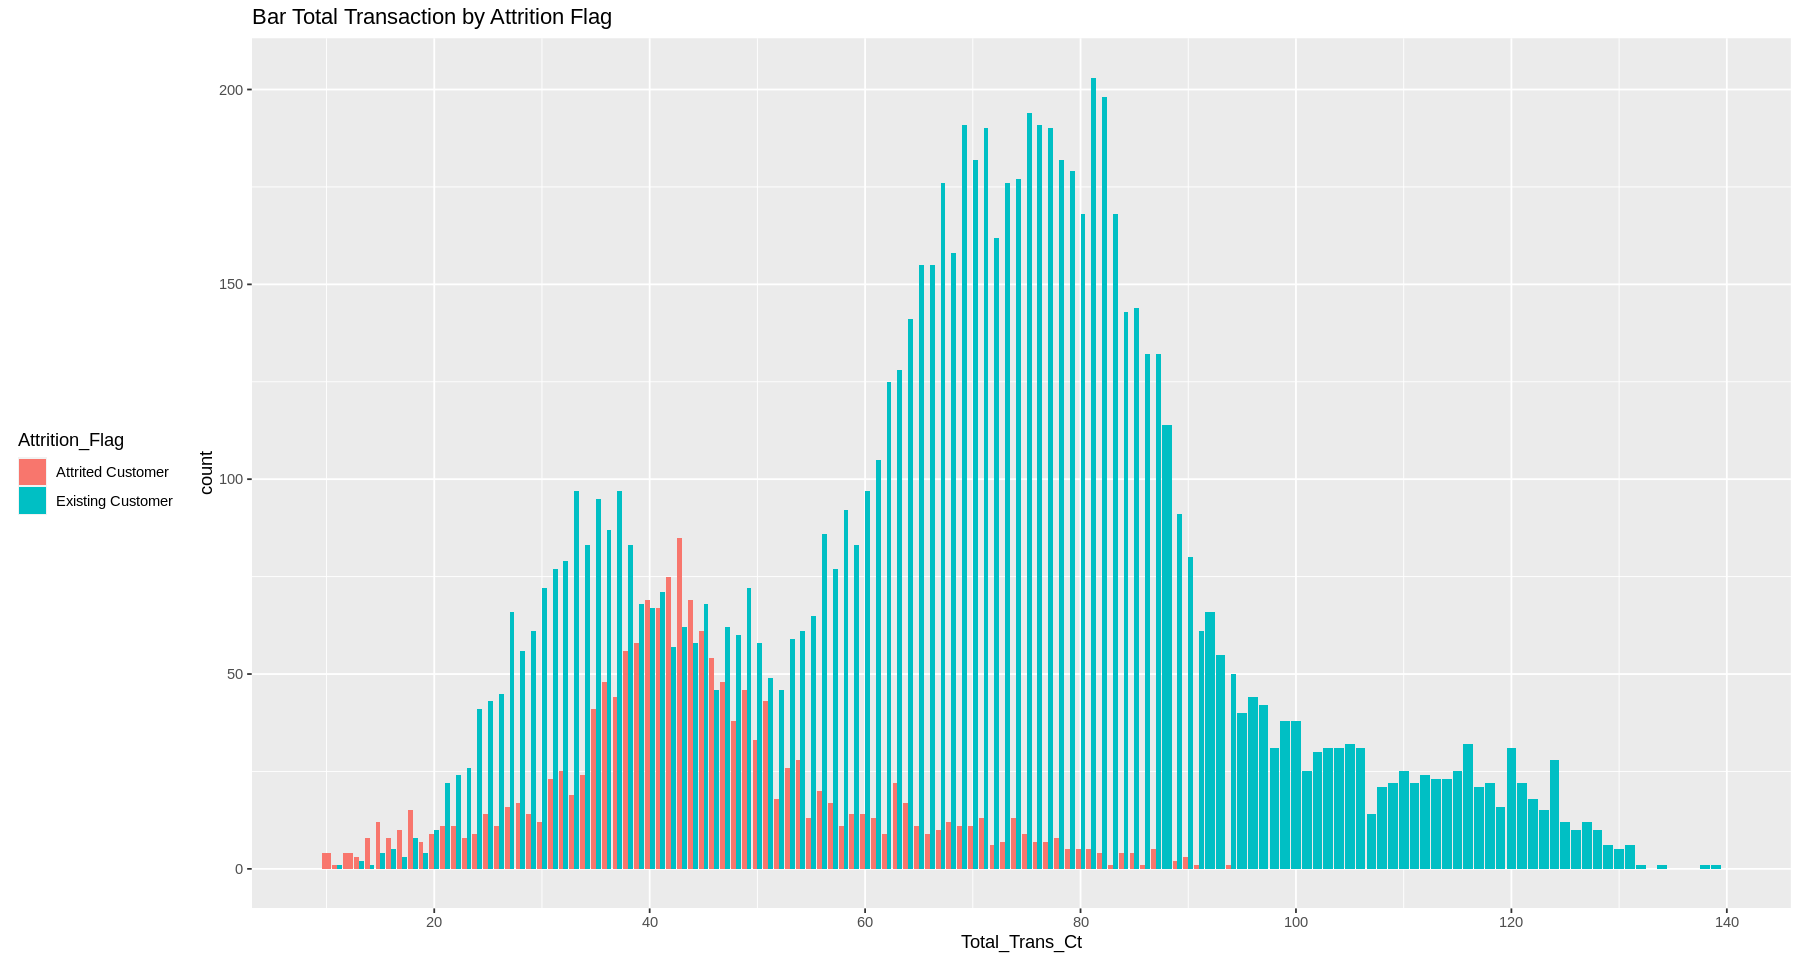

In [ ]:
ggplot(data, aes(x = Total_Trans_Ct, fill = Attrition_Flag)) + 
  geom_bar(position="dodge") +
  ggtitle(label = "Bar Total Transaction by Attrition Flag") +
  scale_x_continuous(breaks = pretty(c(10,200), n = 10)) + 
  theme(legend.position="left")

Terlihat bahwa distribusi data dari Total Transaction by Exixsting Customer memiliki bentuk bimodal, sedangkan Total Transaction by Attrited Customer memiliki bentuk normal distribusi/lonceng.\
Dan dari boxplot serta density chart kita bisa lihat bahwa hampir 50% **member yang churned** melakukan transaksi kurang dari sama dengan 43 kali(median) dalam 12 bulan dan 75% melakukan transaksi setidaknya 51 kali. Sedangkan 50% **member yang tidak churned** melakukan transaksi lebih sering yaitu sebanyak 71 kali.\
Kesimpulannya 75% member yang **attrited atau churned** melakukan jumlah transaksi yang sedikit dalam setahun yaitu sama dengan kurang dari 51 kali sedangkan **existing customer** 75% membernya setidaknya melakukan jumlah transaksi dalam setahun sebanyak sama dengan lebih dari 54 kali.

Summary data dari Total_Ct_Chng_Q4_Q1 berdasarkan Existing Customer

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0280  0.6170  0.7210  0.7424  0.8330  3.7140 


Summary data dari Total_Ct_Chng_Q4_Q1 berdasarkan Attrited Customer

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.4000  0.5310  0.5544  0.6920  2.5000 

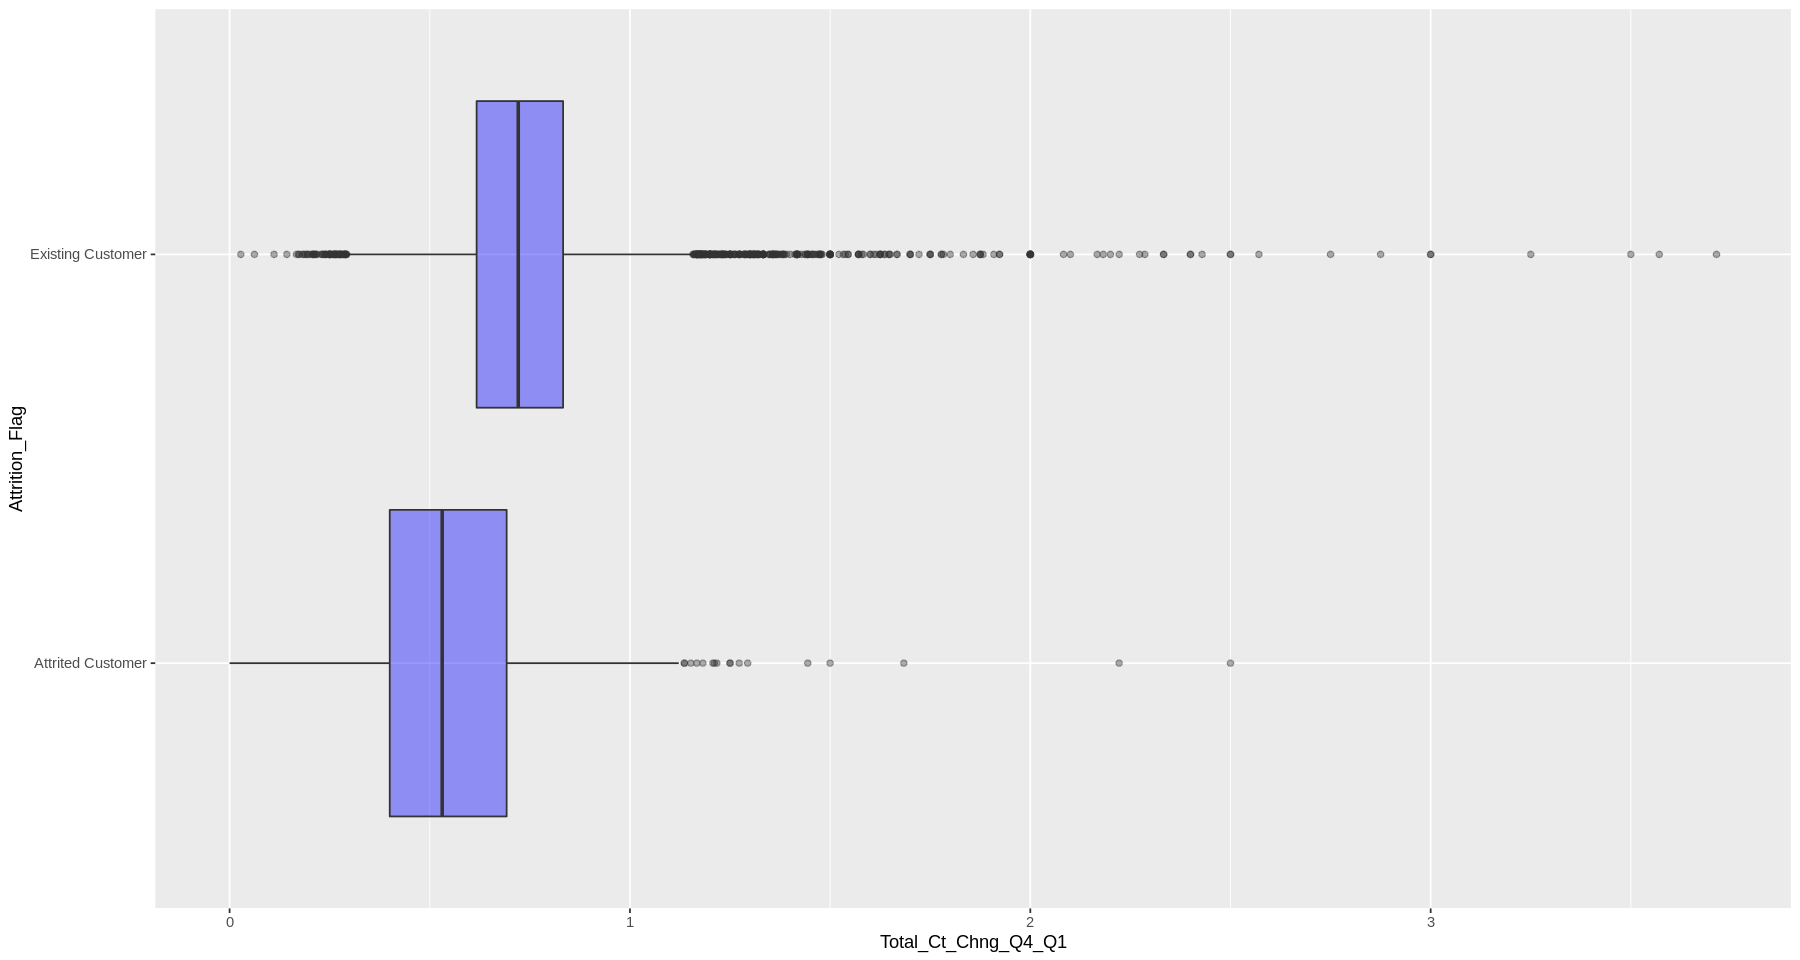

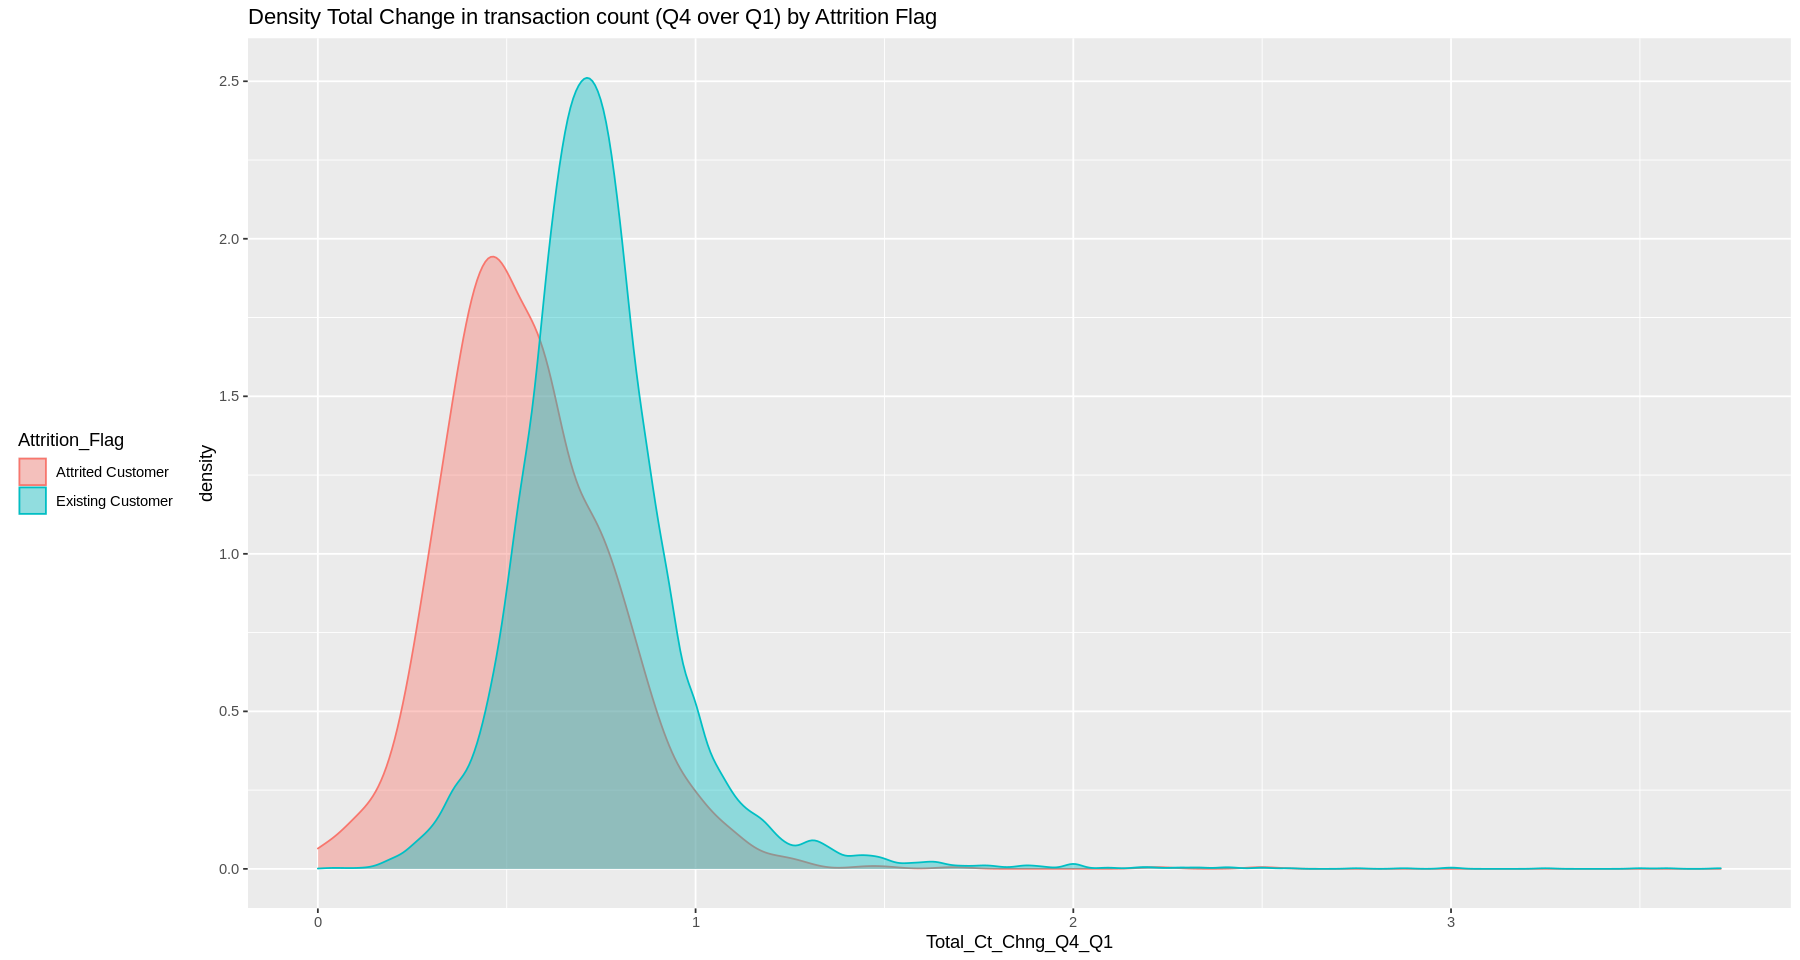

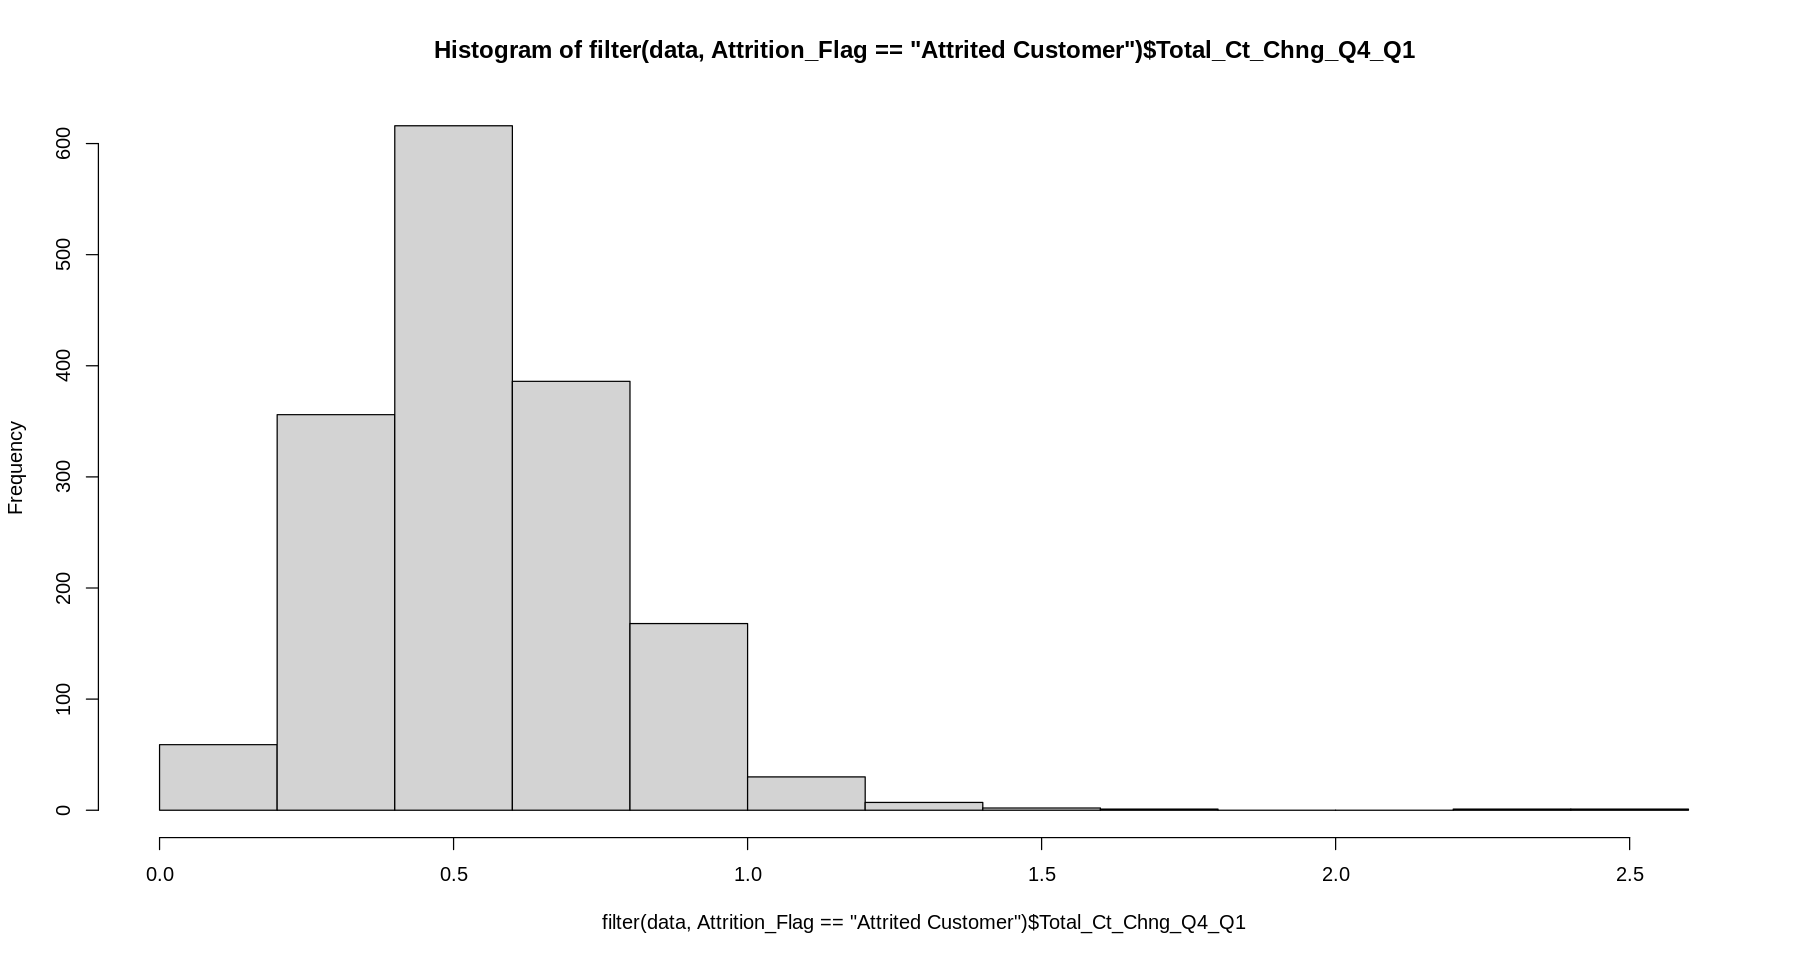

In [ ]:
cat("Summary data dari Total_Ct_Chng_Q4_Q1 berdasarkan Existing Customer")
summary(filter(data, Attrition_Flag == "Existing Customer")$Total_Ct_Chng_Q4_Q1)
cat("\n")
cat("Summary data dari Total_Ct_Chng_Q4_Q1 berdasarkan Attrited Customer")
summary(filter(data, Attrition_Flag == "Attrited Customer")$Total_Ct_Chng_Q4_Q1)
ggplot(data, aes(x=Total_Ct_Chng_Q4_Q1, y=Attrition_Flag)) + 
    geom_boxplot(fill="blue", alpha=0.4)

ggplot(data, aes(x = Total_Ct_Chng_Q4_Q1, color = `Attrition_Flag`, fill = Attrition_Flag)) +
  geom_density(alpha = 0.4) +
  labs(title = "Density Total Change in transaction count (Q4 over Q1) by Attrition Flag") +
  theme(legend.position="left")

hist(filter(data, Attrition_Flag == "Attrited Customer")$Total_Ct_Chng_Q4_Q1)

Jika dilihat dari chartnya terlihat bahwa persebaran data yang churned dan yang tidak dapat dibilang boxplotnya cenderung menjulur ke arah kanan(positive/right skewness). Yang tidak churned(existing customer) lebih banyak memiliki outlier atau pencilan ke arah kanan atau nilai yang lebih besar dari yang churned(attrited customer), artinya existing customer lebih banyak yang melakukan perubahan jumlah transaksi dari Q4 ke Q1. \
50% member yang melakukan churned (attrited customer) melakukan perubahan jumlah transaksi dari Q4 to Q1 lebih yaitu sama dengan kurang dari 0.5310. \
Sedangkan pada existing customer 75% membernya melakukan perubahan jumlah transaksi lebih banyak yaitu sama dengan kurang dari 0.6170.\
Dapat diambil kesimpulan bahwa yang attrited customer(churned customer) aktivitas transaksinya berkurang dari akhir tahun(Q4) ke awal tahun(Q1).

Summary data dari Total_Revolving_Bal berdasarkan Existing Customer

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     800    1364    1257    1807    2517 


Summary data dari Total_Revolving_Bal berdasarkan Attrited Customer

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0   672.8  1303.5  2517.0 

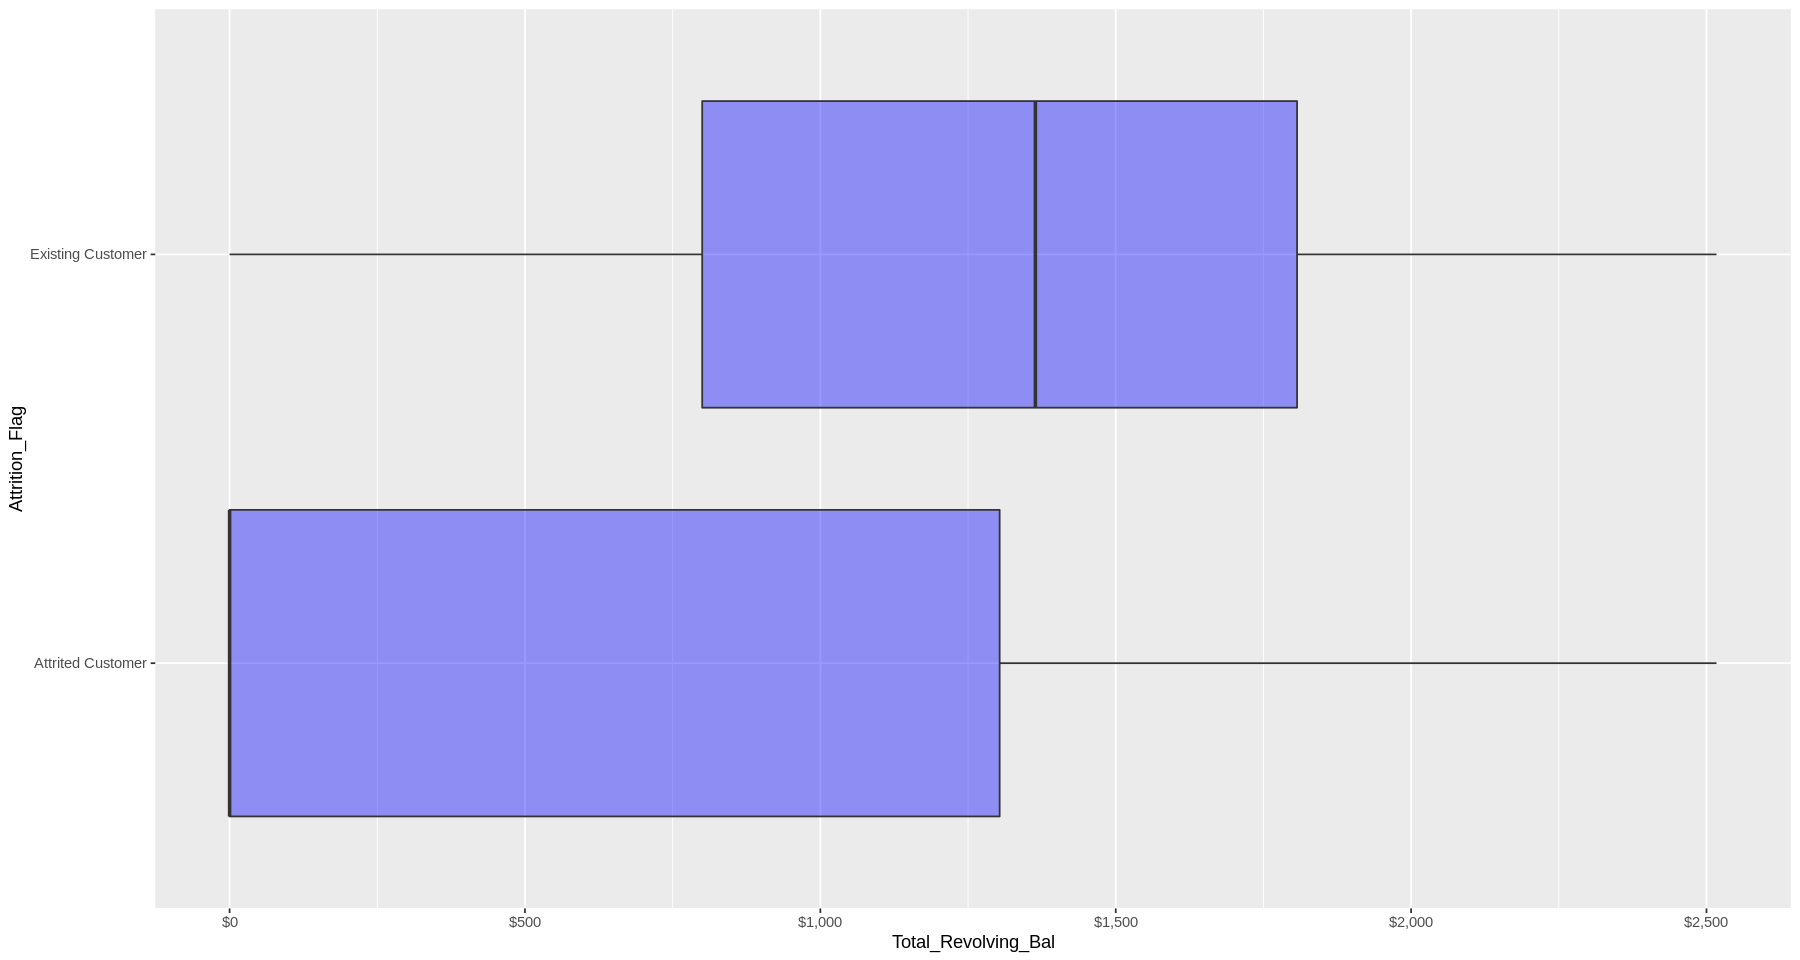

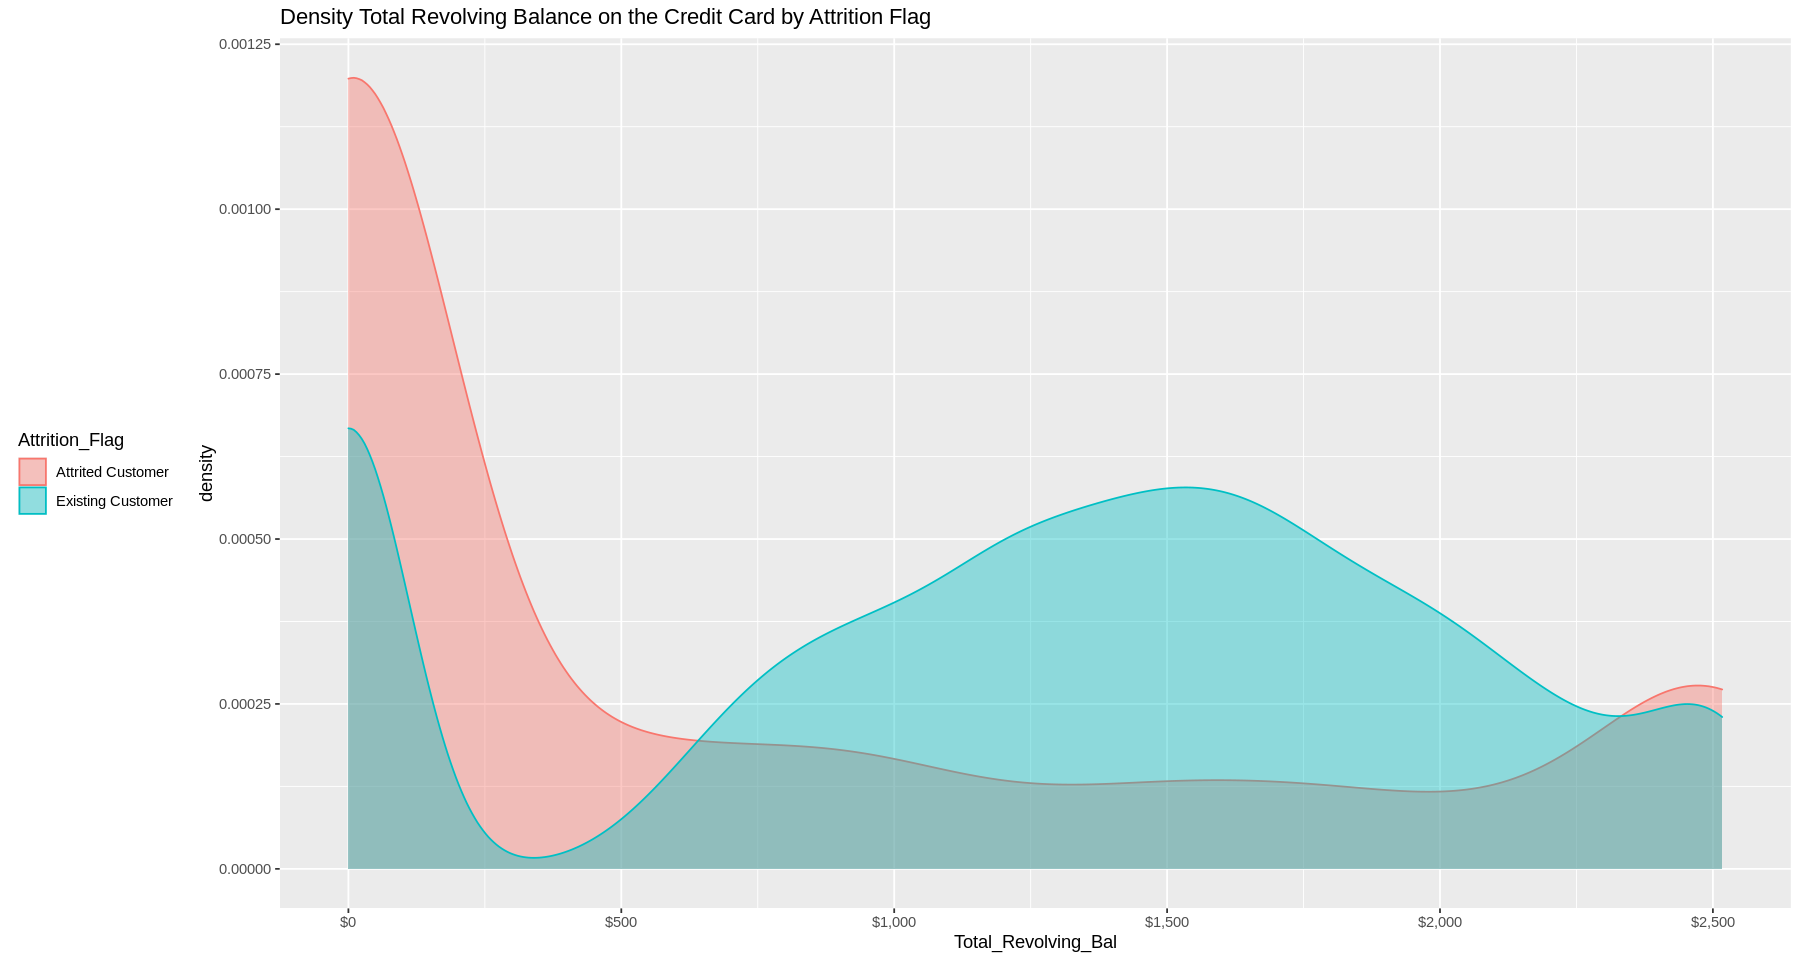

In [ ]:
cat("Summary data dari Total_Revolving_Bal berdasarkan Existing Customer")
summary(filter(data, Attrition_Flag == "Existing Customer")$Total_Revolving_Bal)
cat("\n")
cat("Summary data dari Total_Revolving_Bal berdasarkan Attrited Customer")
summary(filter(data, Attrition_Flag == "Attrited Customer")$Total_Revolving_Bal)
ggplot(data, aes(x=Total_Revolving_Bal, y=Attrition_Flag)) + 
  geom_boxplot(fill="blue", alpha=0.4) +
  scale_x_continuous(labels = scales::dollar)

ggplot(data, aes(x = Total_Revolving_Bal, color = `Attrition_Flag`, fill = Attrition_Flag)) +
  geom_density(alpha = 0.4) +
  labs(title = "Density Total Revolving Balance on the Credit Card by Attrition Flag") +
  theme(legend.position="left")+
  scale_x_continuous(labels = scales::dollar)

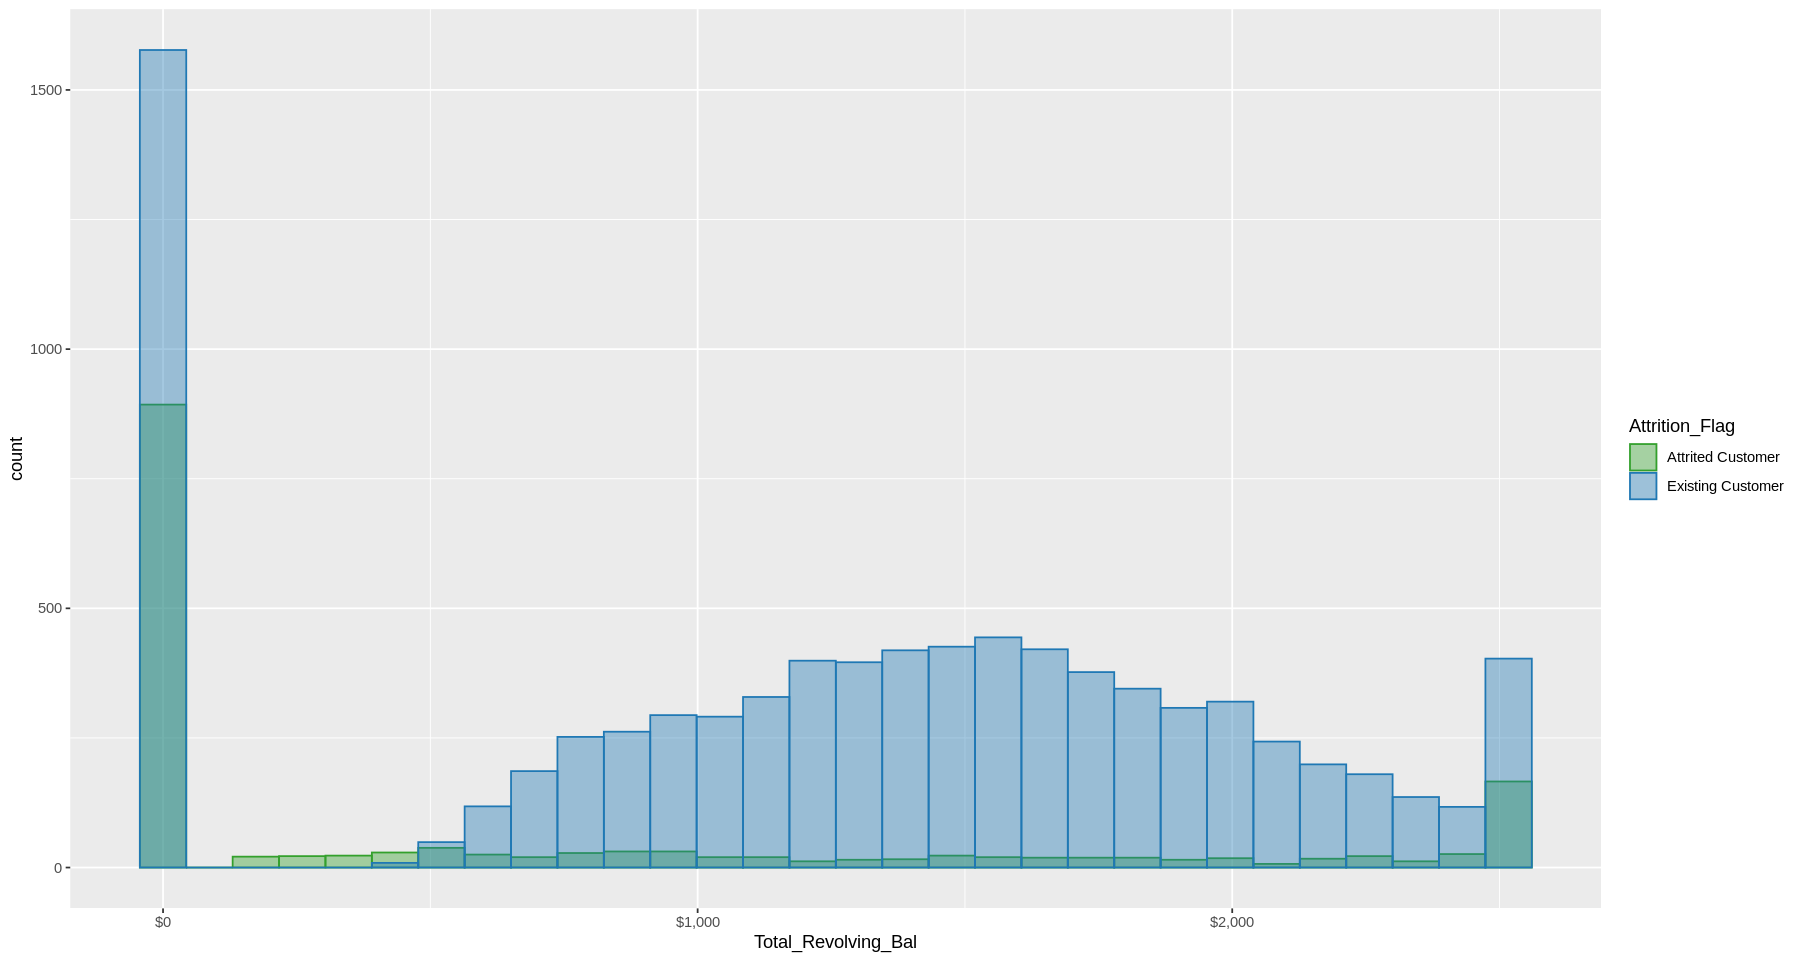

In [ ]:
ggplot(data, aes(x = Total_Revolving_Bal)) +
  geom_histogram(aes(color = Attrition_Flag, fill = Attrition_Flag), 
                position = "identity", bins = 30, alpha = 0.4) +
  scale_color_manual(values = c(theColors[4], theColors[2])) +
  scale_fill_manual(values = c(theColors[4], theColors[2])) +
  scale_x_continuous(labels = scales::dollar)

Revolving Balance adalah bagian dari pengeluaran kartu kredit yang tidak terbayar di akhir siklus penagihan atau dengan kata lain ditangguhkan ke bulan selanjutnya. Dari boxplot dan density chart dapat dilihat bahwa memang 50% attrited customer tidak memiliki Revolving Balance atau Total_Revolving_Bal-nya 0. Sedangkan pada Existing customer 75% pengguna/membernya pernah memiliki Revolving Balance sebesar $800.\
Bisa disimpulkan bahwa Existing Customer lebih sering/banyak memiliki Revolving Balance, sehingga dapat diasumsikan kemungkinan Existing Customer menggunakan kartu kreditnya untuk berlangganan service tertentu, atau sedang mencicil suatu barang yang lumayan tinggi harganya.

Summary data dari Avg_Utilization_Ratio berdasarkan Existing Customer

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0550  0.2110  0.2964  0.5292  0.9940 


Summary data dari Avg_Utilization_Ratio berdasarkan Attrited Customer

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1625  0.2310  0.9990 

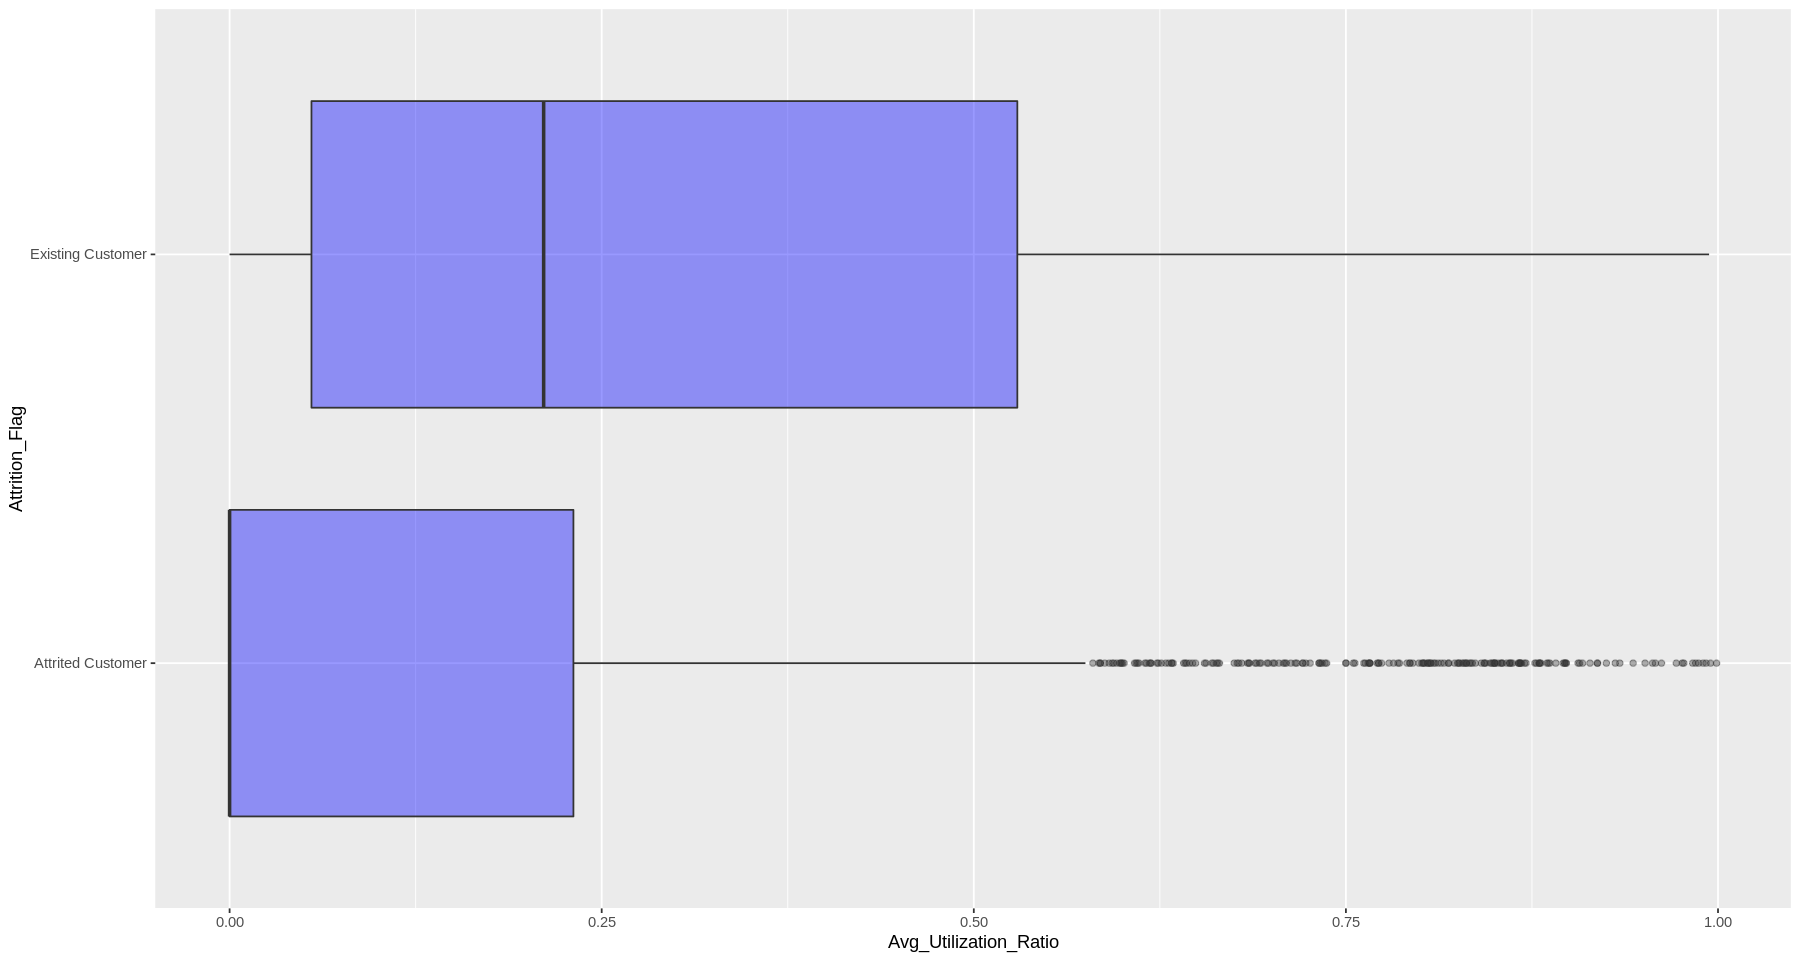

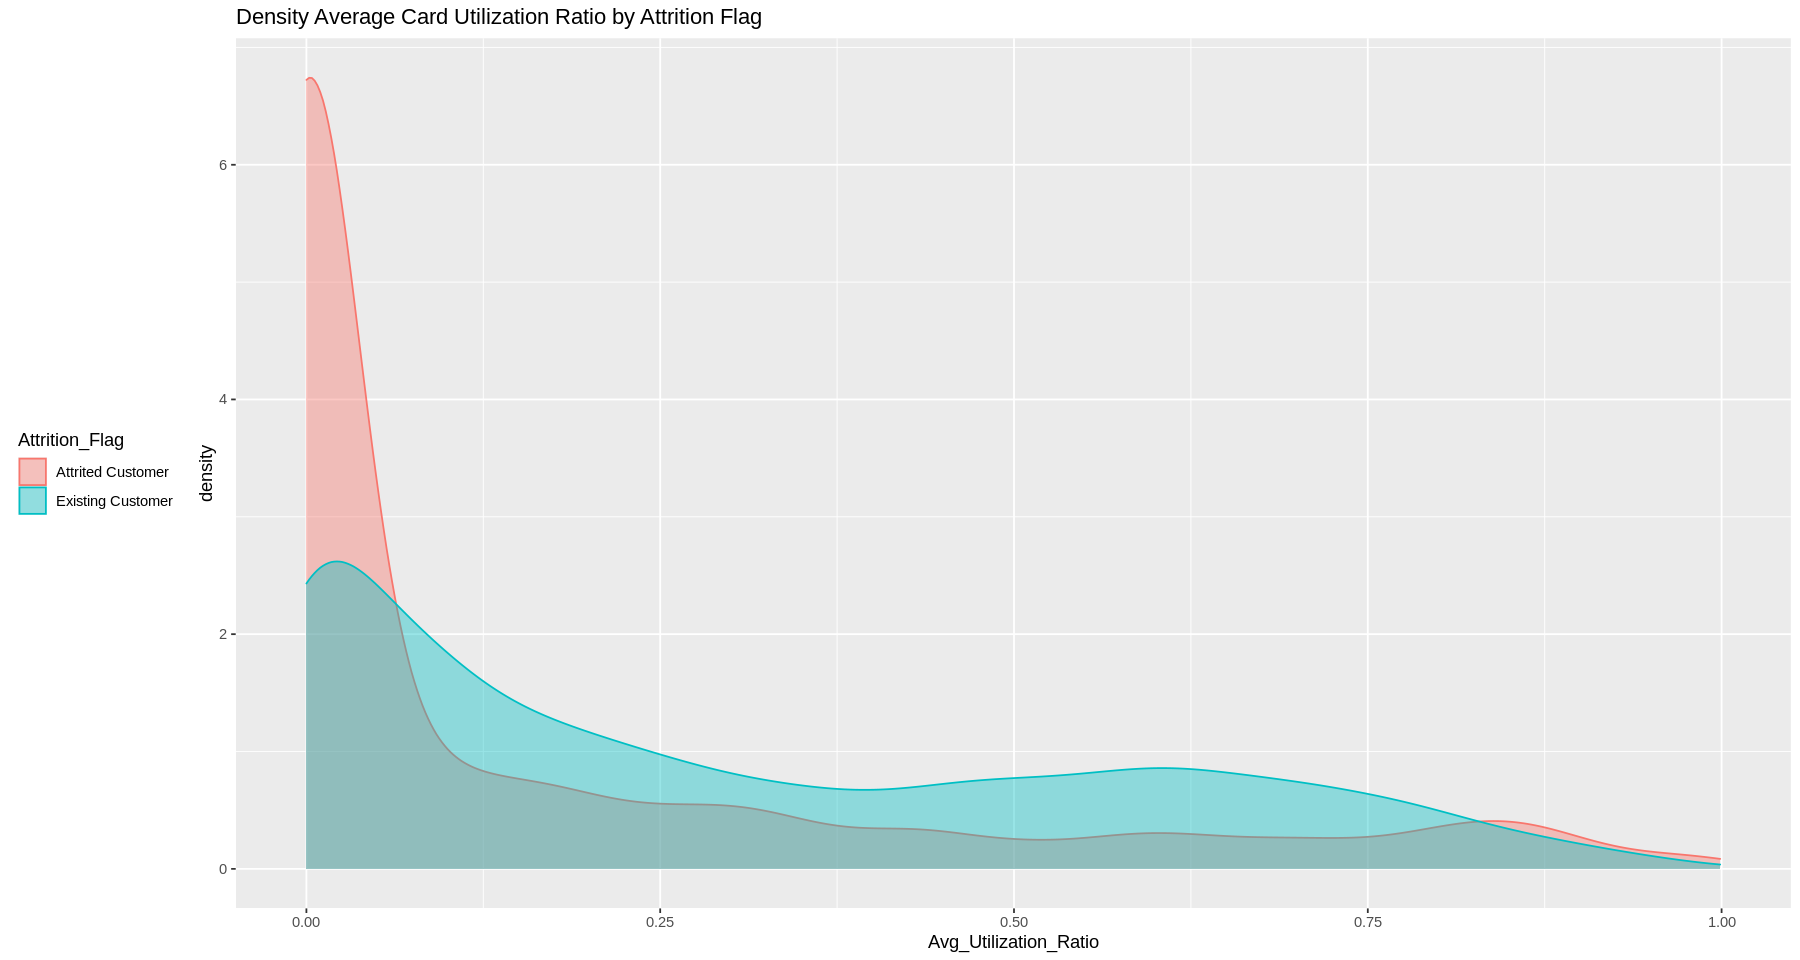

In [ ]:
cat("Summary data dari Avg_Utilization_Ratio berdasarkan Existing Customer")
summary(filter(data, Attrition_Flag == "Existing Customer")$Avg_Utilization_Ratio)
cat("\n")
cat("Summary data dari Avg_Utilization_Ratio berdasarkan Attrited Customer")
summary(filter(data, Attrition_Flag == "Attrited Customer")$Avg_Utilization_Ratio)
ggplot(data, aes(x=Avg_Utilization_Ratio, y=Attrition_Flag)) + 
    geom_boxplot(fill="blue", alpha=0.4)

ggplot(data, aes(x = Avg_Utilization_Ratio, color = `Attrition_Flag`, fill = Attrition_Flag)) +
  geom_density(alpha = 0.4) +
  labs(title = "Density Average Card Utilization Ratio by Attrition Flag") +
  theme(legend.position="left")

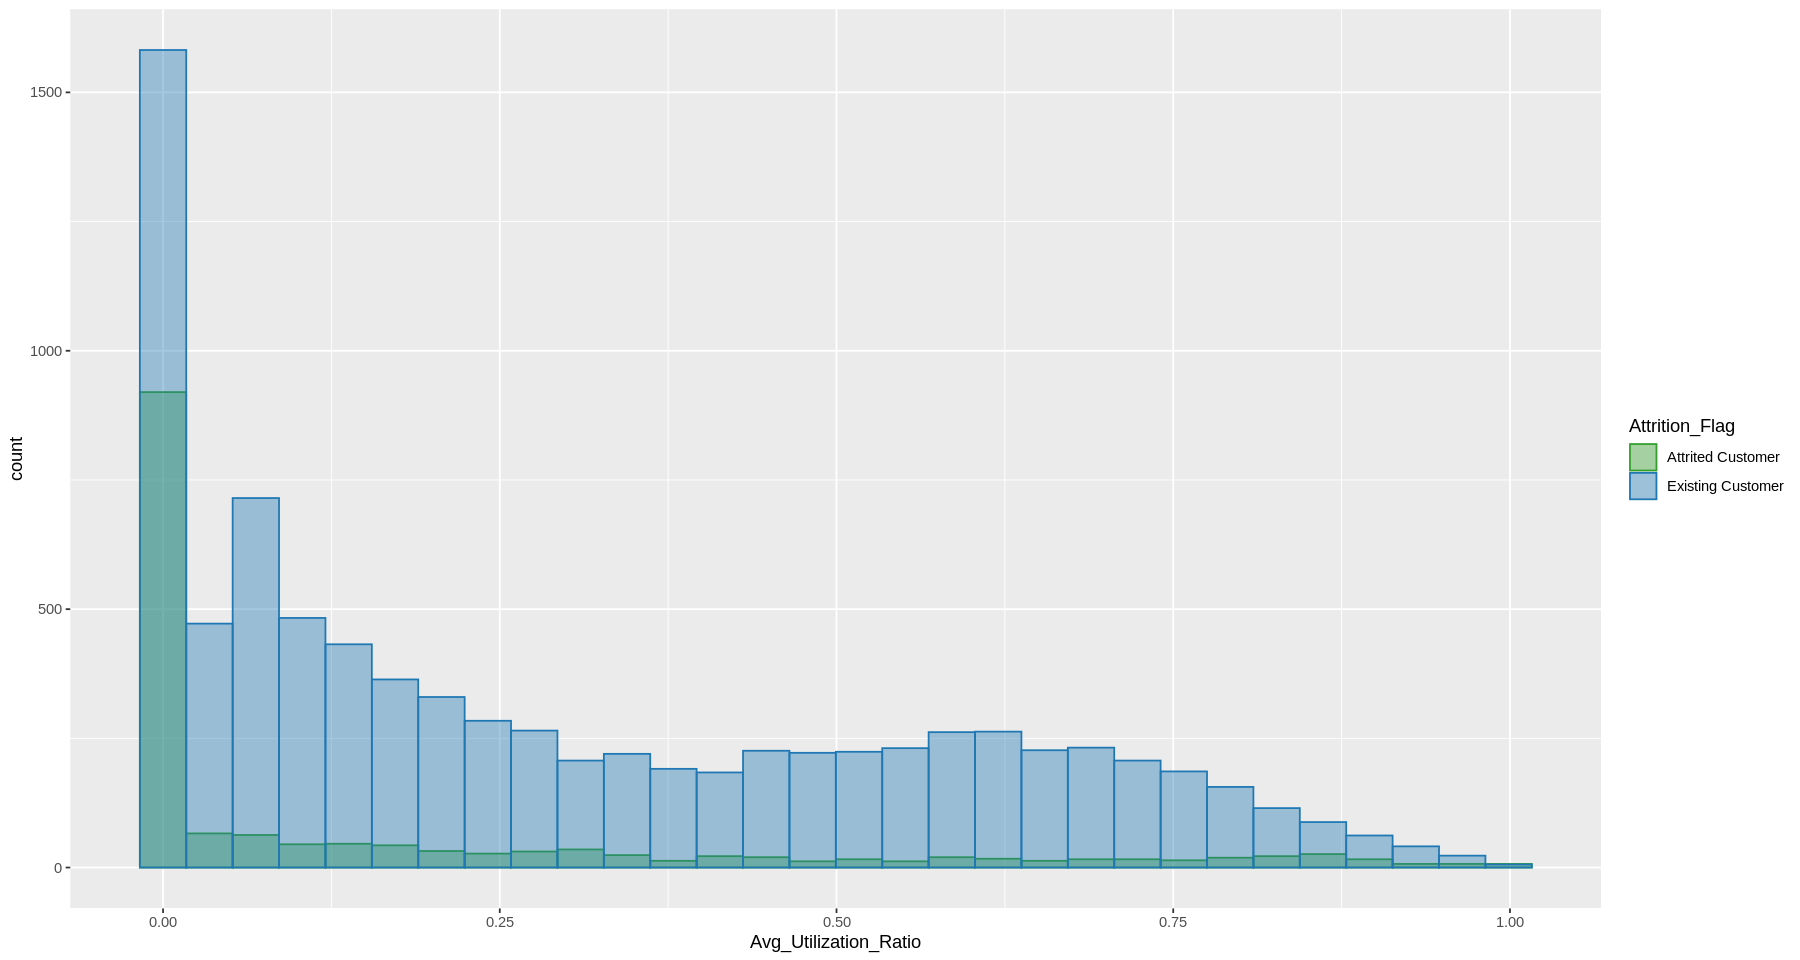

In [25]:
ggplot(data, aes(x = Avg_Utilization_Ratio)) +
  geom_histogram(aes(color = Attrition_Flag, fill = Attrition_Flag), 
                position = "identity", bins = 30, alpha = 0.4) +
  scale_color_manual(values = c(theColors[4], theColors[2])) +
  scale_fill_manual(values = c(theColors[4], theColors[2]))

Card Utilization Ratio adalah rasio saldo kartu kredit yang dimiliki dengan batas kartu kredit(Credit Limit). Ini mengukur jumlah kredit yang tersedia yang digunakan.\
Dari box dan density chart terlihat bahwa 50% pengguna yang attrited memiliki Avg_Utilization_Ration yang bernilai 0% atau bisa dikatakan tidak memiliki saldo dalam balance kartu kreditnya.\
Sedangkan pada Existing Customer 50% membernya setidaknya memiliki 21% saldo pada akunnya terhadap Credit Limitnya.\
Dapat disimpulkan memang Attrited Customer tidak memiliki saldo sama sekali karena tidak ingin menggunakannya kembali(disengaja), atau saldonya telah dipindahkan ke kartu kredit lain.

## 2.5 Kesimpulan
Dari eksplorasi dan analisis diatas maka dapat diambil kesimpulan sebagai berikut:
1. Ciri-ciri pelanggan yang churn pada column quantitative adalah yang minimal memiliki salah satu dari Female, Graduate, Married, Blue, atau Income Less than $40K.
2. 75% member yang **attrited atau churned** melakukan jumlah transaksi yang sedikit dalam setahun, yaitu kurang dari 52 kali
3. Attrited customer(churned customer) aktivitas transaksinya berkurang pada awal tahun(Q1) dibandingkan pada akhir tahun(Q4).
4. Attrited customer sedikit yang menggunakan feature Revolving Balance atau dapat dikatakan pelanggan yang churned tidak memaksimalkan feature yang disediakan atau tidak memiliki tujuan untuk mencicil suatu barang.
5. Setengah pelanggan yang Attrited Customer tidak memiliki saldo sama sekali karena tidak ingin menggunakannya kembali(disengaja), atau saldonya telah dipindahkan ke kartu kredit lain.